**Prepared by: Tim Hayes**

**Cohort: PGP-DSBA-UTA-AUG''22-A2**'

# INN Hotels Project

**Marks: 60**

## Business Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import math
import os
from datetime import datetime, date

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [2]:
df = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# returns the first 5 rows
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [4]:
# returns the last 5 rows
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

#### Observations
* Booking_ID: unique identifier of each booking
* no_of_adults, : Numeric column for number of adults
* no_of_children: Numeric column for number of Children
* no_of_weekend_nights: Numeric column for number of weekend nights.
* no_of_week_nights: Numeric column for number of week nights.
* type_of_meal_plan: Categorical column for meal plan.
* required_car_parking_space: Boolean column for car parking space required.
* room_type_reserved: Categorical column for type of room reserved.
* lead_time: Numeric column for number of days
* arrival_year: Numeric column for year of arrival date
* arrival_month: Numeric column for month of arrival date
* arrival_date: Numeric column for date of the month
* market_segment_type: Categorical column for market segment designation.
* repeated_guest: Boolean column for repeat guest
* no_of_previous_cancellations: Numeric column for number of previous bookings that were canceled.
* no_of_previous_bookings_not_canceled: Numeric column for number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation
* no_of_special_requests: Numeric column for total number of special requests made by the customer.
* booking_status: Boolean flag indicating if the booking was canceled or not.

In [5]:
# Use shape() to get the dimensions of the dataframe
df_shape = df.shape
print("DataFrame has {} rows and {} columns".format(df_shape[0], df_shape[1]))

DataFrame has 36275 rows and 19 columns


#### Observations
- Dataframe has 36275 rows and 19 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observations
- There are 13 int64 columns, 5 object columns and 1 float column in the dataframe.

In [7]:
# Check for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Observations
- There are no nulls in the dataframe.

In [8]:
# See if we have an duplicated data
print('Rows of duplicated data in the dataset {}'.format(df.duplicated().sum()))

Rows of duplicated data in the dataset 0


#### Observations
- There is no duplicated data in the dataframe.

In [9]:
# Use describe() to get a statistical summary
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

#### Observations
- Min value for no_of_adults is 0.000 and max is 4.000
- Mean for no_of_adults is 1.845 which is less than the median indicating the data is left skewed.


- Min value for no_of_children is 0.000 and max is 10.000
- Mean for no_of_children is 0.105 which is greater than the median indicating the data is right skewed.


- Min value for no_of_weekend_nights is 0.000 and max is 7.000
- Mean for no_of_weekend_nights is 0.811 which is less than the median indicating the data is left skewed.


- Min value for no_of_week_nights is 0.000 and max is 17.000
- Mean for no_of_week_nights is 2.204 which is greater than the median indicating the data is right skewed.


- Min value for required_car_parking_space is 0.000 and max is 1.000
- Mean for required_car_parking_space is 0.031 which is greater than the median indicating the data is right skewed.


- Min value for lead_time is 0.000 and max is 443.000
- Mean for lead_time is 85.233 which is greater than the median indicating the data is right skewed.


- Min value for arrival_year is 2017.000 and max is 2018.000
- Mean for arrival_year is 2017.820 which is less than the median indicating the data is left skewed.


- Min value for arrival_month is 1.000 and max is 12.000
- Mean for arrival_month is 7.424 which is less than the median indicating the data is left skewed.


- Min value for arrival_date is 1.000 and max is 31.000
- Mean for arrival_date is 15.597 which is less than the median indicating the data is left skewed.


- Min value for repeated_guest is 0.000 and max is 1.000
- Mean for repeated_guest is 0.026 which is greater than the median indicating the data is right skewed.


- Min value for no_of_previous_cancellations is 0.000 and max is 13.000
- Mean for no_of_previous_cancellations is 0.023 which is greater than the median indicating the data is right skewed.


- Min value for no_of_previous_bookings_not_canceled is 0.000 and max is 58.000
- Mean for no_of_previous_bookings_not_canceled is 0.153 which is greater than the median indicating the data is right skewed.


- Min value for avg_price_per_room is 0.000 and max is 540.000
- Mean for avg_price_per_room is 103.424 which is greater than the median indicating the data is right skewed.


- Min value for no_of_special_requests is 0.000 and max is 5.000
- Mean for no_of_special_requests is 0.620 which is greater than the median indicating the data is right skewed.

In [10]:
# Use describe() to get a statistical summary
df.describe(include=object).T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

#### Observations
- booking_status which is the target variable is imbalanced with 24390 having a value of 24390 Not_Cancelled (67.2%) and 11885 having a value of Cancelled (32.7%).

## Utility Graphical Functions

In [11]:
def output_pretty_boxplot(df, x, y=None, hue=None, figsize=None, title=None, order=None, rotate_x=False):
    '''Output a customized nice looking standardized boxplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default to nNone
        :figsize: The figurare size tuple to use in the plot default is None
        :title: the title desired in the plot default is Boxplot: {x} vs {y}'
        :order: boxplot order default is none'
        :rotate_x: rotate x axis text default is false'
    ''' 
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(10,3);      
        
    plt.figure(figsize=figsize);

    if (rotate_x):
        plt.xticks(rotation=45);
        
    if (title is None):
        title = 'Boxplot: {}'.format(x);
        
        if (y is not None):
            title += ' vs {}'.format(y);
            
        if (hue is not None):
            title += ' with a hue of {}'.format(hue);

    # Output boxplot with variables
    sns.boxplot(data=df,x=x, y=y, showmeans=True, hue=hue, order=order);

    plt.title(title);  
    plt.show();
    
def output_pretty_countplot(df, x, order=None, hue=None, figsize=None, title=None):
    '''Output a customized nice looking standardized countplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
        :figsize: The figure size tuple to use in the plot default is None
        :title: The title to use default is Countplot: for {}
    ''' 
    
    if (title is None):
        title = 'Countplot: for {}'.format(x)
    
        if (hue is not None):
            title += ' with hue of {}'.format(hue)
        
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,3.5);
        
    plt.figure(figsize=figsize);
        
    plt.xticks(rotation=45);
    plt.rcParams["figure.figsize"] = [7.0, 3.5]
    plt.rcParams["figure.autolayout"] = True
       
    # Ouput count plot
    ax = sns.countplot(data=df,x=x,order=order,hue=hue);           
        
    # output the amounts on top of the bars
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + (p.get_height()*0.01)
        value = '{:.1f}'.format(p.get_height())
        
        if (pd.isna(x) or pd.isna(y) or pd.isna(value)):
            continue
  
        ax.text(x, y, value, ha="center")

    plt.title(title);
    plt.show();
    
def output_pretty_histplot(df, x, title=None):
    '''Output a customized nice looking standardized histplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :title:
    '''
       
    plt.figure(figsize=(10,3));
    sns.histplot(data=df,x=x,kde=True);
    
    if (title is None):
        title = 'Histplot: for {}'.format(x);
        
    plt.title(title);
    plt.show();
    
def output_pretty_barplot(title, df, x, y, order=None, hue=None, annotate=True):
    '''Output a customized nice looking standardized barplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
    ''' 
    
    g = sns.catplot(data=df,x=x,y=y,kind='bar',order=order, hue=hue);
     
    g.fig.set_size_inches(18, 8)
    g.fig.subplots_adjust(top=0.81, right=0.86)

    # extract the matplotlib axes_subplot objects from the FacetGrid
    ax = g.facet_axis(0, 0)

    if (annotate):
        # iterate through the axes containers and add amount to bar
        for c in ax.containers:
            labels = [f'{(v.get_height()):.2f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')
    
    plt.title(title);
    plt.xticks(rotation=45);

def output_pretty_crosstab_plot(title, x, y, figsize=None):
    '''Output a customized nice looking standardized crosstab barplot
        :title: the title desired in the plot
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
        :figsize: Figure size to use default is 12,5
    ''' 
    
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(12,5);

    crosstab_percentages = pd.crosstab(x, y, normalize='index')
           
    crosstab_percentages.plot(kind='bar',stacked=True, figsize=figsize)
        
    plt.legend()
           
    plt.title(title);
    plt.xticks(rotation=45);
    plt.show()
    return crosstab_percentages

def output_pretty_numeric_plots(df, feature, title_suffix=''):
    '''Output a customized boxplot and histplot
    
    :df: DataFrame to use
    :feature: the feature to plot
    :title_suffix: title suffix to append, default is ''
    ''' 
    print(df[feature].describe())
    output_pretty_boxplot(df, feature);
    output_pretty_histplot(df, feature, title='Histplot: for {}{}'.format(feature, title_suffix));
    
def output_pretty_residuals(df_pred):
    '''Output a pretty residual 
    
    :df_pred: df with fitted values and residuals
    ''' 
    # let us plot the fitted values vs residuals
    sns.set_style("whitegrid")
    sns.residplot(
        data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
    )
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Fitted vs Residual plot")
    plt.show()

def output_residuals(model, y_train):
    '''Calculate df with actual, fitted and residual values output a pretty residual plot
    
    :model: model where to extract fitted values and residuals
    :y_train: training values for target variable
    ''' 
    df_pred = pd.DataFrame()

    df_pred["Actual Values"] = y_train.values.flatten()  # actual values
    df_pred["Fitted Values"] = model.fittedvalues.values  # predicted values
    df_pred["Residuals"] = model.resid.values  # residuals

    output_pretty_residuals(df_pred)
    return df_pred

def output_pretty_scatterplot(df, x, y, hue=None, figsize=None):
    '''Output a customized nice looking standardized 
    
        :df: DataFrame to use
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
        :hue: Hue to employ default i None
        :figsize: Figure size to use default is 15,5
    '''
    
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,5)
                 
    plt.figure(figsize=(15, 5));
    ax = sns.scatterplot(data=df, x=x, y=y, hue=hue);

    title = 'Scatterplot: {} vs {}'.format(x,y)
    if (hue is not None):
            title += ' with hue of {}'.format(hue)
    
    plt.title(title);
        
    plt.show();
    
def output_pretty_barchart_by_mdy(df,x):
    '''Output bar plots with data from 2017 and 2018
        
        :df: DataFrame to use
        :x: The x data to use in the plot
    '''
    df_with_date = df.copy()
    df_with_date['day'] = 1
    cols=["arrival_year","arrival_month","day"]
    df_with_date['mdy_str'] = df_with_date[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

    df_with_date['date'] = pd.to_datetime(df_with_date['mdy_str']).dt.date
    df_with_date = pd.DataFrame(df_with_date.groupby(['date'])[[x]].value_counts()\
                .reset_index(name='count')\
                .sort_values(by='date'))
    output_pretty_barplot('Barplot: {} activity by date for 2017'.format(x),\
                          df_with_date[df_with_date['date'] < pd.to_datetime('1/1/2018')], \
                          x, 'count', hue='date', annotate=False)
    output_pretty_barplot('Barplot: {} activity by date for 2018'.format(x), \
                          df_with_date[df_with_date['date'] >= pd.to_datetime('1/1/2018')], \
                          x, 'count', hue='date', annotate=False)

## Utility Regression Functions

In [12]:
def checking_vif(predictors):
    '''Calculate VIF
    :predictors: independent variables
    ''' 
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # df result
    result = pd.DataFrame()

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # fitting the model
        model = sm.Logit(target, train).fit(disp=False)

        model_perf = model_performance_classification_statsmodels(model, train, target)
        model_perf.insert(0, 'col', cols)
        result = result.append(model_perf)

    result.reset_index(drop=True, inplace=True)
    return result


def fit_and_refine_model(x_train, y_train, alpha = .05):
    '''Fit a model based on training data and drop features where the max_p_value exceeds .05
    :x_train: independent variables training data
    :y_train: dependent variables training data
    ''' 
    # initial list of columns
    selected_features = x_train.columns.tolist()

    # setting an initial max p-value
    max_p_value = 1

    while len(selected_features) > 0:
        # defining the train set
        x_train_aux = x_train[selected_features]

        # fitting the model
        model = sm.Logit(y_train, x_train_aux).fit(disp=False)

        # getting the p-values and the maximum p-value
        p_values = model.pvalues
        max_p_value = max(p_values)

        # name of the variable with maximum p-value
        feature_with_p_max = p_values.idxmax()
        
        if max_p_value > alpha:
            selected_features.remove(feature_with_p_max)
        else:
            break

    print('After removing independent variables with high p values we are left with the following variables:\n {}'\
              .format(selected_features))
    return selected_features

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def output_pretty_roc(y_train, predictions, hide_annotation = False):
    """
    Plot a ROC curve

    y_train: dependent variable
    predictions: prediction from the model
    hide_annotation: hide the optimal threshold value for TPR/FPR default is False
    """
    optimal_threshold_auc_roc = 0.0
    logit_roc_auc_train = roc_auc_score(y_train, predictions)
    fpr, tpr, thresholds = roc_curve(y_train, predictions)
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
    
    # Do we show the optimal threshold?
    if (hide_annotation == False):
        optimal_idx = np.argmax(tpr - fpr)
        x = fpr[optimal_idx]
        y = tpr[optimal_idx]
        plt.plot(x, y, "-v")
        optimal_threshold_auc_roc = thresholds[optimal_idx]
        plt.text(x*.6, y*1.08, 'Optimal {:.3f}'.format(optimal_threshold_auc_roc))
    
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()
    return optimal_threshold_auc_roc

def outut_pretty_odds(params, train_columns):
    """
    Output odd ratio and odd ratio percentage

    params: coefficients from the model
    train_columns: training columns
    """
    # converting coefficients to odds
    odds = np.exp(params)

    # finding the percentage change
    perc_change_odds = (odds - 1) * 100

    # removing limit from number of columns to display
    pd.set_option("display.max_columns", None)

    # adding the odds to a dataframe
    return pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=train_columns).T


def plot_prec_recall_vs_thresholds(lg, x, y):
    """
    Plot a Receision/Recall curves with respect to threshold

    lg: fitted logit model
    x: training data
    y: dependent variable
    """
    y_scores = lg.predict(x)
    precision, recall, thresholds = precision_recall_curve(y, y_scores,)
    
    plt.plot(thresholds, precision[:-1], "b--", label="precision")
    plt.plot(thresholds, recall[:-1], "g--", label="recall")
    
    # Take the first point of intersection if multiple were found
    idx = np.argwhere(np.diff(np.sign(precision[:-1] - recall[:-1]))).flatten()[0]
    optimal_threshold_prec_recall = thresholds[idx]
    y = recall[:-1][idx]
    plt.plot(optimal_threshold_prec_recall, y, 'ro');
    plt.text(optimal_threshold_prec_recall*.6, y*1.08, 'Optimal {:.4f}'\
             .format(optimal_threshold_prec_recall));
  
    plt.xlabel("Threshold");
    plt.legend(loc="upper left");
    plt.ylim([0, 1]);
    plt.figure(figsize=(10, 7));
    plt.show();
    return optimal_threshold_prec_recall;

## Utility Decision Tree Functions

In [13]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

def plot_feature_importance(model, feature_names):
    """
    Function to plot feature importance

    model: classifier
    feature_names: names of the features
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)

    fig, ax = plt.subplots(figsize=(10, 10))

    bars = ax.barh(range(len(indices)), importances[indices], color="violet", align="center")
    ax.bar_label(bars)
    ax.set_xlabel("Relative Importance")
    ax.set_title("Feature Importances")
    ax.set_yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.show()
    
    
def plot_tree(model, feature_names):
    """
    Function to plot a decision tree

    model: classifier
    feature_names: names of the features
    """
    plt.figure(figsize=(20, 10))

    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show();
    
def output_impurity_vs_alpha(ccp_alphas, impurities):
    """
    Function to plot impurity vs alpha values

    ccp_alphas: alpha values
    impurities: impurities
    
    """
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
    ax.set_xlabel("effective alpha")
    ax.set_ylabel("total impurity of leaves")
    ax.set_title("Total Impurity vs effective alpha for training set")
    plt.show()


def output_f1_scores(x_train, x_test, y_train, y_test, clfs):
    """
    Function to plot f1 scores

    x_train: independent variable training values
    x_test: independent variable test values
    y_train: dependent variable training values
    y_test: dependent variable test values
    clfs: classifiers
    
    """
    f1_train = []
    f1_test = []
    
    for clf in clfs:
        pred_train = clf.predict(x_train)
        values_train = f1_score(y_train, pred_train)
        f1_train.append(values_train)

    for clf in clfs:
        pred_test = clf.predict(x_test)
        values_test = f1_score(y_test, pred_test)
        f1_test.append(values_test)
    
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_xlabel("alpha")
    ax.set_ylabel("F1 Score")
    ax.set_title("F1 Score vs alpha for training and testing sets")
    ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
    ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
    ax.legend()
    plt.show()
    return f1_test


def output_tree_info_vs_alpha(clfs, ccp_alphas):
    """
    Function to plot tree info vs alphas

    clfs: classifiers
    ccp_alphas: alpha values
    """
    clfs = clfs[:-1]
    ccp_alphas = ccp_alphas[:-1]

    node_counts = [clf.tree_.node_count for clf in clfs]
    depth = [clf.tree_.max_depth for clf in clfs]
    fig, ax = plt.subplots(2, 1, figsize=(10, 7))
    ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
    ax[0].set_xlabel("alpha")
    ax[0].set_ylabel("number of nodes")
    ax[0].set_title("Number of nodes vs alpha")
    ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
    ax[1].set_xlabel("alpha")
    ax[1].set_ylabel("depth of tree")
    ax[1].set_title("Depth vs alpha")
    fig.tight_layout()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Outlier Detection 

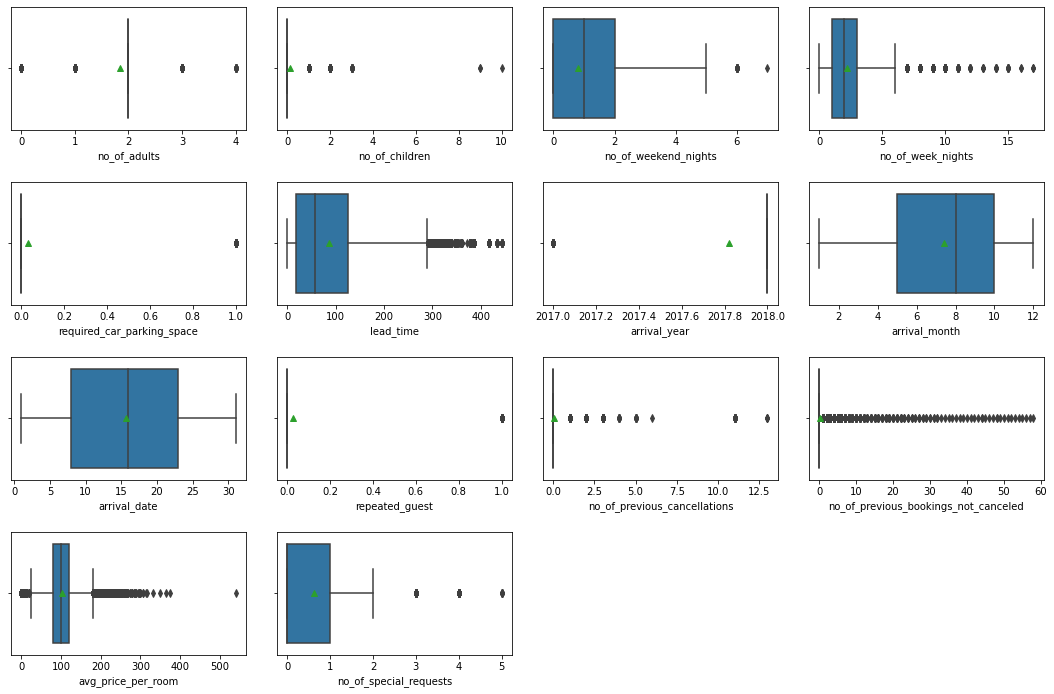

In [14]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))

nrows = math.ceil(len(num_cols)/4)
for i, variable in enumerate(num_cols):
    plt.subplot(nrows, 4, i + 1)
    sns.boxplot(data=df, x=variable, showmeans=True)
    plt.tight_layout(pad=2)

plt.show()

#### Observations
- There are outliers in all the numerical columns which all see reasonable for the exception of avg_price_per_room which has one extreme outlier that will need to be treated.

In [15]:
# Calculating the 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
upper_whisker = Q3 + 1.5 * IQR

# assigning the outliers the value of upper whisker
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = upper_whisker

In [16]:
# Remove Booking_Id since its just a unique identifier
df.drop('Booking_ID', inplace=True, axis=1)

In [17]:
# Lets encode booking_status as a boolean
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

**Leading Questions**:

### 1. What are the busiest months in the hotel?

In [18]:
df.groupby('arrival_year')['arrival_month'].value_counts()

arrival_year  arrival_month
2017          10               1913
              9                1649
              8                1014
              12                928
              11                647
              7                 363
2018          10               3404
              6                3203
              9                2962
              8                2799
              4                2736
              5                2598
              7                2557
              3                2358
              11               2333
              12               2093
              2                1704
              1                1014
Name: arrival_month, dtype: int64

In [19]:
df[df['booking_status'] == 0].groupby('arrival_year')['arrival_month'].value_counts()

arrival_year  arrival_month
2017          10               1611
              9                1467
              12                906
              8                 829
              11                620
              7                 120
2018          6                1912
              10               1826
              4                1741
              12               1713
              3                1658
              5                1650
              9                1606
              8                1496
              7                1486
              11               1485
              2                1274
              1                 990
Name: arrival_month, dtype: int64

#### Observations
- The top three busiest month at the hotel are October, September and August for 2017.
- The top three busiest month at the hotel are October, June and September for 2018.
- If we take into account bookings that were not canceled October, September and December were the top three busiest month in 2017.
- If we take into account bookings that were not canceled June, October and April were the top three busiest month in 2018.

### 2. Which market segment do most of the guests come from?

In [20]:
df.groupby('market_segment_type')[['market_segment_type']].value_counts()

market_segment_type
Aviation           125
Complementary      391
Corporate         2017
Offline          10528
Online           23214
dtype: int64

In [21]:
df[df['booking_status'] == 0].groupby(['market_segment_type'])[['market_segment_type']].value_counts()

market_segment_type
Aviation            88
Complementary      391
Corporate         1797
Offline           7375
Online           14739
dtype: int64

In [22]:
df[df['booking_status'] == 0].groupby(['market_segment_type', 'arrival_year'])[['market_segment_type']].value_counts()

market_segment_type  arrival_year
Aviation             2018               88
Complementary        2017              139
                     2018              252
Corporate            2017              455
                     2018             1342
Offline              2017             2511
                     2018             4864
Online               2017             2448
                     2018            12291
dtype: int64

#### Observations
- Online is the top segment for booking with 63.99% of the bookings.
- If we take into account bookings that were not canceled Online is still the top segment for booking with 60.4% of the bookings.
- If we take into account bookings that were not canceled and arrival_year for 2017 Offline (45.2%) was the most popular booking segment for 2018 Online (65.2%) was the most popular booking segment.

### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [23]:
df.groupby(['market_segment_type'])[['avg_price_per_room']].describe()

avg_price_per_room                                     \
                                 count        mean        std   min   25%   
market_segment_type                                                         
Aviation                         125.0  100.704000   8.538361  79.0  95.0   
Complementary                    391.0    3.141765  15.512972   0.0   0.0   
Corporate                       2017.0   82.911740  23.690001  31.0  65.0   
Offline                        10528.0   91.598441  24.625516  12.0  75.0   
Online                         23214.0  112.256855  35.220319   0.0  89.0   

                                           
                       50%     75%    max  
market_segment_type                        
Aviation              95.0  110.00  110.0  
Complementary          0.0    0.00  170.0  
Corporate             79.0   95.00  220.0  
Offline               90.0  109.00  365.0  
Online               107.1  131.75  375.5

In [24]:
df[df['booking_status'] == 0].groupby(['market_segment_type', 'arrival_year'])[['avg_price_per_room']].describe()

avg_price_per_room                         \
                                              count        mean        std   
market_segment_type arrival_year                                             
Aviation            2018                       88.0  100.056818   8.526305   
Complementary       2017                      139.0    2.452734  16.304591   
                    2018                      252.0    3.521825  15.078299   
Corporate           2017                      455.0   76.480747  19.561072   
                    2018                     1342.0   83.028502  23.955818   
Offline             2017                     2511.0   86.852632  24.058559   
                    2018                     4864.0   88.115008  22.302476   
Online              2017                     2448.0   99.369477  35.040807   
                    2018                    12291.0  113.183294  35.968310   

                                                                       
                                   min   25%      50%     75%     max  
market_segment_type arrival_year                                       
Aviation            2018          79.0  95.0   95.000  110.00  110.00  
Complementary       2017           0.0   0.0    0.000    0.00  170.00  
                    2018           0.0   0.0    0.000    0.00  139.00  
Corporate           2017          40.0  65.0   65.000   89.00  190.00  
                    2018          31.0  66.0   79.000   95.00  220.00  
Offline             2017          12.0  70.0   85.000  101.50  211.33  
                    2018          12.0  75.0   85.000  100.00  274.20  
Online              2017           0.0  81.0   96.225  116.75  226.17  
                    2018           0.0  88.4  108.000  135.00  375.50

#### Observations
- The top three mean average prices for segments are Online, Aviation and Offline while Complimentary had the lowest mean average price.
- If we take into account arrival year of 2017 and bookings that were not canceled we see the top three segments were Online, Offline and Corporate.
- If we take into account arrival year of 2018 and bookings that were not canceled we see the top three segments were Online, Aviation and Offline.

### 4. What percentage of bookings are canceled? 

In [25]:
df['booking_status'].value_counts(normalize=True)

0    0.672364
1    0.327636
Name: booking_status, dtype: float64

In [26]:
df.groupby('arrival_year')['booking_status'].value_counts(normalize=True)

arrival_year  booking_status
2017          0                 0.852472
              1                 0.147528
2018          0                 0.632942
              1                 0.367058
Name: booking_status, dtype: float64

#### Observations
- Overall 32.7% of the bookings were canceled. 
- If we break it down by year in 2017 14.7% of the bookings were canceled and in 2018 36.7% of the bookings were canceled.
- From 2017 to 2018 cancellations grew by 149.65%.

### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [27]:
df[df['repeated_guest'] == 1]['booking_status'].value_counts(normalize=True)

0    0.982796
1    0.017204
Name: booking_status, dtype: float64

In [28]:
df[df['repeated_guest'] == 1].groupby('arrival_year')['booking_status'].value_counts(normalize=True)

arrival_year  booking_status
2017          0                 1.00000
2018          0                 0.97787
              1                 0.02213
Name: booking_status, dtype: float64

#### Observations
- Overall 1.7% of the guests who were repeat guests canceled their booking.
- If we take into account arrival year of 2017 0% of the repeated guests canceled.
- If we take into account arrival year of 2018 2.2% of the repeated guests canceled.

### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [29]:
df[df['no_of_special_requests'] > 0]['booking_status'].value_counts(normalize=True)

0    0.797551
1    0.202449
Name: booking_status, dtype: float64

In [30]:
df[df['no_of_special_requests'] > 0].groupby('arrival_year')['booking_status'].value_counts(normalize=True)

arrival_year  booking_status
2017          0                 0.903280
              1                 0.096720
2018          0                 0.779745
              1                 0.220255
Name: booking_status, dtype: float64

#### Observations
- Overall guest with at least one special request canceled their booking 20.2% of the time.
- If we take into account arrival year of 2017 9.6% of guests canceled that had at least one special request.
- If we take into account arrival year of 2018 22.0% of guests canceled that had at least one special request.
- From 2017 to 2018 cancellations grew by 129.16% for guests with at least one special request which could indicate the hotel was not following up with the guests to ensure the special requests where taken care of prior to their stay.

### Univariate Analysis

#### Let's investigate type_of_meal_plan

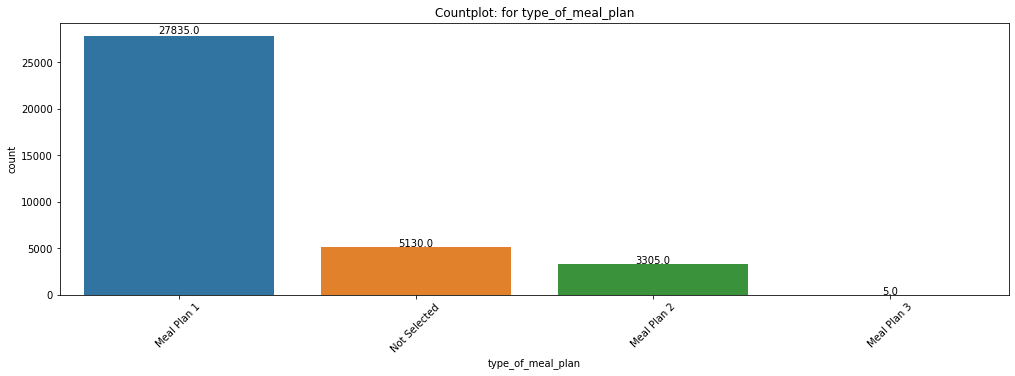

Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: type_of_meal_plan, dtype: float64

In [31]:
# Countplot for type_of_meal_plan
output_pretty_countplot(df, 'type_of_meal_plan', \
                        order=df['type_of_meal_plan'].value_counts().index,\
                        figsize=(17,5))
df['type_of_meal_plan'].value_counts(normalize=True)

#### Observations
- The top meal plan is Meal Plan 1 which was selected 76.7% of the time.
- The least popular is Meal Plan 3 which was selected .01% of the time.

#### Let's investigate room_type_reserved

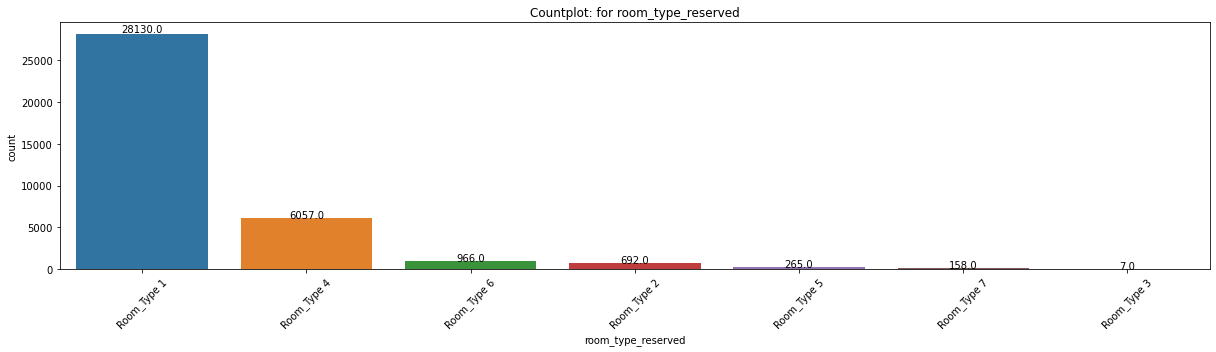

Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: room_type_reserved, dtype: float64

In [32]:
# Countplot for room_type_reserved
output_pretty_countplot(df, 'room_type_reserved', \
                        order=df['room_type_reserved'].value_counts().index,\
                        figsize=(17,5))
df['room_type_reserved'].value_counts(normalize=True)

#### Observations
- The top room_type_reserved is Room_type_1 whihch was selected 77.5% of the time.
- The least popular room_type_reserved is Room_Type_3 which was selected .01% of the time.

#### Let's investigate market_segment_type

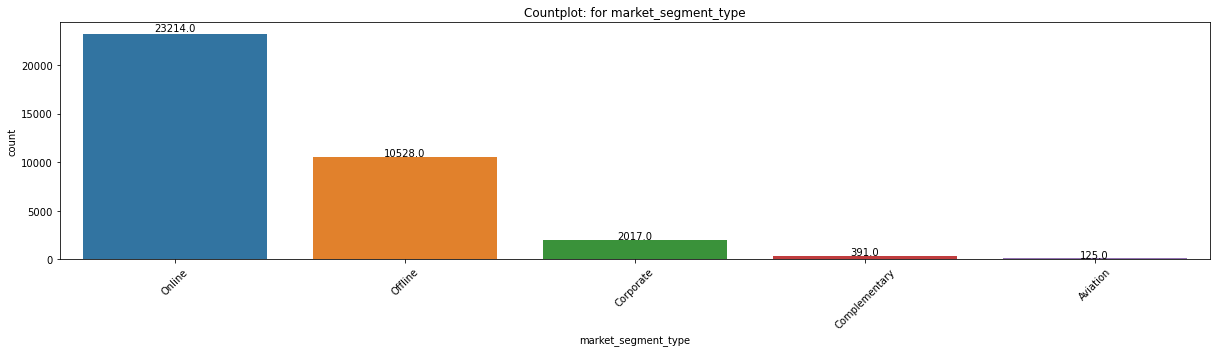

Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: market_segment_type, dtype: float64

In [33]:
# Countplot for market_segment_type
output_pretty_countplot(df, 'market_segment_type', \
                        order=df['market_segment_type'].value_counts().index,\
                        figsize=(17,5))
df['market_segment_type'].value_counts(normalize=True)

In [34]:
df.groupby('arrival_year')['market_segment_type'].value_counts()

arrival_year  market_segment_type
2017          Online                  2951
              Offline                 2926
              Corporate                498
              Complementary            139
2018          Online                 20263
              Offline                 7602
              Corporate               1519
              Complementary            252
              Aviation                 125
Name: market_segment_type, dtype: int64

#### Observations
- The most popular market_segment_type for the hotel is Online making up 63.9% of the guests.
- The least popular market_segment_type is Avaition making up .34% of the guests.

#### Let's investigate booking_status

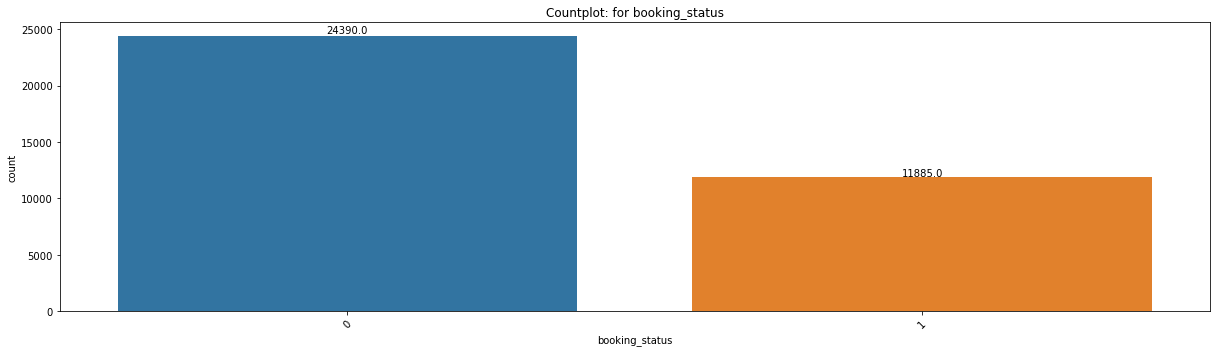

0    0.672364
1    0.327636
Name: booking_status, dtype: float64

In [35]:
# Countplot for booking_status
output_pretty_countplot(df, 'booking_status', \
                        order=df['booking_status'].value_counts().index,\
                        figsize=(17,5))
df['booking_status'].value_counts(normalize=True)

#### Observations
- 67.2% of the guests did not cancel their booking while 32.7% did cancel.

#### Let's investigate no_of_adults

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64


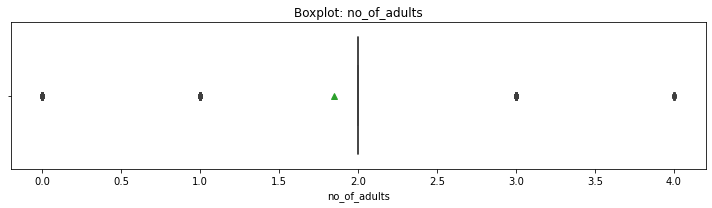

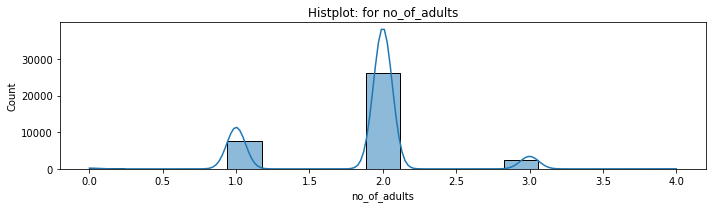

In [36]:
# Boxplot and Histplot for no_of_adults
output_pretty_numeric_plots(df, 'no_of_adults')

#### Observations
- The min no_of_adults is 0 while the max is 4.
- The mean no_adults is 1.84 which is leass then the median indicating the data is left skewed.
- no_of_adults has outliers.

#### Let's investigate no_of_children

count    36275.000000
mean         0.105279
std          0.402648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64


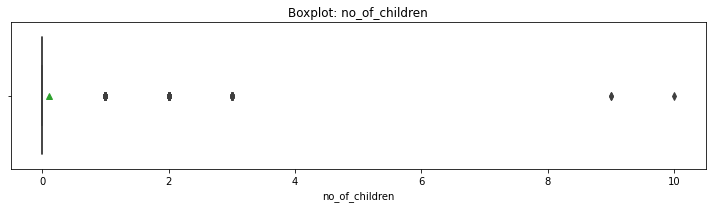

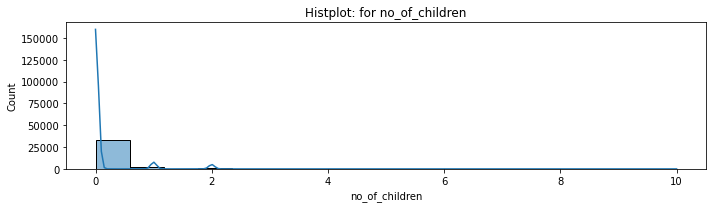

In [37]:
# Boxplot and Histplot for no_of_children
output_pretty_numeric_plots(df, 'no_of_children')

#### Observations
- The min no_of_children is 0 while the max is 10.
- The mean no_of_children is .105 which is greater than the mean indicating the data is right skewed.
- no_of_children has outliers.

#### Let's investigate no_of_weekend_nights

count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64


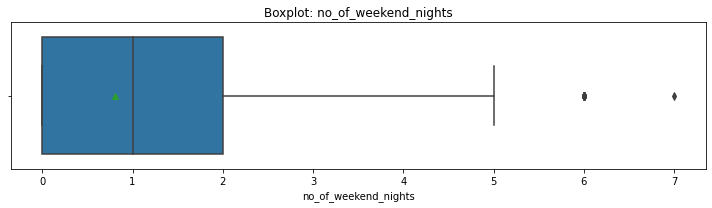

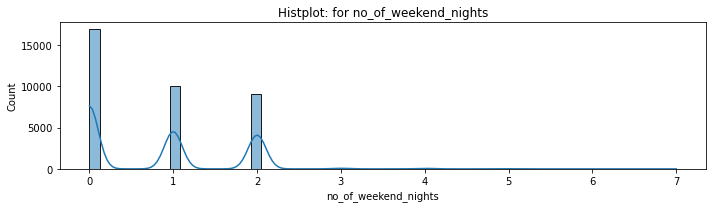

In [38]:
# Boxplot and Histplot for no_of_weekend_nights
output_pretty_numeric_plots(df, 'no_of_weekend_nights')

#### Observations
- The min no_of_weekend_nights is 0 and the max is 7.
- The mean no_of_weekend_nights is .810 which is less than the median indicating a left skew in the data.
- no_of_weekend_nights has outliers.

#### Let's investigate no_of_week_nights

count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64


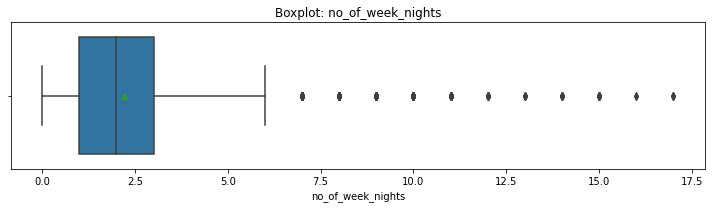

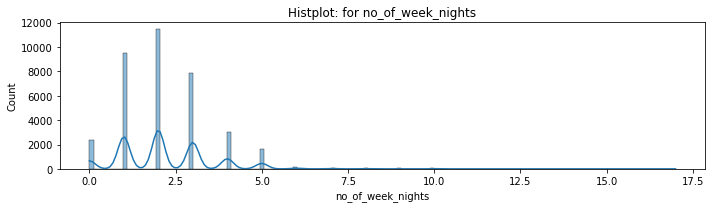

In [39]:
# Boxplot and Histplot for no_of_week_nights
output_pretty_numeric_plots(df, 'no_of_week_nights')

#### Observations
- The min no_of_weekend_nights is 0 and the max is 17.
- The mean no_of_weekend_nights is 2.2 which is greater than the median indicating a right skew in the data.
- no_of_week_nights has outliers.

#### Let's investigate required_car_parking_space

count    36275.000000
mean         0.030986
std          0.173281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: required_car_parking_space, dtype: float64


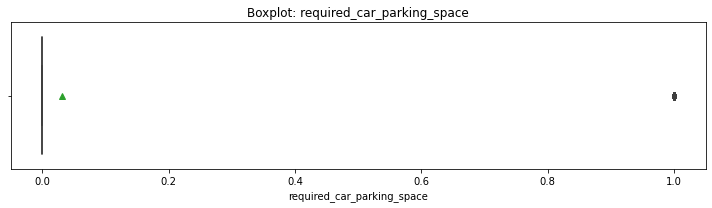

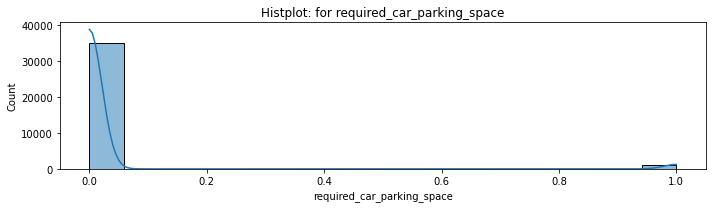

In [40]:
# Boxplot and Histplot for required_car_parking_space
output_pretty_numeric_plots(df, 'required_car_parking_space')

#### Observations
- The min required_car_parking_space is 0 and the max is 1.
- The mean required_car_parking_space is .03 which is greater than the median indicating a right skew in the data.
- required_car_parking_space has outliers.

#### Let's investigate lead_time

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64


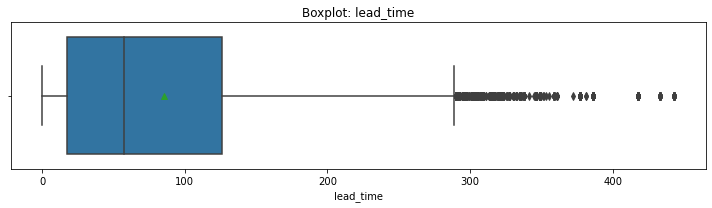

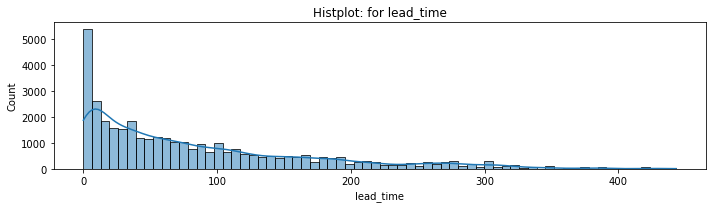

In [41]:
# Boxplot and Histplot for lead_time
output_pretty_numeric_plots(df, 'lead_time')

#### Observations
- The min lead_time is 0 and the max is 443.
- The mean lead_time is 85.93 which is greater than the median indicating a right skew in the data.
- lead_time has outliers.

#### Let's investigate arrival_year

count    36275.000000
mean      2017.820427
std          0.383836
min       2017.000000
25%       2018.000000
50%       2018.000000
75%       2018.000000
max       2018.000000
Name: arrival_year, dtype: float64


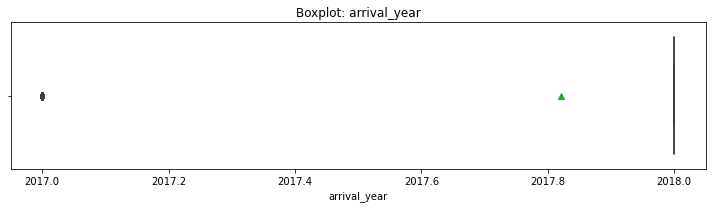

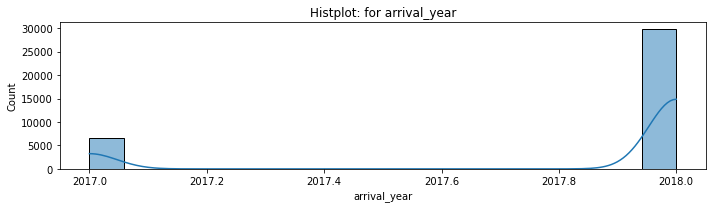

In [42]:
# Boxplot and Histplot for arrival_year
output_pretty_numeric_plots(df, 'arrival_year')

In [43]:
df.groupby('arrival_year')['arrival_month'].value_counts()

arrival_year  arrival_month
2017          10               1913
              9                1649
              8                1014
              12                928
              11                647
              7                 363
2018          10               3404
              6                3203
              9                2962
              8                2799
              4                2736
              5                2598
              7                2557
              3                2358
              11               2333
              12               2093
              2                1704
              1                1014
Name: arrival_month, dtype: int64

In [44]:
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

#### Observations
- The min arrival_year is 2017 and the max is 2018.
- The mean arrival_year is 2017.82 which is less than the median indicating a left skew in the data.
- We have only six months of data from 2017 and twelve months for 2018.

- The number of bookings increased 356.87% YOY from 2017 to 2018. Granted 2017 only represents six months so even if we double the 2017 bookings we still see YOY growth of 128.43%.

- arrival_year has outlers.

#### Let's investigate arrival_month

count    36275.000000
mean         7.423653
std          3.069894
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: arrival_month, dtype: float64


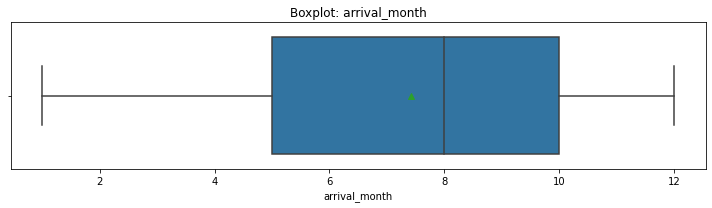

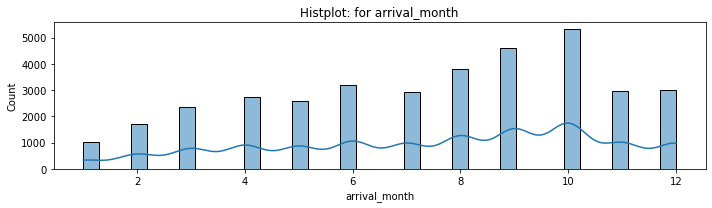

In [45]:
# Boxplot and Histplot for arrival_month
output_pretty_numeric_plots(df, 'arrival_month')

#### Observations
- The min arrival_month is 1 and the max is 12.
- The mean arrival_month is 7.42 which is less than the median indicating a left skew in the data.
- October and September appear to be the busiest months at the hotel.

#### Let's investigate arrival_date

count    36275.000000
mean        15.596995
std          8.740447
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date, dtype: float64


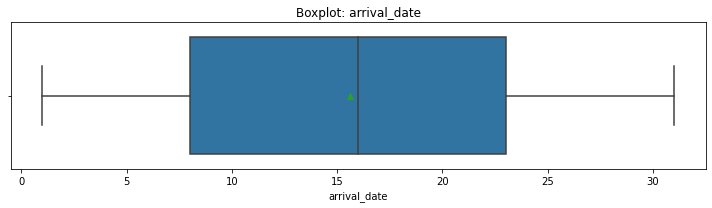

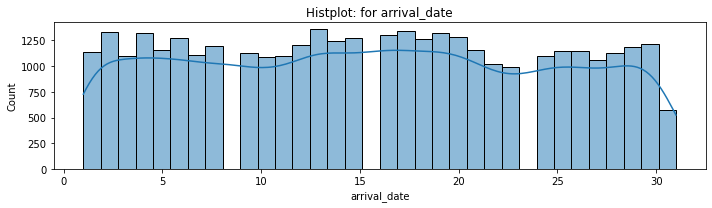

In [46]:
# Boxplot and Histplot for arrival_date
output_pretty_numeric_plots(df, 'arrival_date')

#### Observations
- The min arrival_data is 1 and the max is 31.
- The mean arrival_date is 15.59 which is less than the median indicating a left skew in the data.

#### Let's investigate repeated_guest

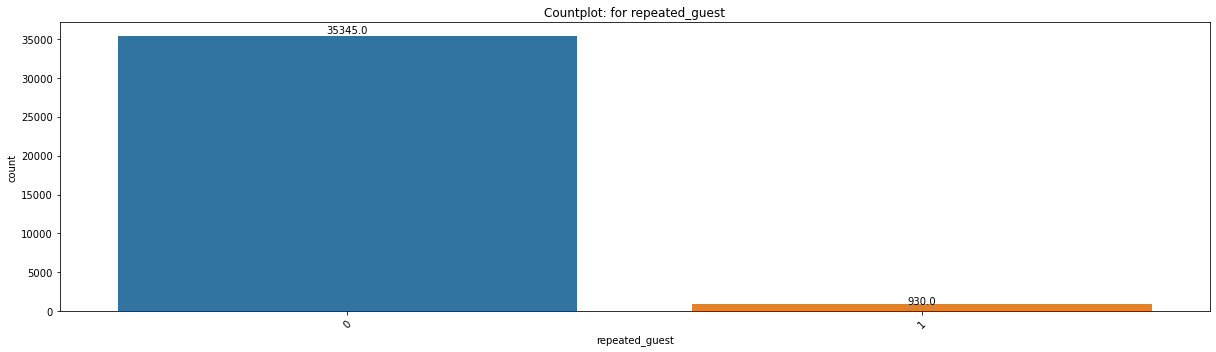

In [47]:
# Countplot for total_nights
output_pretty_countplot(df, 'repeated_guest', \
                        order=df['repeated_guest'].value_counts().index,\
                        figsize=(17,5))

In [48]:
df.groupby('arrival_year')['repeated_guest'].value_counts(normalize=True)

arrival_year  repeated_guest
2017          0                 0.968222
              1                 0.031778
2018          0                 0.975706
              1                 0.024294
Name: repeated_guest, dtype: float64

#### Observations
- The number of repeat guests are 930 which represents 2.56% of bookings.
- From 2017 to 2018 repeated_guests declined 22.5%

#### Let's investigate no_of_previous_cancellations

count    36275.000000
mean         0.023349
std          0.368331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: no_of_previous_cancellations, dtype: float64


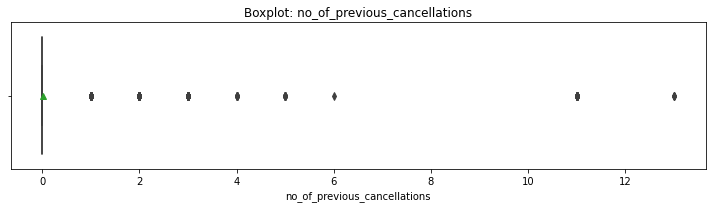

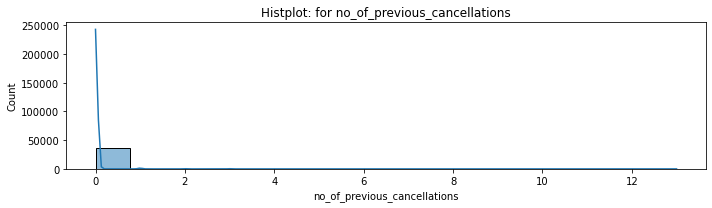

In [49]:
# Boxplot and Histplot for no_of_previous_cancellations
output_pretty_numeric_plots(df, 'no_of_previous_cancellations')

#### Observations
- The no_of_previous_cancellations is 0 and the max is 13.
- The no_of_previous_cancellations is 0.2 which is greater than the median indicating a right skew in the data.
- no_of_previous_cancellations has outliers

#### Let's investigate no_of_previous_bookings_not_canceled

count    36275.000000
mean         0.153411
std          1.754171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: no_of_previous_bookings_not_canceled, dtype: float64


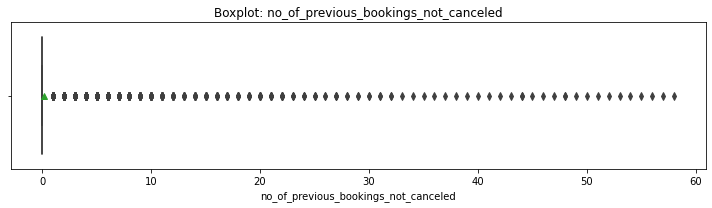

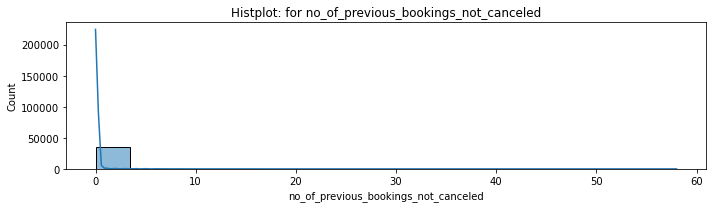

In [50]:
# Boxplot and Histplot for no_of_previous_bookings_not_canceled
output_pretty_numeric_plots(df, 'no_of_previous_bookings_not_canceled')

#### Observations
- The no_of_previous_bookings_not_canceled is 0 and the max is 58.
- The no_of_previous_bookings_not_canceled is 0.153 which is greater than the median indicating a right skew in the data.
- no_of_previous_bookings_not canceled has outliers

#### Let's investigate avg_price_per_room

count    36275.000000
mean       103.413602
std         35.016752
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        375.500000
Name: avg_price_per_room, dtype: float64


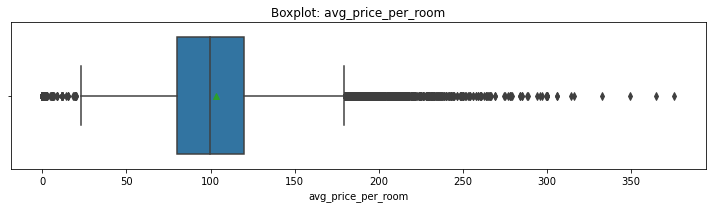

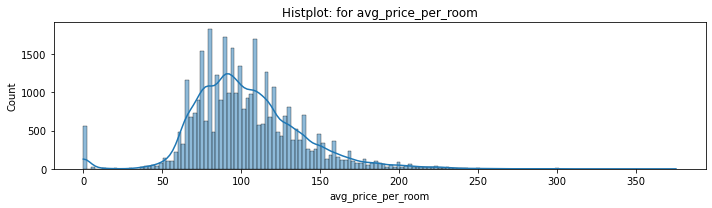

In [51]:
# Boxplot and Histplot for avg_price_per_room
output_pretty_numeric_plots(df, 'avg_price_per_room')

#### Observations
- The avg_price_per_room is 0 and the max is 375.
- The avg_price_per_room is 103.41 which is greater than the median indicating a right skew in the data.
- The data is mostly normal for the exception of the left tail due to the complimentary rooms provided to guests of the hotel.
- avg_price_per_room has outliers

#### Let's investigate no_of_special_requests

count    36275.000000
mean         0.619655
std          0.786236
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: no_of_special_requests, dtype: float64


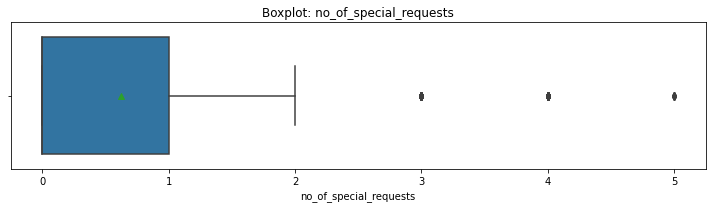

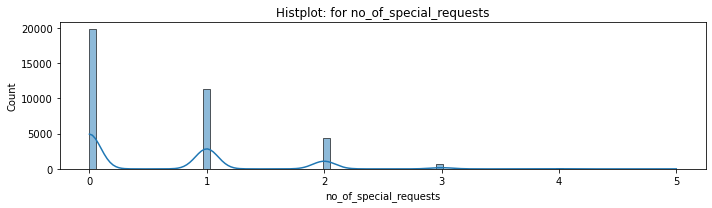

In [52]:
# Boxplot and Histplot for no_of_special_requests
output_pretty_numeric_plots(df, 'no_of_special_requests')

#### Observations
- The no_of_special_requests is 0 and the max is 5.
- The no_of_special_requests is .619 which is greater than the median indicating a right skew in the data.

### Bivariate Analysis

#### Let's investigate correlation

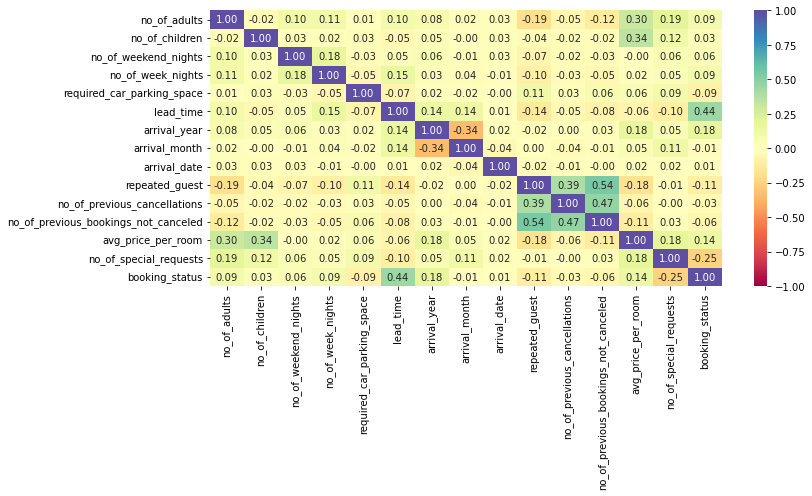

In [53]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- no_of_previous_bookings_not_cancelled has positive correlation with repeated_guest of .54.
- no_of_previous_bookings_not_cancelled has positive correlation with no_of_previous_cancellations of .47.
- lead_time has a positive correlation with booking_status of .44
- no_of_special_requests has a slight negative correlation with booking_status of -.25

#### Let's investigate type_of_meal_plan vs room_type_reserved

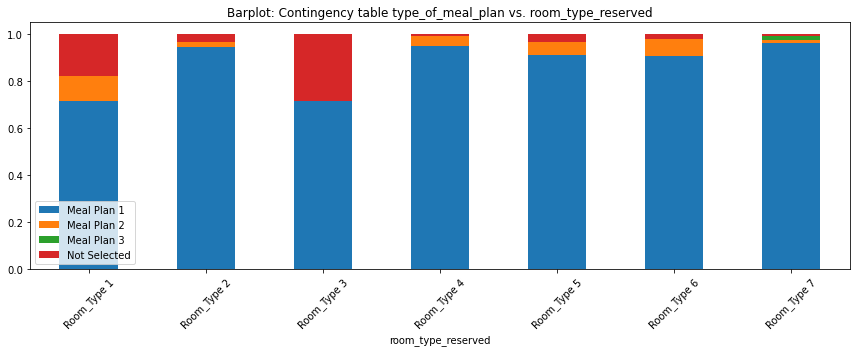

type_of_meal_plan   Meal Plan 1  Meal Plan 2  Meal Plan 3  Not Selected
room_type_reserved                                                     
Room_Type 1            0.716566     0.104301     0.000036      0.179097
Room_Type 2            0.943642     0.023121     0.000000      0.033237
Room_Type 3            0.714286     0.000000     0.000000      0.285714
Room_Type 4            0.948985     0.045072     0.000165      0.005778
Room_Type 5            0.913208     0.052830     0.000000      0.033962
Room_Type 6            0.908903     0.068323     0.000000      0.022774
Room_Type 7            0.962025     0.012658     0.018987      0.006329

In [54]:
# crosstab plot of type_of_meal_plan vs room_type_reserved
output_pretty_crosstab_plot('Barplot: Contingency table type_of_meal_plan vs. room_type_reserved', \
                            df['room_type_reserved'], df['type_of_meal_plan'])

#### Observations
- Meal Plan 1 is the most popular type_of_meal_plan across all room_type_reserved categories.
- Meal Plan 3 is the least popular type_of_meal_plan across all room_type_reserved categories.

#### Let's investigate room_type_reserved vs market_segment_type

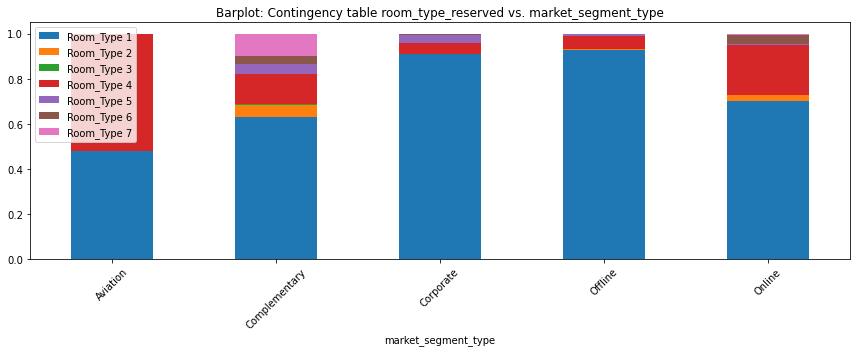

room_type_reserved   Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
market_segment_type                                                       
Aviation                0.480000     0.000000     0.000000     0.520000   
Complementary           0.631714     0.051151     0.005115     0.132992   
Corporate               0.908775     0.000992     0.000496     0.049083   
Offline                 0.925817     0.005414     0.000190     0.058226   
Online                  0.699707     0.026406     0.000086     0.225209   

room_type_reserved   Room_Type 5  Room_Type 6  Room_Type 7  
market_segment_type                                         
Aviation                0.000000     0.000000     0.000000  
Complementary           0.043478     0.035806     0.099744  
Corporate               0.036688     0.001487     0.002479  
Offline                 0.007694     0.002185     0.000475  
Online                  0.004006     0.039890     0.004695

In [55]:
# crosstab plot of room_type_reserved vs market_segment_type
output_pretty_crosstab_plot('Barplot: Contingency table room_type_reserved vs. market_segment_type', \
                             df['market_segment_type'], df['room_type_reserved'])

#### Observations
- The most popular room_type_reserved for Aviation is Room_Type 4 followed by Room_Type 1. None of the other room types were selected.
- The most popular room_type_reserved for Complimentary is Room_Type 1 and the least popular is Room_Type 3.
- The most popular room_type_reserved for Corporate is Room_Type 1 and the least popular is Room_Type 3.
- The most popular room_type_reserved for Offline is Room_Type 1 and the least popular is Room_Type 3.
- The most popular room_type_reserved for Online is Room_Type 1 and ast popular is Room_Type 3.
- From the data the hotel may want to consider removing some of the unpopular room types such as Room_Type 3 and updating them to Room_Type 1 or 4.

#### Let's investigate market_segment_type vs booking_status

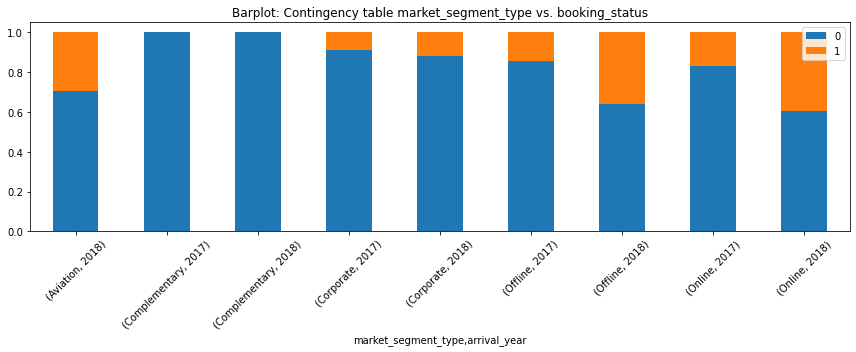

booking_status                           0         1
market_segment_type arrival_year                    
Aviation            2018          0.704000  0.296000
Complementary       2017          1.000000  0.000000
                    2018          1.000000  0.000000
Corporate           2017          0.913655  0.086345
                    2018          0.883476  0.116524
Offline             2017          0.858168  0.141832
                    2018          0.639832  0.360168
Online              2017          0.829549  0.170451
                    2018          0.606574  0.393426

In [56]:
# crosstab plot of market_segment_type vs booking_status
output_pretty_crosstab_plot('Barplot: Contingency table market_segment_type vs. booking_status', \
                            [df['market_segment_type'],df['arrival_year']], df['booking_status'])

#### Observations
- The Offline market segment had the largest YOY cancellation rate of 153.39% of all the market segments.


- The Aviation market segment did not exist in 2017 and in 2018 70.4% of its bookings were not canceled.


- The Complimentary market segment did not cancel any of their bookings in 2017 or 2108.


- The Corporate market segment canceled 8.6% any of their bookings in 2017
- The Corporate market segment canceled 11.6% any of their bookings in 2018 which represents in increase in cancellations for this segment of 34.88%.


- The Offline market segment canceled 14.1% any of their bookings in 2017
- The Offline market segment canceled 36.0% any of their bookings in 2018 which represents in increase in cancellations for this segment of 155.39%.


- The Online market segment canceled 17.0% any of their bookings in 2017
- The Online market segment canceled 39.3% any of their bookings in 2018 which represents in increase in cancellations for this segment of 131.17%.


#### Let's investigate market_segment_type vs no_of_adults

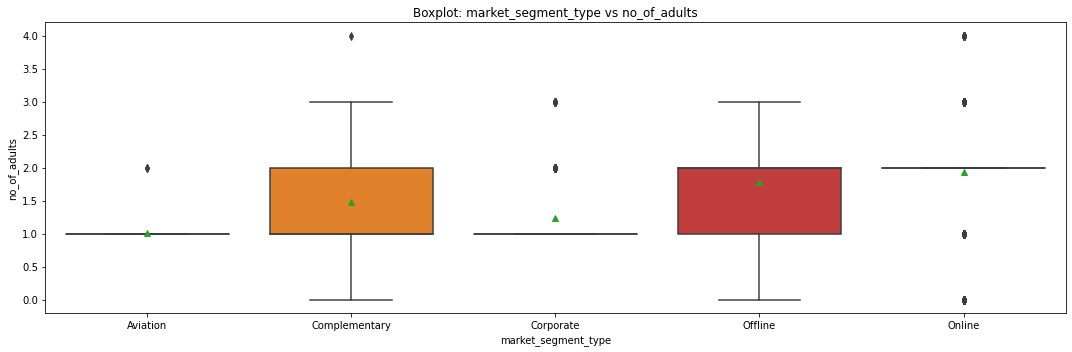

no_of_adults                                             
                           count      mean       std  min  25%  50%  75%  max
market_segment_type                                                          
Aviation                   125.0  1.016000  0.125980  1.0  1.0  1.0  1.0  2.0
Complementary              391.0  1.483376  0.549223  0.0  1.0  1.0  2.0  4.0
Corporate                 2017.0  1.230045  0.436015  1.0  1.0  1.0  1.0  3.0
Offline                  10528.0  1.777641  0.478715  0.0  1.0  2.0  2.0  3.0
Online                   23214.0  1.939476  0.495096  0.0  2.0  2.0  2.0  4.0

In [57]:
# Boxplot market_segment_type vs no_of_adults
sort_index = df.groupby('market_segment_type')[['no_of_adults']].median().sort_values(by='no_of_adults').index
output_pretty_boxplot(df, x='market_segment_type', y='no_of_adults',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['market_segment_type'])[['no_of_adults']].describe()
describe_df

#### Observations
- The Online market segment had the largest mean number of adults for bookings of 1.93.
- The Aviation market segment had the lowest mean number of adults for bookings of 1.01.
- All market segments have outliers.


- Min no_of_adults value for Aviation market_segment_type is 1.000 and max is 2.000
- Mean no_of_adults for Aviation market_segment_type is 1.016 which is greater than the median indicating the data is right skewed.


- Min no_of_adults value for Complementary market_segment_type is 0.000 and max is 4.000
- Mean no_of_adults for Complementary market_segment_type is 1.483 which is greater than the median indicating the data is right skewed.


- Min no_of_adults value for Corporate market_segment_type is 1.000 and max is 3.000
- Mean no_of_adults for Corporate market_segment_type is 1.230 which is greater than the median indicating the data is right skewed.


- Min no_of_adults value for Offline market_segment_type is 0.000 and max is 3.000
- Mean no_of_adults for Offline market_segment_type is 1.778 which is less than the median indicating the data is left skewed.


- Min no_of_adults value for Online market_segment_type is 0.000 and max is 4.000
- Mean no_of_adults for Online market_segment_type is 1.939 which is less than the median indicating the data is left skewed.

#### Let's investigate room_type_reserved vs no_of_weekend_nights

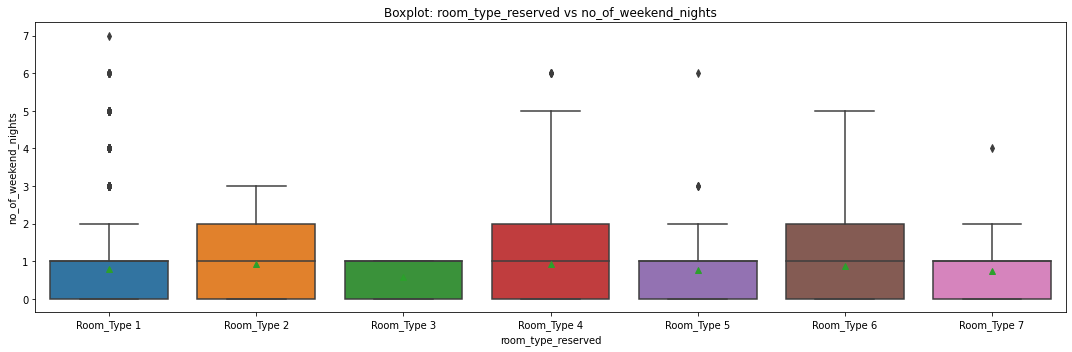

no_of_weekend_nights                                     \
                                  count      mean       std  min  25%  50%   
room_type_reserved                                                           
Room_Type 1                     28130.0  0.779844  0.858207  0.0  0.0  1.0   
Room_Type 2                       692.0  0.929191  0.873745  0.0  0.0  1.0   
Room_Type 3                         7.0  0.571429  0.534522  0.0  0.0  1.0   
Room_Type 4                      6057.0  0.933465  0.906474  0.0  0.0  1.0   
Room_Type 5                       265.0  0.758491  0.862834  0.0  0.0  1.0   
Room_Type 6                       966.0  0.883023  0.929528  0.0  0.0  1.0   
Room_Type 7                       158.0  0.740506  0.830780  0.0  0.0  1.0   

                              
                    75%  max  
room_type_reserved            
Room_Type 1         1.0  7.0  
Room_Type 2         2.0  3.0  
Room_Type 3         1.0  1.0  
Room_Type 4         2.0  6.0  
Room_Type 5         1.0  6.0  
Room_Type 6         2.0  5.0  
Room_Type 7         1.0  4.0

In [58]:
# Boxplot room_type_reserved vs no_of_weekend_nights
sort_index = df.groupby('room_type_reserved')[['no_of_weekend_nights']].median()\
                        .sort_values(by='no_of_weekend_nights').index
output_pretty_boxplot(df, x='room_type_reserved', y='no_of_weekend_nights',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['room_type_reserved'])[['no_of_weekend_nights']].describe()
describe_df

#### Observations
- Room_Type 4 has the highest mean number of weekend nights of .933 at the hotel.
- Room_Type 3 has the lowest mean number of weekend nights of .571 at the hotel.

- Min no_of_weekend_nights value for Room_Type 1 room_type_reserved is 0.000 and max is 7.000
- Mean no_of_weekend_nights for Room_Type 1 room_type_reserved is 0.780 which is less than the median indicating the data is left skewed.


- Min no_of_weekend_nights value for Room_Type 2 room_type_reserved is 0.000 and max is 3.000
- Mean no_of_weekend_nights for Room_Type 2 room_type_reserved is 0.929 which is less than the median indicating the data is left skewed.


- Min no_of_weekend_nights value for Room_Type 3 room_type_reserved is 0.000 and max is 1.000
- Mean no_of_weekend_nights for Room_Type 3 room_type_reserved is 0.571 which is less than the median indicating the data is left skewed.


- Min no_of_weekend_nights value for Room_Type 4 room_type_reserved is 0.000 and max is 6.000
- Mean no_of_weekend_nights for Room_Type 4 room_type_reserved is 0.933 which is less than the median indicating the data is left skewed.


- Min no_of_weekend_nights value for Room_Type 5 room_type_reserved is 0.000 and max is 6.000
- Mean no_of_weekend_nights for Room_Type 5 room_type_reserved is 0.758 which is less than the median indicating the data is left skewed.


- Min no_of_weekend_nights value for Room_Type 6 room_type_reserved is 0.000 and max is 5.000
- Mean no_of_weekend_nights for Room_Type 6 room_type_reserved is 0.883 which is less than the median indicating the data is left skewed.


- Min no_of_weekend_nights value for Room_Type 7 room_type_reserved is 0.000 and max is 4.000
- Mean no_of_weekend_nights for Room_Type 7 room_type_reserved is 0.741 which is less than the median indicating the data is left skewed.


#### Let's investigate market_segment_type vs no_of_weekend_nights

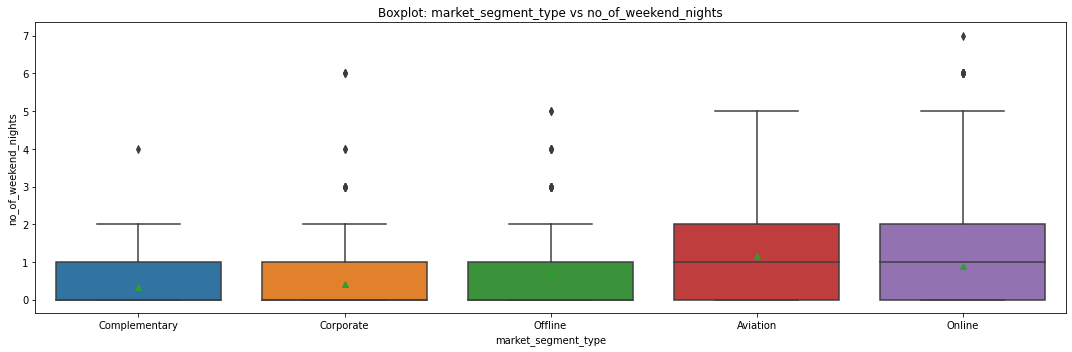

no_of_weekend_nights                                     \
                                   count      mean       std  min  25%  50%   
market_segment_type                                                           
Aviation                           125.0  1.160000  1.526117  0.0  0.0  1.0   
Complementary                      391.0  0.329923  0.612770  0.0  0.0  0.0   
Corporate                         2017.0  0.427863  0.703504  0.0  0.0  0.0   
Offline                          10528.0  0.730528  0.825090  0.0  0.0  0.0   
Online                           23214.0  0.886577  0.887755  0.0  0.0  1.0   

                               
                     75%  max  
market_segment_type            
Aviation             2.0  5.0  
Complementary        1.0  4.0  
Corporate            1.0  6.0  
Offline              1.0  5.0  
Online               2.0  7.0

In [59]:
# Boxplot market_segment_type vs no_of_weekend_nights
sort_index = df.groupby('market_segment_type')[['no_of_weekend_nights']].median()\
                        .sort_values(by='no_of_weekend_nights').index
output_pretty_boxplot(df, x='market_segment_type', y='no_of_weekend_nights',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['market_segment_type'])[['no_of_weekend_nights']].describe()
describe_df

#### Observations
- Aviation has the highest mean number of weekend nights of 1.16 of all the segments.
- Corporate has the lowest mean number of weekend nights of .427 of all the segments.


- Min no_of_weekend_nights value for Aviation market_segment_type is 0.000 and max is 5.000
- Mean no_of_weekend_nights for Aviation market_segment_type is 1.160 which is greater than the median indicating the data is right skewed.


- Min no_of_weekend_nights value for Complementary market_segment_type is 0.000 and max is 4.000
- Mean no_of_weekend_nights for Complementary market_segment_type is 0.330 which is greater than the median indicating the data is right skewed.


- Min no_of_weekend_nights value for Corporate market_segment_type is 0.000 and max is 6.000
- Mean no_of_weekend_nights for Corporate market_segment_type is 0.428 which is greater than the median indicating the data is right skewed.


- Min no_of_weekend_nights value for Offline market_segment_type is 0.000 and max is 5.000
- Mean no_of_weekend_nights for Offline market_segment_type is 0.731 which is greater than the median indicating the data is right skewed.


- Min no_of_weekend_nights value for Online market_segment_type is 0.000 and max is 7.000
- Mean no_of_weekend_nights for Online market_segment_type is 0.887 which is less than the median indicating the data is left skewed.

#### Let's investigate booking_status vs no_of_weekend_nights

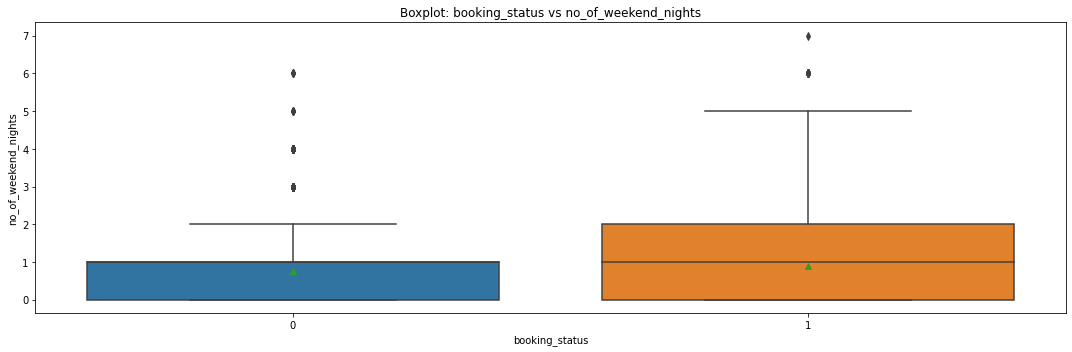

no_of_weekend_nights                                          \
                              count      mean       std  min  25%  50%  75%   
booking_status                                                                
0                           24390.0  0.773309  0.843428  0.0  0.0  1.0  1.0   
1                           11885.0  0.887505  0.919267  0.0  0.0  1.0  2.0   

                     
                max  
booking_status       
0               6.0  
1               7.0

In [60]:
# Boxplot booking_status vs no_of_weekend_nights
output_pretty_boxplot(df, x='booking_status', y='no_of_weekend_nights',\
                     figsize=(15,5));
describe_df = df.groupby(['booking_status'])[['no_of_weekend_nights']].describe()
describe_df

#### Observations
- For guests that canceled the mean no_of_weekend_nights is 14.74% higher than guests that did not cancel. 

#### Let's investigate room_type_reserved vs no_of_week_nights

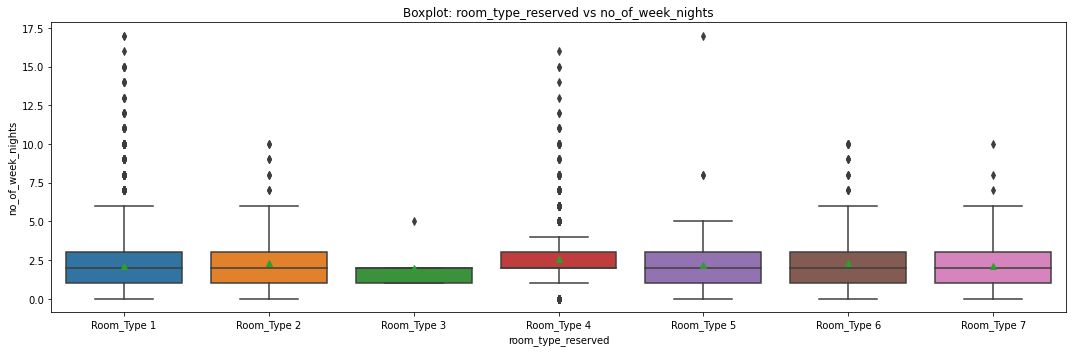

no_of_week_nights                                          \
                               count      mean       std  min  25%  50%  75%   
room_type_reserved                                                             
Room_Type 1                  28130.0  2.125133  1.375312  0.0  1.0  2.0  3.0   
Room_Type 2                    692.0  2.316474  1.376720  0.0  1.0  2.0  3.0   
Room_Type 3                      7.0  2.000000  1.414214  1.0  1.0  2.0  2.0   
Room_Type 4                   6057.0  2.541027  1.486623  0.0  2.0  2.0  3.0   
Room_Type 5                    265.0  2.196226  1.700931  0.0  1.0  2.0  3.0   
Room_Type 6                    966.0  2.330228  1.536990  0.0  1.0  2.0  3.0   
Room_Type 7                    158.0  2.151899  1.527569  0.0  1.0  2.0  3.0   

                          
                     max  
room_type_reserved        
Room_Type 1         17.0  
Room_Type 2         10.0  
Room_Type 3          5.0  
Room_Type 4         16.0  
Room_Type 5         17.0  
Room_Type 6         10.0  
Room_Type 7         10.0

In [61]:
# Boxplot room_type_reserved vs no_of_week_nights
sort_index = df.groupby('room_type_reserved')[['no_of_week_nights']].median()\
                        .sort_values(by='no_of_week_nights').index
output_pretty_boxplot(df, x='room_type_reserved', y='no_of_week_nights',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['room_type_reserved'])[['no_of_week_nights']].describe()
describe_df

#### Observations
- Room_Type 4 has the highest mean number of week nights of 2.54 of all the segments.
- Room_Type 3 has the lowest mean number of week nights of 2 of all the segments.
- All room types have outliers.


- Min no_of_week_nights value for Room_Type 1 room_type_reserved is 0.000 and max is 17.000
- Mean no_of_week_nights for Room_Type 1 room_type_reserved is 2.125 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Room_Type 2 room_type_reserved is 0.000 and max is 10.000
- Mean no_of_week_nights for Room_Type 2 room_type_reserved is 2.316 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Room_Type 3 room_type_reserved is 1.000 and max is 5.000
- Mean no_of_week_nights for Room_Type 3 room_type_reserved is 2.000 which is the same as the median indicating the data is not skewed.


- Min no_of_week_nights value for Room_Type 4 room_type_reserved is 0.000 and max is 16.000
- Mean no_of_week_nights for Room_Type 4 room_type_reserved is 2.541 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Room_Type 5 room_type_reserved is 0.000 and max is 17.000
- Mean no_of_week_nights for Room_Type 5 room_type_reserved is 2.196 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Room_Type 6 room_type_reserved is 0.000 and max is 10.000
- Mean no_of_week_nights for Room_Type 6 room_type_reserved is 2.330 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Room_Type 7 room_type_reserved is 0.000 and max is 10.000
- Mean no_of_week_nights for Room_Type 7 room_type_reserved is 2.152 which is greater than the median indicating the data is right skewed.


#### Let's investigate market_segment_type vs no_of_week_nights

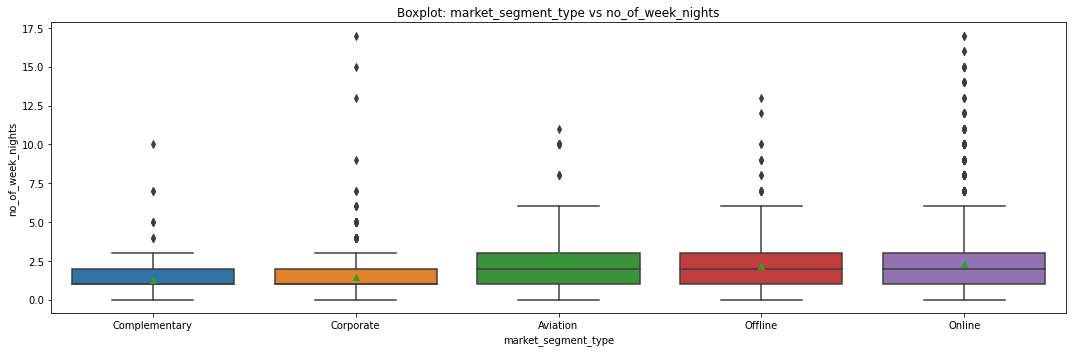

no_of_week_nights                                          \
                                count      mean       std  min  25%  50%  75%   
market_segment_type                                                             
Aviation                        125.0  2.856000  2.804674  0.0  1.0  2.0  3.0   
Complementary                   391.0  1.240409  1.004351  0.0  1.0  1.0  2.0   
Corporate                      2017.0  1.488845  1.135205  0.0  1.0  1.0  2.0   
Offline                       10528.0  2.180661  1.136724  0.0  1.0  2.0  3.0   
Online                        23214.0  2.289911  1.511240  0.0  1.0  2.0  3.0   

                           
                      max  
market_segment_type        
Aviation             11.0  
Complementary        10.0  
Corporate            17.0  
Offline              13.0  
Online               17.0

In [62]:
# Boxplot market_segment_type vs no_of_week_nights
sort_index = df.groupby('market_segment_type')[['no_of_week_nights']].median()\
                        .sort_values(by='no_of_week_nights').index
output_pretty_boxplot(df, x='market_segment_type', y='no_of_week_nights',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['market_segment_type'])[['no_of_week_nights']].describe()
describe_df

#### Observations
- Aviation has the highest mean number of week nights of 2.85 of all the segments.
- Complementary has the lowest mean number of week nights of 1.24 of all the segments.
- All market segments have outliers.


- Min no_of_week_nights value for Aviation market_segment_type is 0.000 and max is 11.000
- Mean no_of_week_nights for Aviation market_segment_type is 2.856 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Complementary market_segment_type is 0.000 and max is 10.000
- Mean no_of_week_nights for Complementary market_segment_type is 1.240 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Corporate market_segment_type is 0.000 and max is 17.000
- Mean no_of_week_nights for Corporate market_segment_type is 1.489 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Offline market_segment_type is 0.000 and max is 13.000
- Mean no_of_week_nights for Offline market_segment_type is 2.181 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for Online market_segment_type is 0.000 and max is 17.000
- Mean no_of_week_nights for Online market_segment_type is 2.290 which is greater than the median indicating the data is right skewed.

#### Let's investigate booking_status vs no_of_week_nights

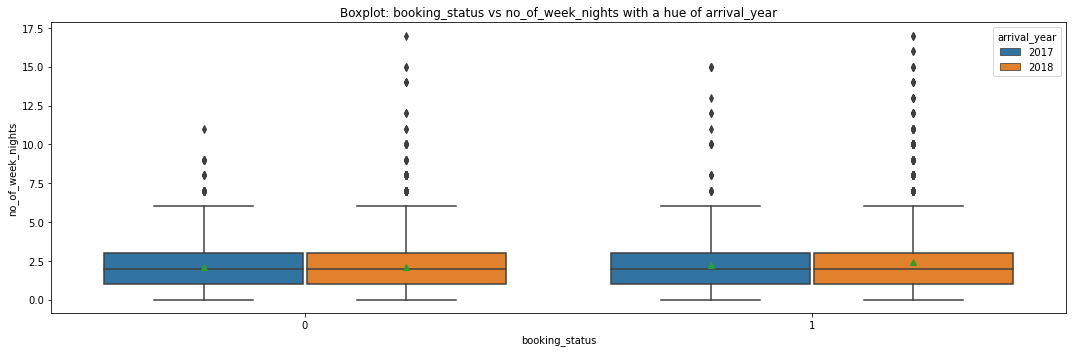

no_of_week_nights                                \
                                        count      mean       std  min  25%   
booking_status arrival_year                                                   
0              2017                    5553.0  2.080677  1.223999  0.0  1.0   
               2018                   18837.0  2.122153  1.333128  0.0  1.0   
1              2017                     961.0  2.250780  1.743010  0.0  1.0   
               2018                   10924.0  2.404705  1.567715  0.0  1.0   

                                             
                             50%  75%   max  
booking_status arrival_year                  
0              2017          2.0  3.0  11.0  
               2018          2.0  3.0  17.0  
1              2017          2.0  3.0  15.0  
               2018          2.0  3.0  17.0

In [63]:
# Boxplot booking_status vs no_of_week_nights
output_pretty_boxplot(df, x='booking_status', y='no_of_week_nights',\
                     figsize=(15,5), hue='arrival_year');
describe_df = df.groupby(['booking_status','arrival_year'])[['no_of_week_nights']].describe()
describe_df

#### Observations
- For 2017 the no_of_week_nights for guest that canceled was 8.17% higher than those that did not cancel.
- For 2018 the no_of_week_nights for guest that canceled was 13.2% higher than those that did not cancel.
- All booking statuses have outliers with respect to no_of_week_nights.


- Min no_of_week_nights value for 0 booking_status and 2017 arrival_year is 0.000 and max is 11.000
- Mean no_of_week_nights for 0 booking_status and 2017 arrival_year is 2.081 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for 0 booking_status and 2018 arrival_year is 0.000 and max is 17.000
- Mean no_of_week_nights for 0 booking_status and 2018 arrival_year is 2.122 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for 1 booking_status and 2017 arrival_year is 0.000 and max is 15.000
- Mean no_of_week_nights for 1 booking_status and 2017 arrival_year is 2.251 which is greater than the median indicating the data is right skewed.


- Min no_of_week_nights value for 1 booking_status and 2018 arrival_year is 0.000 and max is 17.000
- Mean no_of_week_nights for 1 booking_status and 2018 arrival_year is 2.405 which is greater than the median indicating the data is right skewed.


#### Let's investigate room_type_reserved vs lead_time

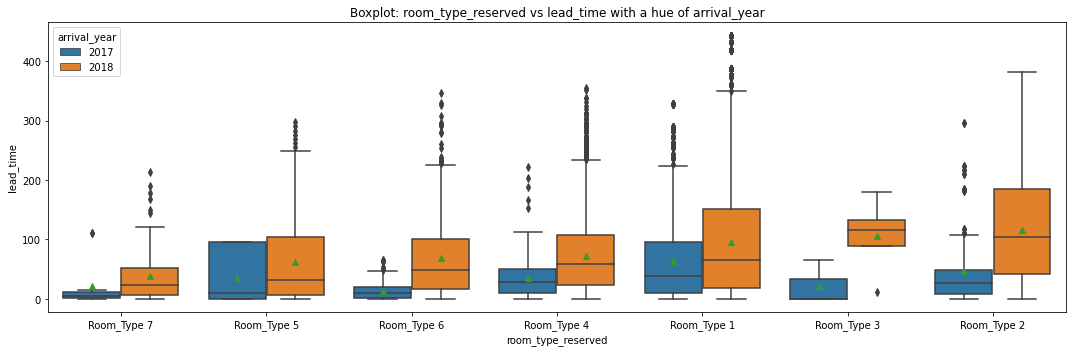

lead_time                                      \
                                    count        mean        std   min    25%   
room_type_reserved arrival_year                                                 
Room_Type 1        2017            5655.0   62.809903  68.819407   0.0   9.00   
                   2018           22475.0   96.394483  94.417298   0.0  19.00   
Room_Type 2        2017             147.0   47.095238  60.500802   0.0   7.50   
                   2018             545.0  115.566972  85.315912   0.0  41.00   
Room_Type 3        2017               3.0   22.000000  38.105118   0.0   0.00   
                   2018               4.0  105.250000  69.911253  11.0  88.25   
Room_Type 4        2017             544.0   34.220588  31.033207   0.0   9.00   
                   2018            5513.0   72.657900  60.751055   0.0  24.00   
Room_Type 5        2017              20.0   35.500000  43.471104   0.0   0.00   
                   2018             245.0   61.510204  72.052896   0.0   6.00   
Room_Type 6        2017             132.0   13.689394  14.790719   0.0   2.00   
                   2018             834.0   68.505995  65.702506   0.0  17.00   
Room_Type 7        2017              13.0   21.307692  39.636651   0.0   2.00   
                   2018             145.0   38.510345  43.817982   0.0   6.00   

                                                      
                                   50%    75%    max  
room_type_reserved arrival_year                       
Room_Type 1        2017           38.0   96.0  327.0  
                   2018           65.0  151.0  443.0  
Room_Type 2        2017           27.0   48.0  296.0  
                   2018          104.0  185.0  381.0  
Room_Type 3        2017            0.0   33.0   66.0  
                   2018          115.0  132.0  180.0  
Room_Type 4        2017           28.5   51.0  221.0  
                   2018           59.0  108.0  355.0  
Room_Type 5        2017           10.0   96.0   96.0  
                   2018           32.0  104.0  297.0  
Room_Type 6        2017           10.0   20.0   66.0  
                   2018           49.0  101.0  346.0  
Room_Type 7        2017            4.0   11.0  110.0  
                   2018           24.0   52.0  213.0

In [64]:
# Boxplot room_type_reserved vs lead_time
sort_index = df.groupby(['room_type_reserved'])[['lead_time']].median()\
                        .sort_values(by='lead_time').index
output_pretty_boxplot(df, x='room_type_reserved', y='lead_time',\
                     figsize=(15,5), order=sort_index, hue='arrival_year');
describe_df = df.groupby(['room_type_reserved', 'arrival_year'])[['lead_time']].describe()
describe_df

#### Observations
- In 2017 Room_Type 1 had the longest mean lead_time of 62.8.
- In 2017 Room_Type 6 had the shortest mean lead_time of 13.68.
- In 2018 Room_Type 2 had the longest mean lead_time of 115.56.
- In 2018 Room_Type 7 had the shortest mean lead_time of 38.5.
- These longer lead_times in 2018 could be due to lack of room availability in 2018.
- All room types have outliers with respect to lead time except Room_Type 3,5 in 2017 and Room_Type 2 in 2018.


- Min lead_time value for Room_Type 1 room_type_reserved and 2017 arrival_year is 0.000 and max is 327.000
- Mean lead_time for Room_Type 1 room_type_reserved and 2017 arrival_year is 62.810 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 1 room_type_reserved and 2018 arrival_year is 0.000 and max is 443.000
- Mean lead_time for Room_Type 1 room_type_reserved and 2018 arrival_year is 96.394 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 2 room_type_reserved and 2017 arrival_year is 0.000 and max is 296.000
- Mean lead_time for Room_Type 2 room_type_reserved and 2017 arrival_year is 47.095 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 2 room_type_reserved and 2018 arrival_year is 0.000 and max is 381.000
- Mean lead_time for Room_Type 2 room_type_reserved and 2018 arrival_year is 115.567 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 3 room_type_reserved and 2017 arrival_year is 0.000 and max is 66.000
- Mean lead_time for Room_Type 3 room_type_reserved and 2017 arrival_year is 22.000 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 3 room_type_reserved and 2018 arrival_year is 11.000 and max is 180.000
- Mean lead_time for Room_Type 3 room_type_reserved and 2018 arrival_year is 105.250 which is less than the median indicating the data is left skewed.


- Min lead_time value for Room_Type 4 room_type_reserved and 2017 arrival_year is 0.000 and max is 221.000
- Mean lead_time for Room_Type 4 room_type_reserved and 2017 arrival_year is 34.221 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 4 room_type_reserved and 2018 arrival_year is 0.000 and max is 355.000
- Mean lead_time for Room_Type 4 room_type_reserved and 2018 arrival_year is 72.658 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 5 room_type_reserved and 2017 arrival_year is 0.000 and max is 96.000
- Mean lead_time for Room_Type 5 room_type_reserved and 2017 arrival_year is 35.500 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 5 room_type_reserved and 2018 arrival_year is 0.000 and max is 297.000
- Mean lead_time for Room_Type 5 room_type_reserved and 2018 arrival_year is 61.510 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 6 room_type_reserved and 2017 arrival_year is 0.000 and max is 66.000
- Mean lead_time for Room_Type 6 room_type_reserved and 2017 arrival_year is 13.689 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 6 room_type_reserved and 2018 arrival_year is 0.000 and max is 346.000
- Mean lead_time for Room_Type 6 room_type_reserved and 2018 arrival_year is 68.506 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 7 room_type_reserved and 2017 arrival_year is 0.000 and max is 110.000
- Mean lead_time for Room_Type 7 room_type_reserved and 2017 arrival_year is 21.308 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Room_Type 7 room_type_reserved and 2018 arrival_year is 0.000 and max is 213.000
- Mean lead_time for Room_Type 7 room_type_reserved and 2018 arrival_year is 38.510 which is greater than the median indicating the data is right skewed.


#### Let's investigate market_segment_type vs lead_time

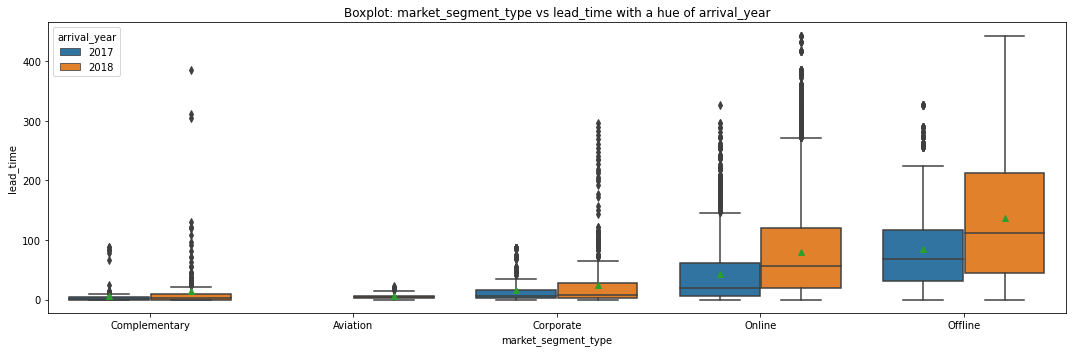

lead_time                                     \
                                     count        mean         std  min   25%   
market_segment_type arrival_year                                                
Aviation            2018             125.0    5.488000    5.215696  0.0   2.0   
Complementary       2017             139.0    6.726619   17.820687  0.0   0.0   
                    2018             252.0   14.964286   41.666896  0.0   0.0   
Corporate           2017             498.0   15.608434   22.834398  0.0   2.0   
                    2018            1519.0   23.853851   38.816208  0.0   3.0   
Offline             2017            2926.0   85.040328   72.680990  0.0  32.0   
                    2018            7602.0  137.434228  107.740637  0.0  45.0   
Online              2017            2951.0   42.715351   54.693900  0.0   6.0   
                    2018           20263.0   80.084686   75.236339  0.0  20.0   

                                                       
                                    50%    75%    max  
market_segment_type arrival_year                       
Aviation            2018            4.0    7.0   23.0  
Complementary       2017            1.0    4.0   88.0  
                    2018            3.0    9.0  386.0  
Corporate           2017            6.5   17.0   87.0  
                    2018            8.0   28.0  297.0  
Offline             2017           68.0  117.0  327.0  
                    2018          112.0  213.0  443.0  
Online              2017           20.0   62.0  327.0  
                    2018           57.0  121.0  443.0

In [65]:
# Boxplot market_segment_type vs lead_time
sort_index = df.groupby('market_segment_type')[['lead_time']].median()\
                        .sort_values(by='lead_time').index
output_pretty_boxplot(df, x='market_segment_type', y='lead_time',\
                     figsize=(15,5), order=sort_index, hue='arrival_year');
describe_df = df.groupby(['market_segment_type', 'arrival_year'])[['lead_time']].describe()
describe_df

#### Observations
- In 2017 Offline had the longest mean lead_time of 85.04.
- In 2018 Offline had the longest mean lead_time of 137.43.
- In 2017 Complementary had the shortest mean lead_time of 5.58.
- In 2018 Aviation had the shortest mean lead_time of 5.48.
- All segments have outliers with respect to lead_time except for Offline in 2018.


- Min lead_time value for Aviation market_segment_type and 2018 arrival_year is 0.000 and max is 23.000
- Mean lead_time for Aviation market_segment_type and 2018 arrival_year is 5.488 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Complementary market_segment_type and 2017 arrival_year is 0.000 and max is 88.000
- Mean lead_time for Complementary market_segment_type and 2017 arrival_year is 6.727 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Complementary market_segment_type and 2018 arrival_year is 0.000 and max is 386.000
- Mean lead_time for Complementary market_segment_type and 2018 arrival_year is 14.964 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Corporate market_segment_type and 2017 arrival_year is 0.000 and max is 87.000
- Mean lead_time for Corporate market_segment_type and 2017 arrival_year is 15.608 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Corporate market_segment_type and 2018 arrival_year is 0.000 and max is 297.000
- Mean lead_time for Corporate market_segment_type and 2018 arrival_year is 23.854 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Offline market_segment_type and 2017 arrival_year is 0.000 and max is 327.000
- Mean lead_time for Offline market_segment_type and 2017 arrival_year is 85.040 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Offline market_segment_type and 2018 arrival_year is 0.000 and max is 443.000
- Mean lead_time for Offline market_segment_type and 2018 arrival_year is 137.434 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Online market_segment_type and 2017 arrival_year is 0.000 and max is 327.000
- Mean lead_time for Online market_segment_type and 2017 arrival_year is 42.715 which is greater than the median indicating the data is right skewed.


- Min lead_time value for Online market_segment_type and 2018 arrival_year is 0.000 and max is 443.000
- Mean lead_time for Online market_segment_type and 2018 arrival_year is 80.085 which is greater than the median indicating the data is right skewed.

#### Let's investigate booking_status vs lead_time

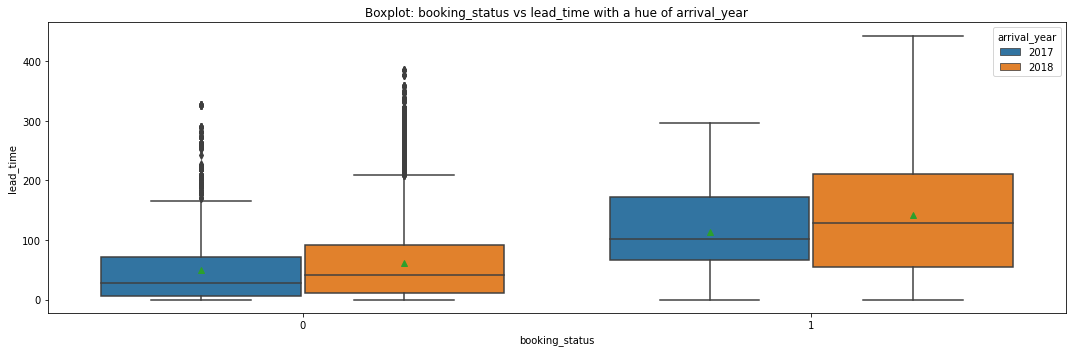

lead_time                                     \
                                count        mean         std  min   25%   
booking_status arrival_year                                                
0              2017            5553.0   49.282190   59.634615  0.0   7.0   
               2018           18837.0   61.770505   64.996543  0.0  12.0   
1              2017             961.0  114.386056   75.321006  0.0  66.0   
               2018           10924.0  141.399762  100.470934  0.0  54.0   

                                                   
                               50%     75%    max  
booking_status arrival_year                        
0              2017           28.0   72.00  327.0  
               2018           42.0   91.00  386.0  
1              2017          102.0  173.00  296.0  
               2018          128.0  210.25  443.0

In [66]:
# Boxplot booking_status vs lead_time
output_pretty_boxplot(df, x='booking_status', y='lead_time',\
                     figsize=(15,5), hue='arrival_year');
describe_df = df.groupby(['booking_status', 'arrival_year'])[['lead_time']].describe()
describe_df

#### Observations
- In 2017 the difference in mean lead_time between guests that did not cancel and those that did was 132.09% higher.
- In 2018 the difference in mean lead_time between guests that did not cancel and those that did was 128.89% higher.

- For guests that did not cancel bookings the mean lead time increased 25.34% from 2017 to 2018.
- For guests that did cancel bookings the mean lead time increased 23.61% from 2017 to 2018.
- booking_status of 0 has outliers with respect to lead_time.


- Min lead_time value for 0 booking_status and 2017 arrival_year is 0.000 and max is 327.000
- Mean lead_time for 0 booking_status and 2017 arrival_year is 49.282 which is greater than the median indicating the data is right skewed.


- Min lead_time value for 0 booking_status and 2018 arrival_year is 0.000 and max is 386.000
- Mean lead_time for 0 booking_status and 2018 arrival_year is 61.771 which is greater than the median indicating the data is right skewed.


- Min lead_time value for 1 booking_status and 2017 arrival_year is 0.000 and max is 296.000
- Mean lead_time for 1 booking_status and 2017 arrival_year is 114.386 which is greater than the median indicating the data is right skewed.


- Min lead_time value for 1 booking_status and 2018 arrival_year is 0.000 and max is 443.000
- Mean lead_time for 1 booking_status and 2018 arrival_year is 141.400 which is greater than the median indicating the data is right skewed.

#### Let's investigate room_type_reserved vs arrival_year

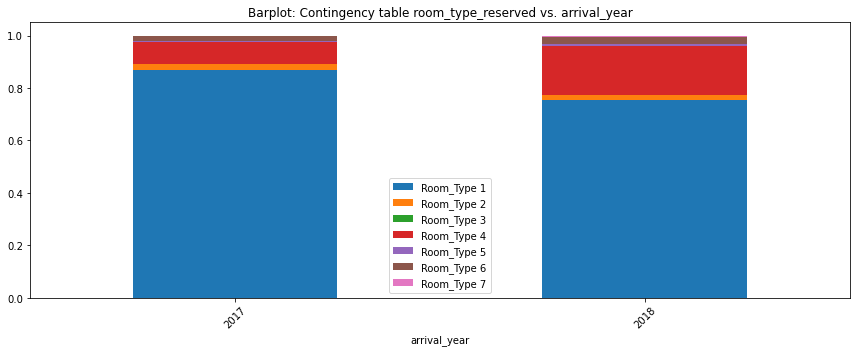

room_type_reserved  Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
arrival_year                                                             
2017                   0.868130     0.022567     0.000461     0.083512   
2018                   0.755183     0.018313     0.000134     0.185242   

room_type_reserved  Room_Type 5  Room_Type 6  Room_Type 7  
arrival_year                                               
2017                   0.003070     0.020264     0.001996  
2018                   0.008232     0.028023     0.004872

In [67]:
# crosstab plot of room_type_reserved vs arrival_year
output_pretty_crosstab_plot('Barplot: Contingency table room_type_reserved vs. arrival_year', \
                            df['arrival_year'], df['room_type_reserved'])

#### Observations
- In 2017 the most popular room type was Room_Type 1 with 86.8% of guests booking.
- In 2018 the most popular room type was Room_Type 1 with 75.5% of guests booking.
- In 2018 Room_Type 1 popularity decreased 13.01% from 2017.
- In 2017 and 2018 Room_Type 3 was the least popular.

#### Let's investigate market_segment_type vs arrival_year

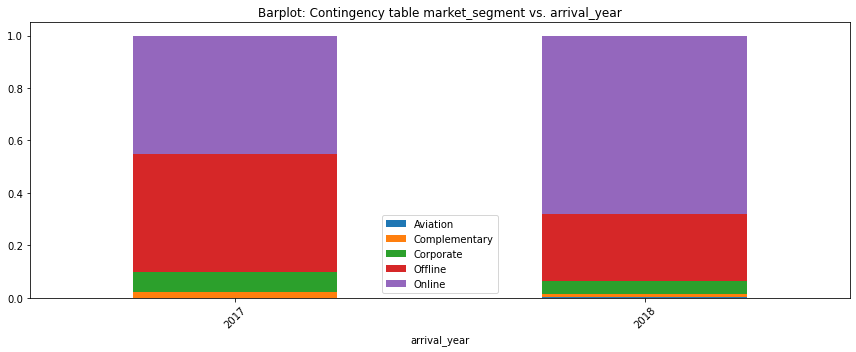

market_segment_type  Aviation  Complementary  Corporate   Offline    Online
arrival_year                                                               
2017                   0.0000       0.021339   0.076451  0.449186  0.453024
2018                   0.0042       0.008467   0.051040  0.255435  0.680857

In [68]:
# crosstab plot of market_segment_type vs arrival_year
output_pretty_crosstab_plot('Barplot: Contingency table market_segment vs. arrival_year', \
                            df['arrival_year'], df['market_segment_type'])

#### Observations
- From 2017 to 2018 the Offline segment decreased 43.20%
- From 2017 to 2018 the Online segment increased 50.11%


- In 2017 the leading market segment at the hotel was Online with 45.3% of the bookings followed by Offline with 44.9%.
- In 2017 the smallest market segment at the hotel was Complementary with 2.1% of the bookings.

- In 2018 the leading market segment at the hotel was Online with 68.0% of the bookings which is a 50.11% increase from 2017.
- In 2018 the smallest market segment at the hotel was Complementary with .8467% of the bookings.

#### Let's investigate booking_status vs arrival_year

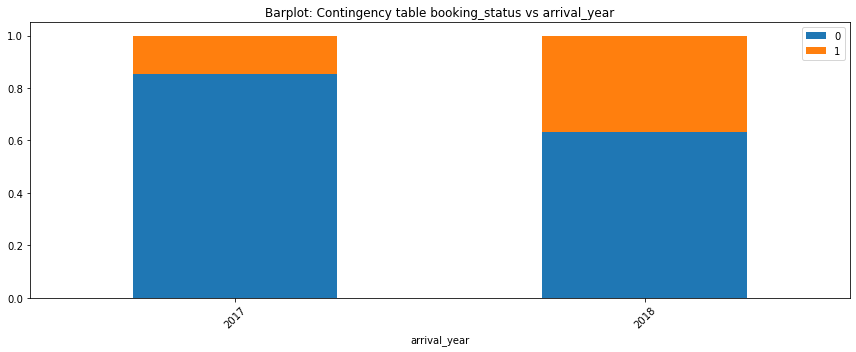

booking_status         0         1
arrival_year                      
2017            0.852472  0.147528
2018            0.632942  0.367058

In [69]:
# crosstab plot of booking_status vs arrival_year
output_pretty_crosstab_plot('Barplot: Contingency table booking_status vs arrival_year', \
                            df['arrival_year'], df['booking_status'])

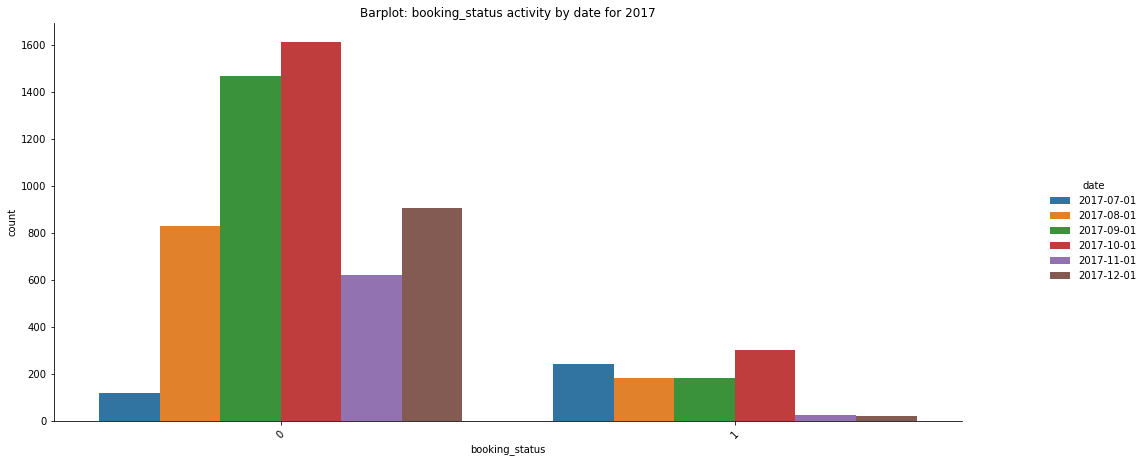

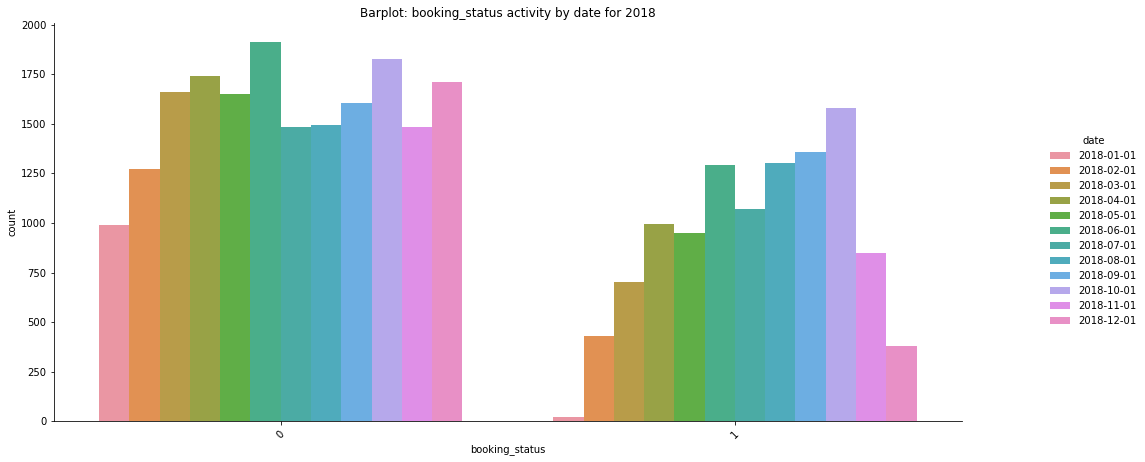

In [70]:
output_pretty_barchart_by_mdy(df, 'booking_status')

#### Observations
- In 2017 14.7% of the guests canceled their bookings.
- In 2018 36.7% of the guests canceled their bookings.
- From 2017 to 2018 there was a 149.65% increase in guest cancellations.

- In 2017 booking cancellations stayed relatively flat.
- In 2018 we see a steep spike in cancellations starting in 2/2018.

#### Let's investigate market_segment_type vs arrival_year, arrival_month

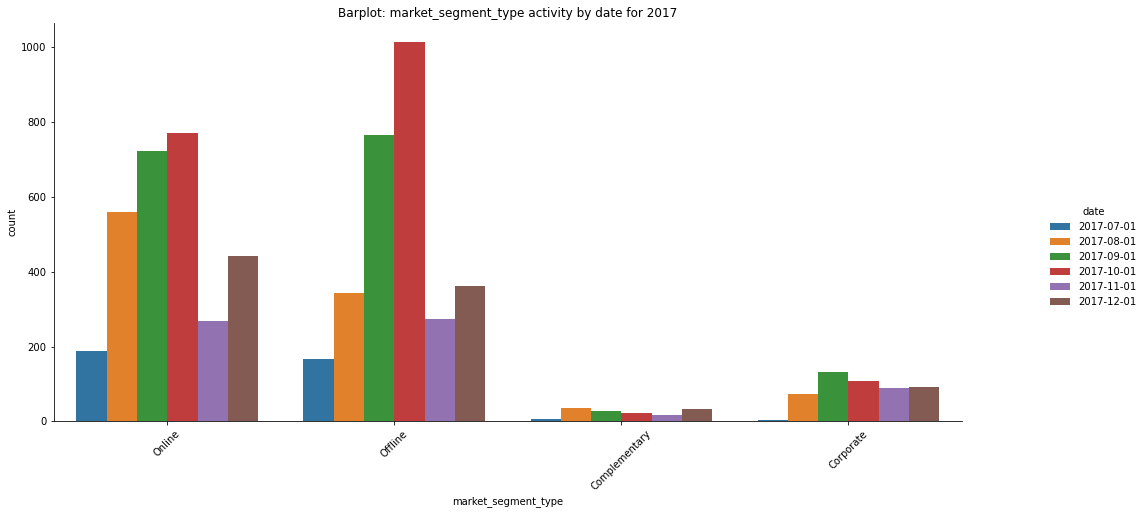

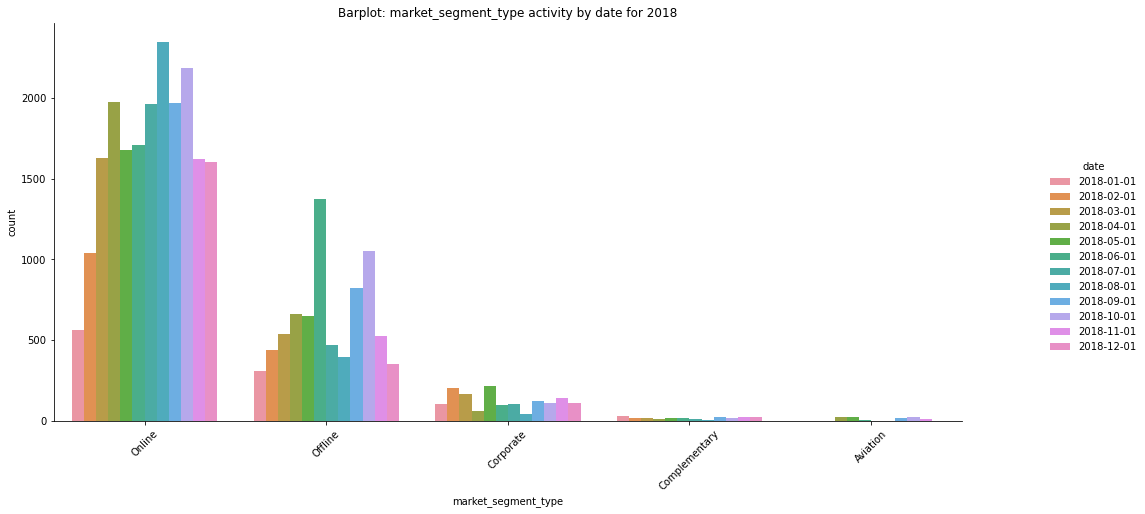

In [71]:
# Output barchart bucketed by month for market_segment_type
output_pretty_barchart_by_mdy(df, 'market_segment_type')

#### Observations
- In 2017 we see Offline and Online dominating the bookings at the hotel while Corporate stayed relatively steady.
- In 2018 we see a new market segment of Aviation and a significant spike in Online bookings as compared to 2018.


#### Let's investigate market_segment_type vs repeated_guest

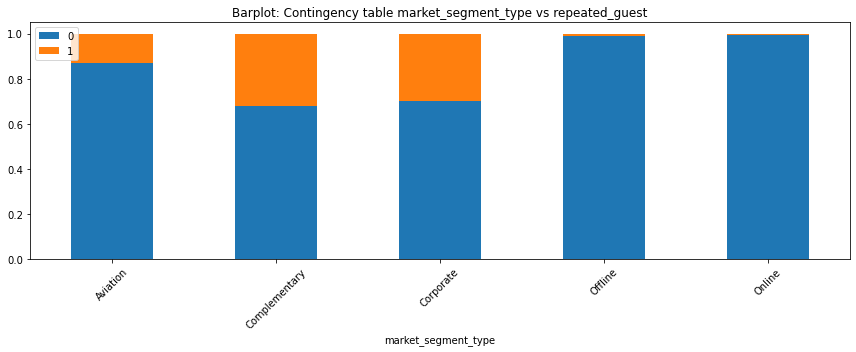

repeated_guest              0         1
market_segment_type                    
Aviation             0.872000  0.128000
Complementary        0.677749  0.322251
Corporate            0.701537  0.298463
Offline              0.991451  0.008549
Online               0.995865  0.004135

In [72]:
# crosstab plot of market_segment_type vs repeated_guest
output_pretty_crosstab_plot('Barplot: Contingency table market_segment_type vs repeated_guest', \
                            df['market_segment_type'], df['repeated_guest'])

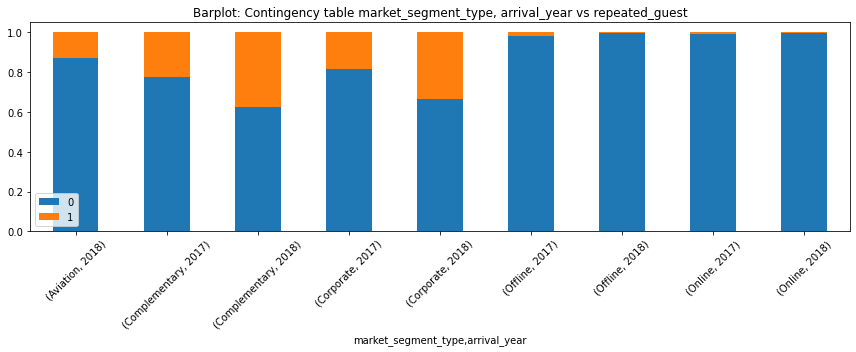

repeated_guest                           0         1
market_segment_type arrival_year                    
Aviation            2018          0.872000  0.128000
Complementary       2017          0.776978  0.223022
                    2018          0.623016  0.376984
Corporate           2017          0.817269  0.182731
                    2018          0.663594  0.336406
Offline             2017          0.980178  0.019822
                    2018          0.995791  0.004209
Online              2017          0.990851  0.009149
                    2018          0.996595  0.003405

In [73]:
# crosstab plot of market_segment_type, arrival_year vs repeated_guest
output_pretty_crosstab_plot('Barplot: Contingency table market_segment_type, arrival_year vs repeated_guest', \
                            [df['market_segment_type'],df['arrival_year']], df['repeated_guest'])

#### Observations
- Overall for Aviation 12.8% of those guests were repeat guests.
- Overall for Complementary 32.2% of those guests were repeat guests.
- Overall for Corporate 29.8% of those guests were repeat guests.
- Overall for Offline .8% of those guests were repeat guests.
- Overall for Online .4% of those guests were repeat guests.


- From 2017 to 2018 for Complementary repeat_guests increased by 68.6%
- From 2017 to 2018 for Corporate repeat_guests increased by 84.61%
- From 2017 to 2018 for Offline repeat_guests decreased by 78.94%
- From 2017 to 2018 for Online repeat_guests decreased by 66.66%

#### Let's investigate booking_status vs repeated_guest

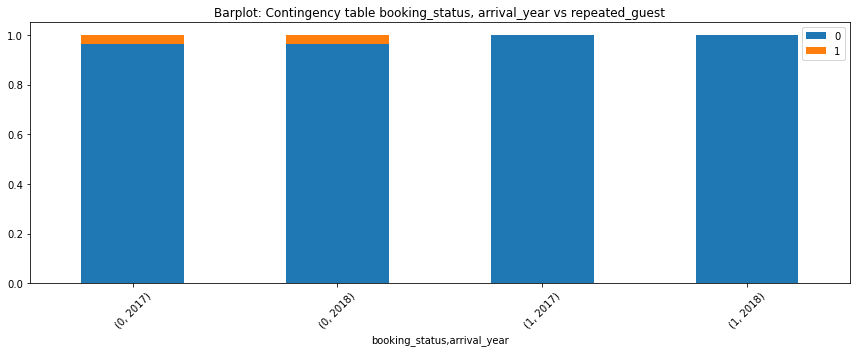

repeated_guest                      0         1
booking_status arrival_year                    
0              2017          0.962723  0.037277
               2018          0.962467  0.037533
1              2017          1.000000  0.000000
               2018          0.998535  0.001465

In [74]:
# crosstab plot of market_segment_type, arrival_year vs repeated_guest
output_pretty_crosstab_plot('Barplot: Contingency table booking_status, arrival_year vs repeated_guest', \
                            [df['booking_status'],df['arrival_year']], df['repeated_guest'])

#### Observations
- In 2017 0% of the guests that did cancel bookings were repeat guests.
- In 2018 .14% of the guests that did cancel bookings were repeat guests.


- In 2017 3.7% of the guests that did not cancel bookings were repeat guests.
- In 2018 3.7% of the guests that did not cancel bookings were repeat guests.


#### Let's investigate market_segment_type vs no_of_previous_bookings_not_canceled

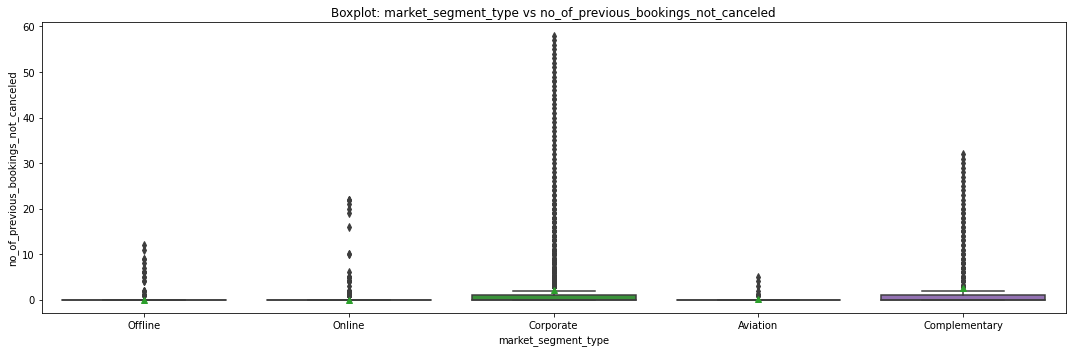

no_of_previous_bookings_not_canceled                      \
                                                   count      mean       std   
market_segment_type                                                            
Aviation                                           125.0  0.208000  0.699032   
Complementary                                      391.0  2.475703  5.811465   
Corporate                                         2017.0  2.070402  6.451129   
Offline                                          10528.0  0.010828  0.273382   
Online                                           23214.0  0.012105  0.388390   

                                               
                     min  25%  50%  75%   max  
market_segment_type                            
Aviation             0.0  0.0  0.0  0.0   5.0  
Complementary        0.0  0.0  0.0  1.0  32.0  
Corporate            0.0  0.0  0.0  1.0  58.0  
Offline              0.0  0.0  0.0  0.0  12.0  
Online               0.0  0.0  0.0  0.0  22.0

In [75]:
# Boxplot market_segment_type vs no_of_previous_bookings_not_canceled
output_pretty_boxplot(df, x='market_segment_type', y='no_of_previous_bookings_not_canceled',\
                     figsize=(15,5));
describe_df = df.groupby(['market_segment_type'])[['no_of_previous_bookings_not_canceled']].describe()
describe_df

#### Observations
- Complementary had the highest mean no_of_previous_bookings_not_canceled of all segments while Offline had the lowest.
- All segments have outliers with respect to no_of_previous_bookings_not_canceled.

- Min no_of_previous_bookings_not_canceled value for Aviation market_segment_type is 0.000 and max is 5.000
- Mean no_of_previous_bookings_not_canceled for Aviation market_segment_type is 0.208 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for Complementary market_segment_type is 0.000 and max is 32.000
- Mean no_of_previous_bookings_not_canceled for Complementary market_segment_type is 2.476 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for Corporate market_segment_type is 0.000 and max is 58.000
- Mean no_of_previous_bookings_not_canceled for Corporate market_segment_type is 2.070 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for Offline market_segment_type is 0.000 and max is 12.000
- Mean no_of_previous_bookings_not_canceled for Offline market_segment_type is 0.011 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for Online market_segment_type is 0.000 and max is 22.000
- Mean no_of_previous_bookings_not_canceled for Online market_segment_type is 0.012 which is greater than the median indicating the data is right skewed.

#### Let's investigate type_of_meal_plan vs avg_price_per_room

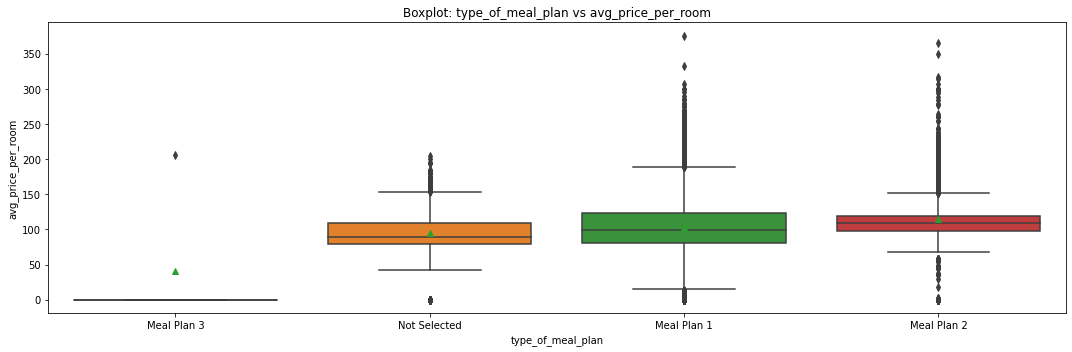

avg_price_per_room                                     \
                               count        mean        std  min    25%   
type_of_meal_plan                                                         
Meal Plan 1                  27835.0  103.580190  35.893293  0.0  80.00   
Meal Plan 2                   3305.0  115.306106  37.405264  0.0  97.75   
Meal Plan 3                      5.0   41.200000  92.126001  0.0   0.00   
Not Selected                  5130.0   94.908610  24.598445  0.0  79.20   

                                           
                      50%      75%    max  
type_of_meal_plan                          
Meal Plan 1         99.45  123.455  375.5  
Meal Plan 2        109.00  119.240  365.0  
Meal Plan 3          0.00    0.000  206.0  
Not Selected        89.25  109.000  204.0

In [76]:
# Boxplot type_of_meal_plan vs avg_price_per_room
sort_index = df.groupby('type_of_meal_plan')[['avg_price_per_room']].median()\
                        .sort_values(by='avg_price_per_room').index
output_pretty_boxplot(df, x='type_of_meal_plan', y='avg_price_per_room',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['type_of_meal_plan'])[['avg_price_per_room']].describe()
describe_df

#### Observations
- Meal Plan 2 had the highest avg_price_per_room while Meal Plan 3 had the lowest.
- All meal plans have outliers with respect to avg_price_per_room.


- Min avg_price_per_room value for Meal Plan 1 type_of_meal_plan is 0.000 and max is 375.500
- Mean avg_price_per_room for Meal Plan 1 type_of_meal_plan is 103.580 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Meal Plan 2 type_of_meal_plan is 0.000 and max is 365.000
- Mean avg_price_per_room for Meal Plan 2 type_of_meal_plan is 115.306 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Meal Plan 3 type_of_meal_plan is 0.000 and max is 206.000
- Mean avg_price_per_room for Meal Plan 3 type_of_meal_plan is 41.200 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Not Selected type_of_meal_plan is 0.000 and max is 204.000
- Mean avg_price_per_room for Not Selected type_of_meal_plan is 94.909 which is greater than the median indicating the data is right skewed.

#### Let's investigate room_type_reserved vs avg_price_per_room

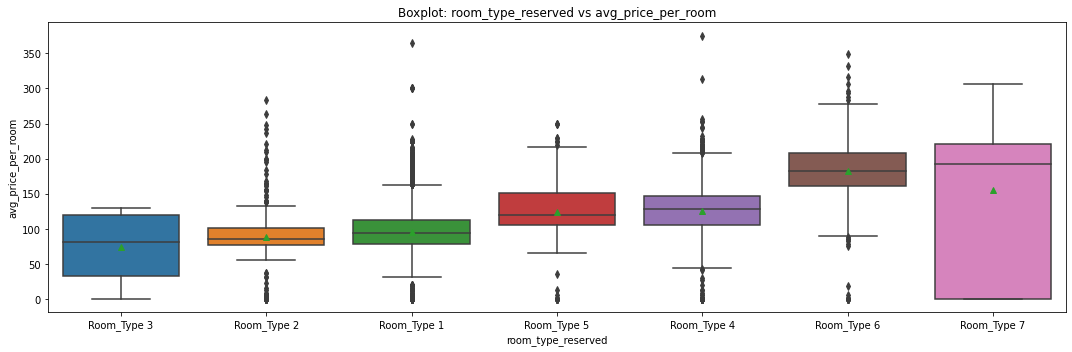

avg_price_per_room                                        \
                                count        mean         std  min      25%   
room_type_reserved                                                            
Room_Type 1                   28130.0   95.905718   27.882090  0.0   78.300   
Room_Type 2                     692.0   87.848555   33.953959  0.0   76.500   
Room_Type 3                       7.0   73.678571   55.746210  0.0   32.500   
Room_Type 4                    6057.0  125.287317   33.395173  0.0  105.610   
Room_Type 5                     265.0  123.733623   49.684916  0.0  105.000   
Room_Type 6                     966.0  182.212836   41.054018  0.0  160.275   
Room_Type 7                     158.0  155.198291  100.135655  0.0    0.250   

                                              
                        50%      75%     max  
room_type_reserved                            
Room_Type 1          94.500  112.200  365.00  
Room_Type 2          85.225  100.700  284.10  
Room_Type 3          80.750  120.000  130.00  
Room_Type 4         127.800  146.700  375.50  
Room_Type 5         120.000  150.570  250.00  
Room_Type 6         182.000  207.835  349.63  
Room_Type 7         192.725  221.285  306.00

In [77]:
# Boxplot room_type_reserved vs avg_price_per_room
sort_index = df.groupby('room_type_reserved')[['avg_price_per_room']].median()\
                        .sort_values(by='avg_price_per_room').index
output_pretty_boxplot(df, x='room_type_reserved', y='avg_price_per_room',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['room_type_reserved'])[['avg_price_per_room']].describe()
describe_df

#### Observations
- Room Type 6 had the highest avg_price_per_room while Room Type 3 had the lowest.
- All room types have outliers with respect to avg_price_per_room except for Room_Type 3 and 7.


- Min avg_price_per_room value for Room_Type 1 room_type_reserved is 0.000 and max is 365.000
- Mean avg_price_per_room for Room_Type 1 room_type_reserved is 95.906 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Room_Type 2 room_type_reserved is 0.000 and max is 284.100
- Mean avg_price_per_room for Room_Type 2 room_type_reserved is 87.849 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Room_Type 3 room_type_reserved is 0.000 and max is 130.000
- Mean avg_price_per_room for Room_Type 3 room_type_reserved is 73.679 which is less than the median indicating the data is left skewed.


- Min avg_price_per_room value for Room_Type 4 room_type_reserved is 0.000 and max is 375.500
- Mean avg_price_per_room for Room_Type 4 room_type_reserved is 125.287 which is less than the median indicating the data is left skewed.


- Min avg_price_per_room value for Room_Type 5 room_type_reserved is 0.000 and max is 250.000
- Mean avg_price_per_room for Room_Type 5 room_type_reserved is 123.734 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Room_Type 6 room_type_reserved is 0.000 and max is 349.630
- Mean avg_price_per_room for Room_Type 6 room_type_reserved is 182.213 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Room_Type 7 room_type_reserved is 0.000 and max is 306.000
- Mean avg_price_per_room for Room_Type 7 room_type_reserved is 155.198 which is less than the median indicating the data is left skewed.


#### Let's investigate market_segment_type vs avg_price_per_room

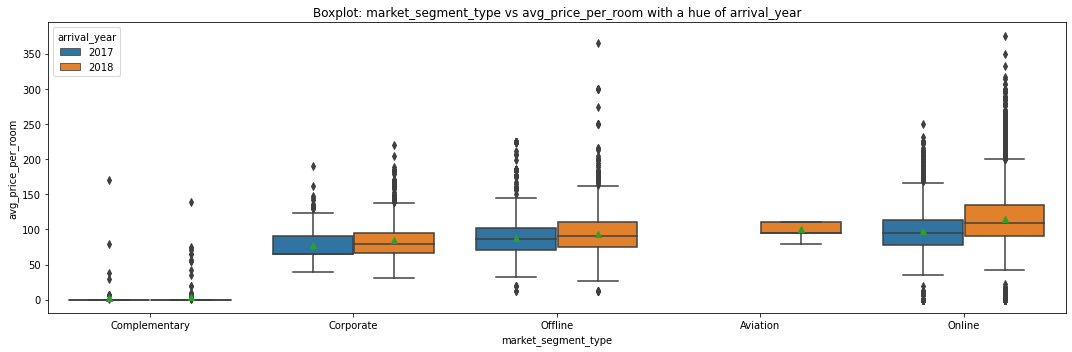

avg_price_per_room                         \
                                              count        mean        std   
market_segment_type arrival_year                                             
Aviation            2018                      125.0  100.704000   8.538361   
Complementary       2017                      139.0    2.452734  16.304591   
                    2018                      252.0    3.521825  15.078299   
Corporate           2017                      498.0   77.152892  19.922751   
                    2018                     1519.0   84.799763  24.513904   
Offline             2017                     2926.0   88.386965  25.975858   
                    2018                     7602.0   92.834534  23.972968   
Online              2017                     2951.0   97.952694  34.368411   
                    2018                    20263.0  114.340040  34.857191   

                                                                      
                                   min     25%    50%    75%     max  
market_segment_type arrival_year                                      
Aviation            2018          79.0  95.000   95.0  110.0  110.00  
Complementary       2017           0.0   0.000    0.0    0.0  170.00  
                    2018           0.0   0.000    0.0    0.0  139.00  
Corporate           2017          40.0  65.000   65.0   90.0  190.00  
                    2018          31.0  66.000   79.0   95.0  220.00  
Offline             2017          12.0  70.000   87.0  101.5  224.67  
                    2018          12.0  75.000   90.0  110.0  365.00  
Online              2017           0.0  77.895   94.8  114.0  250.00  
                    2018           0.0  90.000  109.0  134.1  375.50

In [78]:
# Boxplot market_segment_type vs avg_price_per_room
sort_index = df.groupby('market_segment_type')[['avg_price_per_room']].median()\
                        .sort_values(by='avg_price_per_room').index
output_pretty_boxplot(df, x='market_segment_type', y='avg_price_per_room',\
                     figsize=(15,5), hue='arrival_year', order=sort_index);
describe_df = df.groupby(['market_segment_type', 'arrival_year'])[['avg_price_per_room']].describe()
describe_df

#### Observations
- The Corporate segment saw a 9.9% increase in mean avg_price_per_room between 2017 and 2018.
- The Offline segment saw a 5.09% increase in mean avg_price_per_room between 2017 and 2018.
- The Online segment saw a 16.73% increase in mean avg_price_per_room between 2017 and 2018.
- All segments have outliers with respect to avg_price_per_room except for Aviation.


- Min avg_price_per_room value for Aviation market_segment_type and 2018 arrival_year is 79.000 and max is 110.000
- Mean avg_price_per_room for Aviation market_segment_type and 2018 arrival_year is 100.704 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Complementary market_segment_type and 2017 arrival_year is 0.000 and max is 170.000
- Mean avg_price_per_room for Complementary market_segment_type and 2017 arrival_year is 2.453 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Complementary market_segment_type and 2018 arrival_year is 0.000 and max is 139.000
- Mean avg_price_per_room for Complementary market_segment_type and 2018 arrival_year is 3.522 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Corporate market_segment_type and 2017 arrival_year is 40.000 and max is 190.000
- Mean avg_price_per_room for Corporate market_segment_type and 2017 arrival_year is 77.153 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Corporate market_segment_type and 2018 arrival_year is 31.000 and max is 220.000
- Mean avg_price_per_room for Corporate market_segment_type and 2018 arrival_year is 84.800 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Offline market_segment_type and 2017 arrival_year is 12.000 and max is 224.670
- Mean avg_price_per_room for Offline market_segment_type and 2017 arrival_year is 88.387 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Offline market_segment_type and 2018 arrival_year is 12.000 and max is 365.000
- Mean avg_price_per_room for Offline market_segment_type and 2018 arrival_year is 92.835 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Online market_segment_type and 2017 arrival_year is 0.000 and max is 250.000
- Mean avg_price_per_room for Online market_segment_type and 2017 arrival_year is 97.953 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for Online market_segment_type and 2018 arrival_year is 0.000 and max is 375.500
- Mean avg_price_per_room for Online market_segment_type and 2018 arrival_year is 114.340 which is greater than the median indicating the data is right skewed.

#### Let's investigate booking_status vs avg_price_per_room

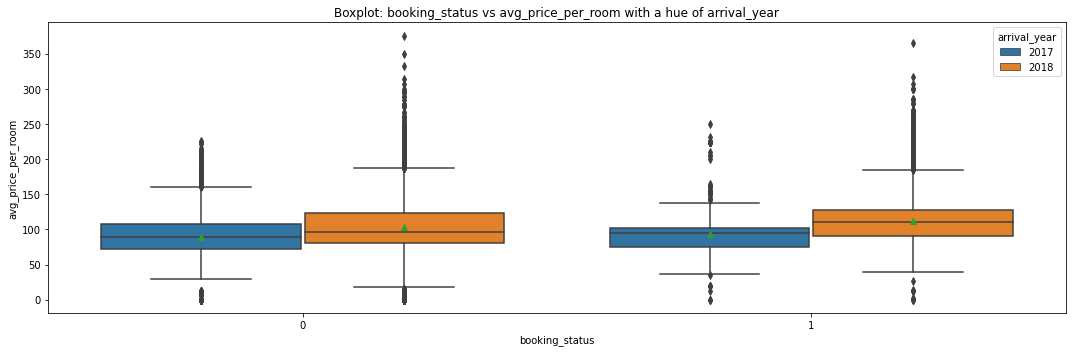

avg_price_per_room                              \
                                         count        mean        std  min   
booking_status arrival_year                                                  
0              2017                     5553.0   89.408088  33.021900  0.0   
               2018                    18837.0  103.033605  36.090001  0.0   
1              2017                      961.0   93.609386  31.709599  0.0   
               2018                    10924.0  112.050776  31.626853  0.0   

                                                          
                              25%     50%    75%     max  
booking_status arrival_year                               
0              2017          71.4   89.28  107.0  226.17  
               2018          80.0   96.30  123.0  375.50  
1              2017          75.0   94.50  101.5  250.00  
               2018          90.0  110.00  127.8  365.00

In [79]:
# Boxplot booking_status vs avg_price_per_room
sort_index = df.groupby('booking_status')[['avg_price_per_room']].median()\
                        .sort_values(by='avg_price_per_room').index
output_pretty_boxplot(df, x='booking_status', y='avg_price_per_room',\
                     figsize=(15,5), hue='arrival_year', order=sort_index);
describe_df = df.groupby(['booking_status', 'arrival_year'])[['avg_price_per_room']].describe()
describe_df

#### Observations
- The mean avg_price_per_room increased 15.24% from 2017 to 2018 for those that did not cancel bookings.
- The mean avg_price_per_room increased 19.74% from 2017 to 2018 for those that did cancel bookings.
- All avg_price_per_room have outliers with respect to booking status.


- Min avg_price_per_room value for 0 booking_status and 2017 arrival_year is 0.000 and max is 226.170
- Mean avg_price_per_room for 0 booking_status and 2017 arrival_year is 89.408 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 0 booking_status and 2018 arrival_year is 0.000 and max is 375.500
- Mean avg_price_per_room for 0 booking_status and 2018 arrival_year is 103.034 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 1 booking_status and 2017 arrival_year is 0.000 and max is 250.000
- Mean avg_price_per_room for 1 booking_status and 2017 arrival_year is 93.609 which is less than the median indicating the data is left skewed.


- Min avg_price_per_room value for 1 booking_status and 2018 arrival_year is 0.000 and max is 365.000
- Mean avg_price_per_room for 1 booking_status and 2018 arrival_year is 112.051 which is greater than the median indicating the data is right skewed.

#### Let's investigate arrival_year,arrival_month vs avg_price_per_room

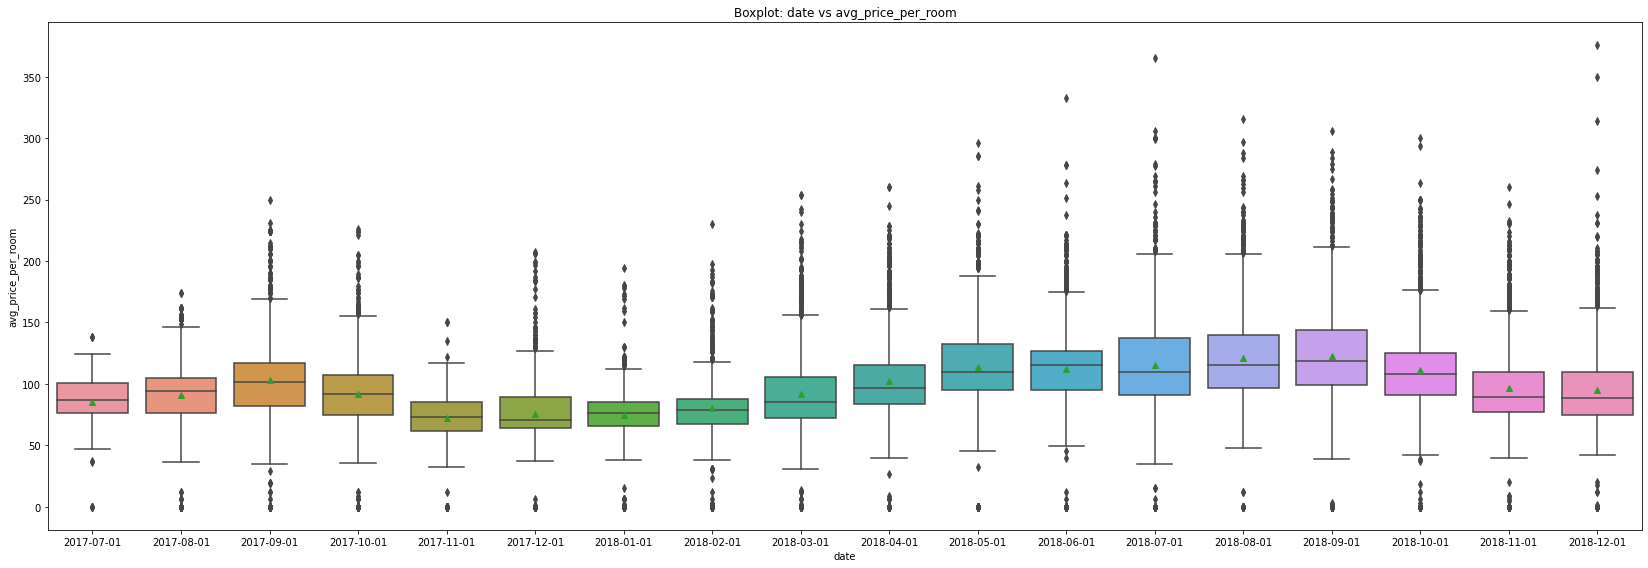

avg_price_per_room                                                \
                        count        mean        std  min      25%      50%   
date                                                                          
2017-07-01              363.0   84.890468  19.434629  0.0  76.5000   87.000   
2017-08-01             1014.0   91.091400  29.907908  0.0  76.5000   94.500   
2017-09-01             1649.0  103.335185  37.701940  0.0  82.0000  101.500   
2017-10-01             1913.0   92.032002  29.423164  0.0  74.8800   92.170   
2017-11-01              647.0   72.339104  21.374759  0.0  62.0000   73.000   
2017-12-01              928.0   75.430463  32.638604  0.0  63.7500   71.000   
2018-01-01             1014.0   74.749763  23.193340  0.0  66.0000   76.595   
2018-02-01             1704.0   80.733644  25.043275  0.0  67.5000   79.000   
2018-03-01             2358.0   91.730835  31.771635  0.0  72.6225   85.500   
2018-04-01             2736.0  101.998801  30.228500  0.0  84.0000   96.300   
2018-05-01             2598.0  113.810677  33.555298  0.0  95.0000  110.000   
2018-06-01             3203.0  111.966500  28.501857  0.0  95.0000  115.000   
2018-07-01             2557.0  115.448092  35.922148  0.0  91.1300  110.000   
2018-08-01             2799.0  121.214759  36.066476  0.0  96.3000  115.000   
2018-09-01             2962.0  122.905831  36.127119  0.0  99.0000  119.000   
2018-10-01             3404.0  111.445723  31.298896  0.0  90.9000  108.000   
2018-11-01             2333.0   96.539721  31.745368  0.0  77.0000   89.000   
2018-12-01             2093.0   94.947482  33.584645  0.0  74.8000   88.400   

                              
                 75%     max  
date                          
2017-07-01  100.7500  138.50  
2017-08-01  105.1875  174.00  
2017-09-01  117.0400  250.00  
2017-10-01  107.5300  226.17  
2017-11-01   85.0000  150.45  
2017-12-01   89.2500  207.00  
2018-01-01   85.3750  194.67  
2018-02-01   88.0000  230.00  
2018-03-01  105.9500  254.00  
2018-04-01  115.0000  260.50  
2018-05-01  132.6000  296.00  
2018-06-01  126.9000  332.57  
2018-07-01  137.7000  365.00  
2018-08-01  140.0000  316.00  
2018-09-01  144.1050  306.00  
2018-10-01  125.1000  300.00  
2018-11-01  110.0000  260.00  
2018-12-01  109.8000  375.50

In [80]:
# Boxplot arrival_month vs avg_price_per_room
x = 'avg_price_per_room'
df_with_date = df.copy()
df_with_date['day'] = 1
cols=["arrival_year","arrival_month","day"]
df_with_date['mdy_str'] = df_with_date[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_with_date['date'] = pd.to_datetime(df_with_date['mdy_str']).dt.date
output_pretty_boxplot(df_with_date.sort_values('date'), x='date', y='avg_price_per_room',\
                     figsize=(23,8));
describe_df = df_with_date.groupby(['date'])[['avg_price_per_room']].describe()
describe_df

#### Observations
- From October to December in both 2017 and 2018 we see a decline in pricing.
- The highest median price per year occurs in September.
- From January 2018 through the end of the year we see a stedy increase in pricing.


- Overall we see a steady growth in median and mean over time however in both years for months 10-12 we see a decline from month 9 indicating this time of year is slower.
- The highest monthly mean avg_price_per_room 122.90 occurred in 2018-09-01. From 2017 to 2018 for month 9 the prices increased 18.93%.
- The lowest monthly mean avg_price_per_room 72.33 occurred in 2017-11-01. From 2017 to 2018 for month 11 the prices increased 33.45%.
- All months have outliers with respect to avg_price_per_room.

#### Let's investigate room_type_reserved vs no_of_special_requests

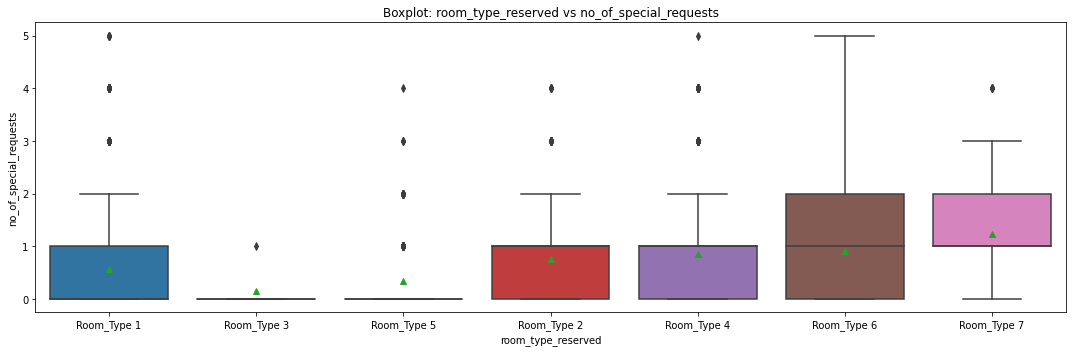

no_of_special_requests                                     \
                                    count      mean       std  min  25%  50%   
room_type_reserved                                                             
Room_Type 1                       28130.0  0.557803  0.749667  0.0  0.0  0.0   
Room_Type 2                         692.0  0.761561  0.824426  0.0  0.0  1.0   
Room_Type 3                           7.0  0.142857  0.377964  0.0  0.0  0.0   
Room_Type 4                        6057.0  0.842331  0.859175  0.0  0.0  1.0   
Room_Type 5                         265.0  0.335849  0.682879  0.0  0.0  0.0   
Room_Type 6                         966.0  0.904762  0.921386  0.0  0.0  1.0   
Room_Type 7                         158.0  1.227848  0.976793  0.0  1.0  1.0   

                              
                    75%  max  
room_type_reserved            
Room_Type 1         1.0  5.0  
Room_Type 2         1.0  4.0  
Room_Type 3         0.0  1.0  
Room_Type 4         1.0  5.0  
Room_Type 5         0.0  4.0  
Room_Type 6         2.0  5.0  
Room_Type 7         2.0  4.0

In [81]:
# Boxplot room_type_reserved vs no_of_special_requests
sort_index = df.groupby('room_type_reserved')[['no_of_special_requests']].median()\
                        .sort_values(by='no_of_special_requests').index
output_pretty_boxplot(df, x='room_type_reserved', y='no_of_special_requests',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['room_type_reserved'])[['no_of_special_requests']].describe()
describe_df

#### Observations
- Roomy_Type 7 had the highest mean no_of_special_requests of 1.22 while Room_Type 3 had the lowest with .142.

- Min no_of_special_requests value for Room_Type 1 room_type_reserved is 0.000 and max is 5.000
- Mean no_of_special_requests for Room_Type 1 room_type_reserved is 0.558 which is greater than the median indicating the data is right skewed.
- All room types have outliers with respect to no_of_special_requests except for Room_Type 6.


- Min no_of_special_requests value for Room_Type 2 room_type_reserved is 0.000 and max is 4.000
- Mean no_of_special_requests for Room_Type 2 room_type_reserved is 0.762 which is less than the median indicating the data is left skewed.


- Min no_of_special_requests value for Room_Type 3 room_type_reserved is 0.000 and max is 1.000
- Mean no_of_special_requests for Room_Type 3 room_type_reserved is 0.143 which is greater than the median indicating the data is right skewed.


- Min no_of_special_requests value for Room_Type 4 room_type_reserved is 0.000 and max is 5.000
- Mean no_of_special_requests for Room_Type 4 room_type_reserved is 0.842 which is less than the median indicating the data is left skewed.


- Min no_of_special_requests value for Room_Type 5 room_type_reserved is 0.000 and max is 4.000
- Mean no_of_special_requests for Room_Type 5 room_type_reserved is 0.336 which is greater than the median indicating the data is right skewed.


- Min no_of_special_requests value for Room_Type 6 room_type_reserved is 0.000 and max is 5.000
- Mean no_of_special_requests for Room_Type 6 room_type_reserved is 0.905 which is less than the median indicating the data is left skewed.


- Min no_of_special_requests value for Room_Type 7 room_type_reserved is 0.000 and max is 4.000
- Mean no_of_special_requests for Room_Type 7 room_type_reserved is 1.228 which is greater than the median indicating the data is right skewed.


#### Let's investigate market_segment_type vs no_of_special_requests

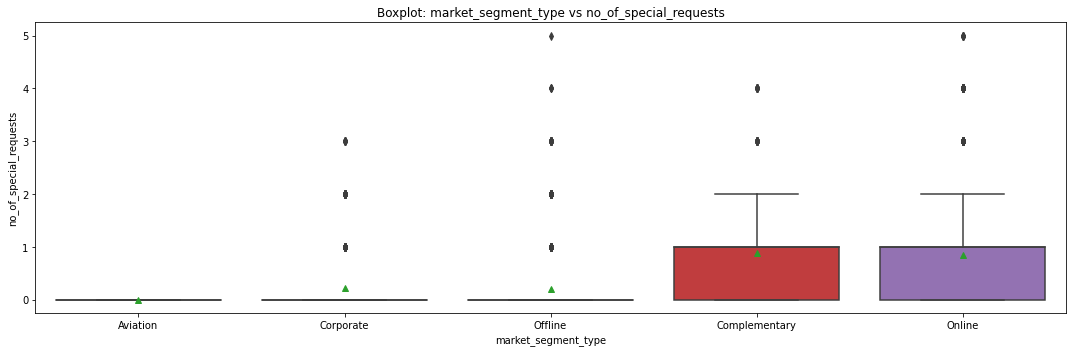

no_of_special_requests                                     \
                                     count      mean       std  min  25%  50%   
market_segment_type                                                             
Aviation                             125.0  0.000000  0.000000  0.0  0.0  0.0   
Complementary                        391.0  0.882353  0.995616  0.0  0.0  1.0   
Corporate                           2017.0  0.222112  0.473763  0.0  0.0  0.0   
Offline                            10528.0  0.202603  0.459518  0.0  0.0  0.0   
Online                             23214.0  0.842250  0.829867  0.0  0.0  1.0   

                               
                     75%  max  
market_segment_type            
Aviation             0.0  0.0  
Complementary        1.0  4.0  
Corporate            0.0  3.0  
Offline              0.0  5.0  
Online               1.0  5.0

In [82]:
# Boxplot market_segment_type vs no_of_special_requests
sort_index = df.groupby('market_segment_type')[['no_of_special_requests']].median()\
                        .sort_values(by='no_of_special_requests').index
output_pretty_boxplot(df, x='market_segment_type', y='no_of_special_requests',\
                     figsize=(15,5), order=sort_index);
describe_df = df.groupby(['market_segment_type'])[['no_of_special_requests']].describe()
describe_df

#### Observations
- Online has the highest mean number of special requests for .842 and Aviation had the lowest with 0.
- All segments have outliers with respect to no_of_special_requests except for Aviation.


- Min no_of_special_requests value for Aviation market_segment_type is 0.000 and max is 0.000
- Mean no_of_special_requests for Aviation market_segment_type is 0.000 which is the same as the median indicating the data is not skewed.


- Min no_of_special_requests value for Complementary market_segment_type is 0.000 and max is 4.000
- Mean no_of_special_requests for Complementary market_segment_type is 0.882 which is less than the median indicating the data is left skewed.


- Min no_of_special_requests value for Corporate market_segment_type is 0.000 and max is 3.000
- Mean no_of_special_requests for Corporate market_segment_type is 0.222 which is greater than the median indicating the data is right skewed.


- Min no_of_special_requests value for Offline market_segment_type is 0.000 and max is 5.000
- Mean no_of_special_requests for Offline market_segment_type is 0.203 which is greater than the median indicating the data is right skewed.


- Min no_of_special_requests value for Online market_segment_type is 0.000 and max is 5.000
- Mean no_of_special_requests for Online market_segment_type is 0.842 which is less than the median indicating the data is left skewed.


#### Let's investigate booking_status vs no_of_special_requests

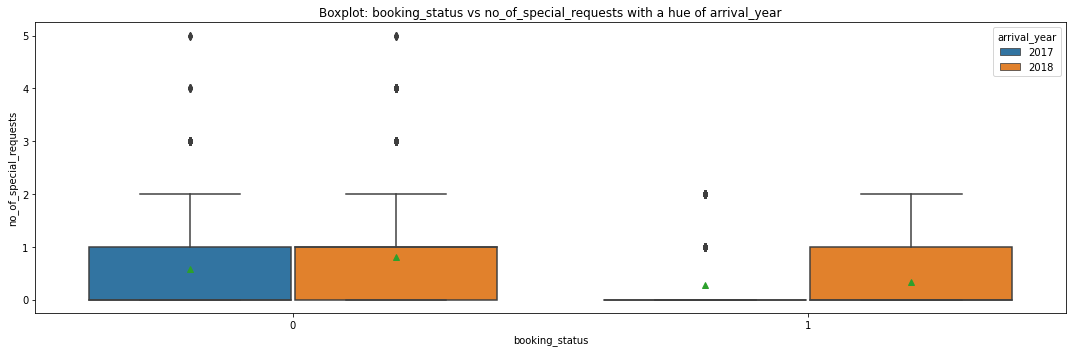

no_of_special_requests                           \
                                             count      mean       std  min   
booking_status arrival_year                                                   
0              2017                         5553.0  0.572483  0.821965  0.0   
               2018                        18837.0  0.813399  0.832905  0.0   
1              2017                          961.0  0.286160  0.546109  0.0   
               2018                        10924.0  0.338887  0.576592  0.0   

                                                 
                             25%  50%  75%  max  
booking_status arrival_year                      
0              2017          0.0  0.0  1.0  5.0  
               2018          0.0  1.0  1.0  5.0  
1              2017          0.0  0.0  0.0  2.0  
               2018          0.0  0.0  1.0  2.0

In [83]:
# Boxplot booking_status vs no_of_special_requests
output_pretty_boxplot(df, x='booking_status', y='no_of_special_requests',\
                     figsize=(15,5), hue='arrival_year');
describe_df = df.groupby(['booking_status', 'arrival_year'])[['no_of_special_requests']].describe()
describe_df

#### Observations
- From 2017 to 2018 the mean no_of_special_requests for guests who did not cancel increased by 42.13%.
- From 2017 to 2018 the mean no_of_special_requests for guests who did cancel increased by 18.18%.
- All booking statues have outliers with respect to no_of_special_request except for booking_status of 1 for 2018.


- Min no_of_special_requests value for 0 booking_status and 2017 arrival_year is 0.000 and max is 5.000
- Mean no_of_special_requests for 0 booking_status and 2017 arrival_year is 0.572 which is greater than the median indicating the data is right skewed.


- Min no_of_special_requests value for 0 booking_status and 2018 arrival_year is 0.000 and max is 5.000
- Mean no_of_special_requests for 0 booking_status and 2018 arrival_year is 0.813 which is less than the median indicating the data is left skewed.


- Min no_of_special_requests value for 1 booking_status and 2017 arrival_year is 0.000 and max is 2.000
- Mean no_of_special_requests for 1 booking_status and 2017 arrival_year is 0.286 which is greater than the median indicating the data is right skewed.


- Min no_of_special_requests value for 1 booking_status and 2018 arrival_year is 0.000 and max is 2.000
- Mean no_of_special_requests for 1 booking_status and 2018 arrival_year is 0.339 which is greater than the median indicating the data is right skewed.

#### Let's investigate no_of_special_requests vs avg_price_per_room

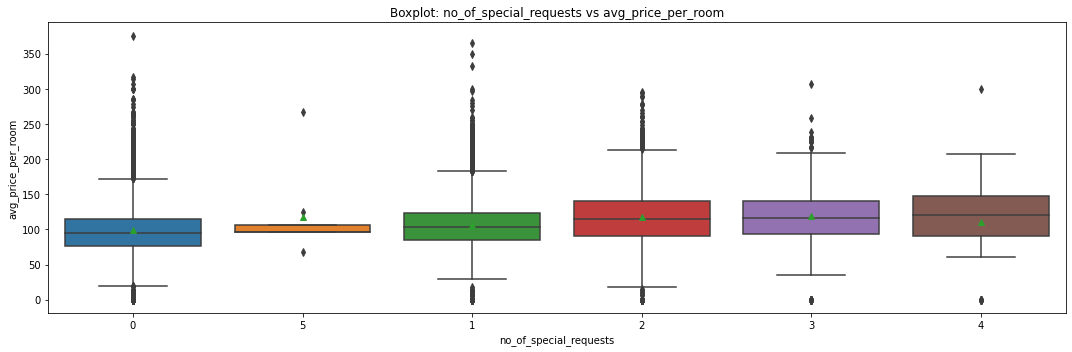

avg_price_per_room                                \
                                    count        mean        std    min   
no_of_special_requests                                                    
0                                 19777.0   98.422477  32.844997   0.00   
1                                 11373.0  105.533952  34.402686   0.00   
2                                  4364.0  118.058765  39.049019   0.00   
3                                   675.0  118.296993  40.460311   0.00   
4                                    78.0  110.071026  58.905819   0.00   
5                                     8.0  118.125000  61.909637  68.07   

                                                          
                            25%    50%       75%     max  
no_of_special_requests                                    
0                       76.6700   95.0  115.0000  375.50  
1                       84.3300  103.0  123.8000  365.00  
2                       90.4175  114.4  140.0625  296.00  
3                       93.8000  116.1  140.0000  306.00  
4                       90.3750  120.0  147.7375  300.00  
5                       96.3000   96.6  106.0100  266.67

In [84]:
# output boxplot no_of_special_requests vs avg_price_per_room
sort_index = df.groupby('no_of_special_requests')[['avg_price_per_room']].median()\
                        .sort_values(by='avg_price_per_room').index
output_pretty_boxplot(df, x='no_of_special_requests', y='avg_price_per_room', \
                      order=sort_index, figsize=(15,5))
describe_df = df.groupby(['no_of_special_requests'])[['avg_price_per_room']].describe()
describe_df

#### Observations
- The number_of_requests of 3 was associated with the highest avg_price_per_room of 118.29 while 0 special requests had 98.44. 
- All no_of_special_requests have outliers with respect to avg_price_per_room.


- Min avg_price_per_room value for 0 no_of_special_requests is 0.000 and max is 375.500
- Mean avg_price_per_room for 0 no_of_special_requests is 98.422 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 1 no_of_special_requests is 0.000 and max is 365.000
- Mean avg_price_per_room for 1 no_of_special_requests is 105.534 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 2 no_of_special_requests is 0.000 and max is 296.000
- Mean avg_price_per_room for 2 no_of_special_requests is 118.059 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 3 no_of_special_requests is 0.000 and max is 306.000
- Mean avg_price_per_room for 3 no_of_special_requests is 118.297 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 4 no_of_special_requests is 0.000 and max is 300.000
- Mean avg_price_per_room for 4 no_of_special_requests is 110.071 which is less than the median indicating the data is left skewed.


- Min avg_price_per_room value for 5 no_of_special_requests is 68.070 and max is 266.670
- Mean avg_price_per_room for 5 no_of_special_requests is 118.125 which is greater than the median indicating the data is right skewed.

#### Let's investigate no_of_children vs  avg_price_per_room

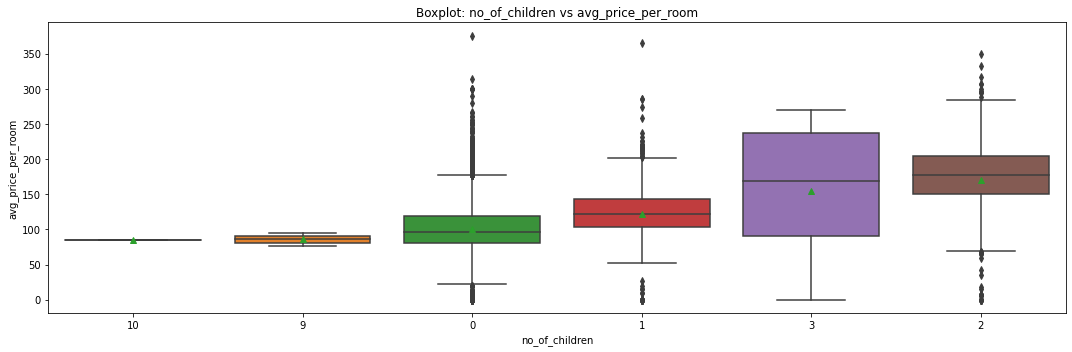

avg_price_per_room                                         \
                            count        mean        std    min      25%   
no_of_children                                                             
0                         33577.0  100.388447  31.655568   0.00   80.000   
1                          1618.0  122.325748  35.782949   0.00  103.515   
2                          1058.0  169.630652  53.498266   0.00  150.300   
3                            19.0  154.594737  94.563433   0.00   90.625   
9                             2.0   85.750000  13.081475  76.50   81.125   
10                            1.0   84.450000        NaN  84.45   84.450   

                                          
                   50%       75%     max  
no_of_children                            
0                96.90  118.8000  375.50  
1               121.50  143.1000  365.00  
2               177.30  204.9375  349.63  
3               168.30  237.3350  269.30  
9                85.75   90.3750   95.00  
10               84.45   84.4500   84.45

In [85]:
# output boxplot 'no_of_children' vs  'avg_price_per_room'
sort_index = df.groupby('no_of_children')[['avg_price_per_room']].median().sort_values(by='avg_price_per_room').index
output_pretty_boxplot(df, x='no_of_children', y='avg_price_per_room', \
                      order=sort_index, figsize=(15,5))
describe_df = df.groupby(['no_of_children'])[['avg_price_per_room']].describe()
describe_df

#### Observations
- The no_of_children of 3 had the highest mean avg_price_per_room of 154.59 while a no_of_children of 10 had a avg_price_per_room of 84.45.
- All no_of_children had outliers with respect to avg_price_per_person except for no_of_children equal to 3, 9, 10.


- Min avg_price_per_room value for 0 no_of_children is 0.000 and max is 375.500
- Mean avg_price_per_room for 0 no_of_children is 100.388 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 1 no_of_children is 0.000 and max is 365.000
- Mean avg_price_per_room for 1 no_of_children is 122.326 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 2 no_of_children is 0.000 and max is 349.630
- Mean avg_price_per_room for 2 no_of_children is 169.631 which is less than the median indicating the data is left skewed.


- Min avg_price_per_room value for 3 no_of_children is 0.000 and max is 269.300
- Mean avg_price_per_room for 3 no_of_children is 154.595 which is less than the median indicating the data is left skewed.


- Min avg_price_per_room value for 9 no_of_children is 76.500 and max is 95.000
- Mean avg_price_per_room for 9 no_of_children is 85.750 which is the same as the median indicating the data is not skewed.


- Min avg_price_per_room value for 10 no_of_children is 84.450 and max is 84.450
- Mean avg_price_per_room for 10 no_of_children is 84.450 which is the same as the median indicating the data is not skewed.


#### Let's investigate  no_of_adults vs avg_price_per_room

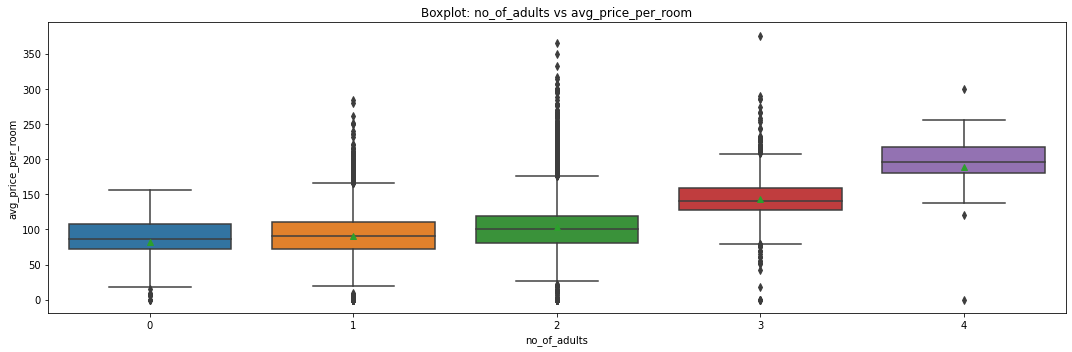

avg_price_per_room                                                \
                          count        mean        std  min      25%      50%   
no_of_adults                                                                    
0                         139.0   81.556259  35.595751  0.0   71.610   85.960   
1                        7695.0   90.960272  32.933551  0.0   72.785   90.000   
2                       26108.0  103.649783  33.258402  0.0   81.000   99.950   
3                        2317.0  142.837911  29.674240  0.0  127.000  140.700   
4                          16.0  188.052500  65.459974  0.0  180.105  195.255   

                             
                75%     max  
no_of_adults                 
0             108.0  155.68  
1             110.0  284.10  
2             119.0  365.00  
3             159.3  375.50  
4             217.0  299.33

In [86]:
# output boxplot 'no_of_adults' vs  'avg_price_per_room'
sort_index = df.groupby('no_of_adults')[['avg_price_per_room']].median().sort_values(by='avg_price_per_room').index
output_pretty_boxplot(df, x='no_of_adults', y='avg_price_per_room', \
                      order=sort_index, figsize=(15,5))
describe_df = df.groupby(['no_of_adults'])[['avg_price_per_room']].describe()
describe_df

#### Observations
- The no_of_adults of 4 had the highest mean avg_price_per_room of 188.05 while a no_of_adults of 0 had a avg_price_per_room of 84.45. It is likely that a room with 0 adults is a room that has only children.
- All no_of_adults had outliers with respect to avg_price_per_room except for no_of_adults equal to 0.

- Min avg_price_per_room value for 0 no_of_adults is 0.000 and max is 155.680
- Mean avg_price_per_room for 0 no_of_adults is 81.556 which is less than the median indicating the data is left skewed.


- Min avg_price_per_room value for 1 no_of_adults is 0.000 and max is 284.100
- Mean avg_price_per_room for 1 no_of_adults is 90.960 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 2 no_of_adults is 0.000 and max is 365.000
- Mean avg_price_per_room for 2 no_of_adults is 103.650 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 3 no_of_adults is 0.000 and max is 375.500
- Mean avg_price_per_room for 3 no_of_adults is 142.838 which is greater than the median indicating the data is right skewed.


- Min avg_price_per_room value for 4 no_of_adults is 0.000 and max is 299.330
- Mean avg_price_per_room for 4 no_of_adults is 188.053 which is less than the median indicating the data is left skewed.

#### Let's investigate no_of_previous_cancellations vs no_of_previous_bookings_not_canceled

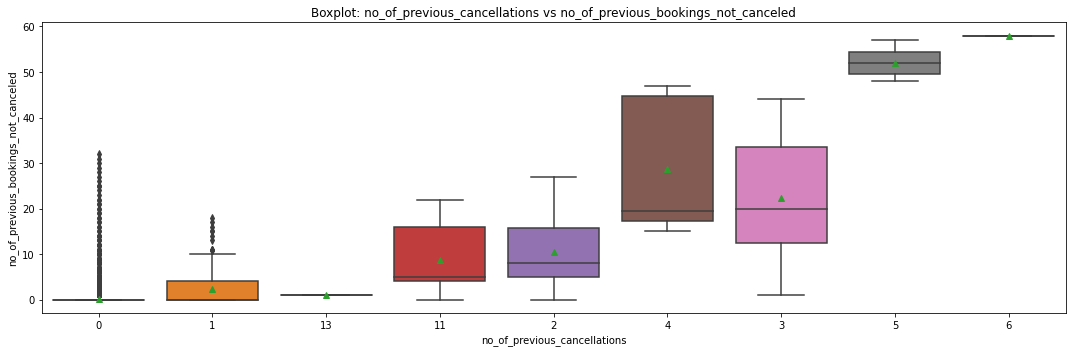

no_of_previous_bookings_not_canceled             \
                                                            count       mean   
no_of_previous_cancellations                                                   
0                                                         35937.0   0.069733   
1                                                           198.0   2.454545   
2                                                            46.0  10.391304   
3                                                            43.0  22.255814   
4                                                            10.0  28.700000   
5                                                            11.0  52.090909   
6                                                             1.0  58.000000   
11                                                           25.0   8.640000   
13                                                            4.0   1.000000   

                                                                         
                                    std   min    25%   50%    75%   max  
no_of_previous_cancellations                                             
0                              0.843682   0.0   0.00   0.0   0.00  32.0  
1                              3.873043   0.0   0.00   0.0   4.00  18.0  
2                              7.631741   0.0   5.00   8.0  15.75  27.0  
3                             12.797122   1.0  12.50  20.0  33.50  44.0  
4                             14.545331  15.0  17.25  19.5  44.75  47.0  
5                              3.176619  48.0  49.50  52.0  54.50  57.0  
6                                   NaN  58.0  58.00  58.0  58.00  58.0  
11                             7.857481   0.0   4.00   5.0  16.00  22.0  
13                             0.000000   1.0   1.00   1.0   1.00   1.0

In [87]:
# output boxplot 'no_of_previous_cancellations' vs  'no_of_previous_bookings_not_canceled'
sort_index = df.groupby('no_of_previous_cancellations')[['no_of_previous_bookings_not_canceled']].median()\
                        .sort_values(by='no_of_previous_bookings_not_canceled').index
output_pretty_boxplot(df, x='no_of_previous_cancellations', y='no_of_previous_bookings_not_canceled', \
                      order=sort_index, figsize=(15,5))
describe_df = df.groupby(['no_of_previous_cancellations'])[['no_of_previous_bookings_not_canceled']].describe()
describe_df

#### Observations
- Min no_of_previous_bookings_not_canceled value for 0 no_of_previous_cancellations is 0.000 and max is 32.000
- Mean no_of_previous_bookings_not_canceled for 0 no_of_previous_cancellations is 0.070 which is greater than the median indicating the data is right skewed.
- There are outliers for no_of_previous_cancellations equal to 0,1 with respect to no_of_previous_bookings_not_canceled.


- Min no_of_previous_bookings_not_canceled value for 1 no_of_previous_cancellations is 0.000 and max is 18.000
- Mean no_of_previous_bookings_not_canceled for 1 no_of_previous_cancellations is 2.455 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for 2 no_of_previous_cancellations is 0.000 and max is 27.000
- Mean no_of_previous_bookings_not_canceled for 2 no_of_previous_cancellations is 10.391 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for 3 no_of_previous_cancellations is 1.000 and max is 44.000
- Mean no_of_previous_bookings_not_canceled for 3 no_of_previous_cancellations is 22.256 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for 4 no_of_previous_cancellations is 15.000 and max is 47.000
- Mean no_of_previous_bookings_not_canceled for 4 no_of_previous_cancellations is 28.700 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for 5 no_of_previous_cancellations is 48.000 and max is 57.000
- Mean no_of_previous_bookings_not_canceled for 5 no_of_previous_cancellations is 52.091 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for 6 no_of_previous_cancellations is 58.000 and max is 58.000
- Mean no_of_previous_bookings_not_canceled for 6 no_of_previous_cancellations is 58.000 which is the same as the median indicating the data is not skewed.


- Min no_of_previous_bookings_not_canceled value for 11 no_of_previous_cancellations is 0.000 and max is 22.000
- Mean no_of_previous_bookings_not_canceled for 11 no_of_previous_cancellations is 8.640 which is greater than the median indicating the data is right skewed.


- Min no_of_previous_bookings_not_canceled value for 13 no_of_previous_cancellations is 1.000 and max is 1.000
- Mean no_of_previous_bookings_not_canceled for 13 no_of_previous_cancellations is 1.000 which is the same as the median indicating the data is not skewed.

#### Let's investigate repeated_guest vs no_of_previous_bookings_not_canceled

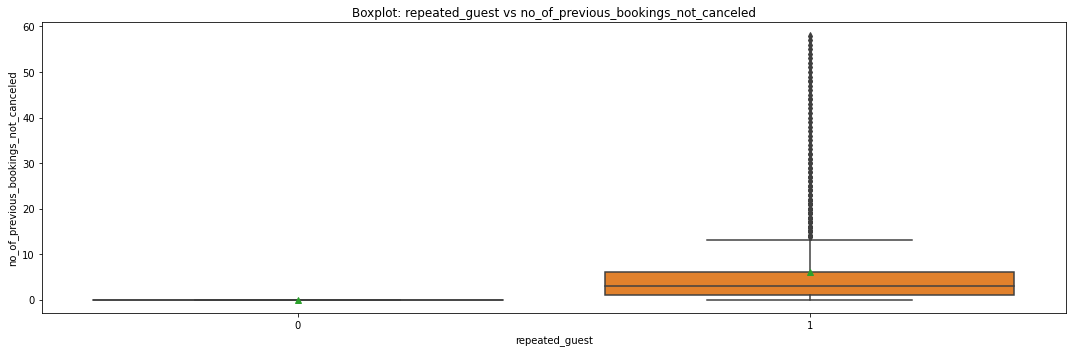

no_of_previous_bookings_not_canceled                           \
                                              count      mean       std  min   
repeated_guest                                                                 
0                                           35345.0  0.000000  0.000000  0.0   
1                                             930.0  5.983871  9.231665  0.0   

                                     
                25%  50%  75%   max  
repeated_guest                       
0               0.0  0.0  0.0   0.0  
1               1.0  3.0  6.0  58.0

In [88]:
# output boxplot 'repeated_guest' vs  'no_of_previous_bookings_not_canceled'
sort_index = df.groupby('repeated_guest')[['no_of_previous_bookings_not_canceled']].median()\
                        .sort_values(by='no_of_previous_bookings_not_canceled').index
output_pretty_boxplot(df, x='repeated_guest', y='no_of_previous_bookings_not_canceled', \
                      order=sort_index, figsize=(15,5))
describe_df = df.groupby(['repeated_guest'])[['no_of_previous_bookings_not_canceled']].describe()
describe_df

#### Observations
- Min no_of_previous_bookings_not_canceled value for 0 repeated_guest is 0.000 and max is 0.000
- Mean no_of_previous_bookings_not_canceled for 0 repeated_guest is 0.000 which is the same as the median indicating the data is not skewed.
- There were outliers for repeated_guest equal to 1 with respect to no_of_previous_bookings_canceled.

- Min no_of_previous_bookings_not_canceled value for 1 repeated_guest is 0.000 and max is 58.000
- Mean no_of_previous_bookings_not_canceled for 1 repeated_guest is 5.984 which is greater than the median indicating the data is right skewed.

#### Let's investigate repeated_guest  vs no_of_previous_cancellations

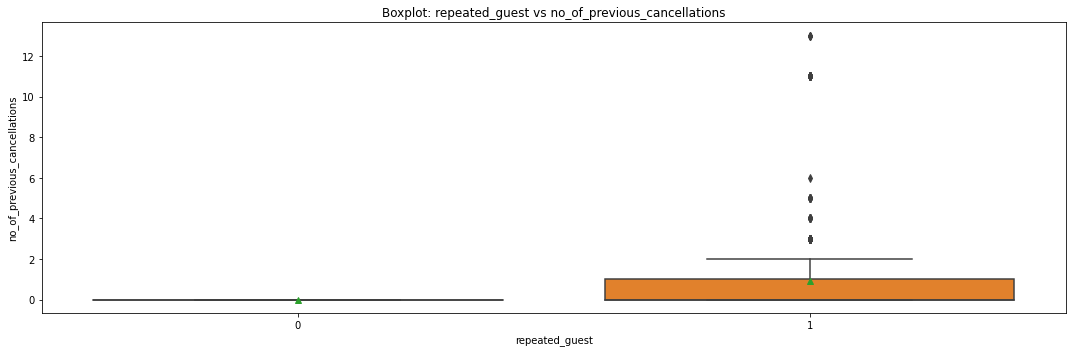

no_of_previous_cancellations                                \
                                      count      mean       std  min  25%   
repeated_guest                                                              
0                                   35345.0  0.000000  0.000000  0.0  0.0   
1                                     930.0  0.910753  2.118551  0.0  0.0   

                                
                50%  75%   max  
repeated_guest                  
0               0.0  0.0   0.0  
1               0.0  1.0  13.0

In [89]:
# output boxplot repeated_guest vs no_of_previous_cancellations
sort_index = df.groupby('repeated_guest')[['no_of_previous_cancellations']].median()\
                        .sort_values(by='no_of_previous_cancellations').index
output_pretty_boxplot(df, x='repeated_guest', y='no_of_previous_cancellations', \
                      order=sort_index, figsize=(15,5))
describe_df = df.groupby(['repeated_guest'])[['no_of_previous_cancellations']].describe()
describe_df

#### Observations
- Min no_of_previous_cancellations value for 0 repeated_guest is 0.000 and max is 0.000
- Mean no_of_previous_cancellations for 0 repeated_guest is 0.000 which is the same as the median indicating the data is not skewed.
- There were outliers for repeated_guest equal to 1 with respect to no_of_previous_cancellations.



- Min no_of_previous_cancellations value for 1 repeated_guest is 0.000 and max is 13.000
- Mean no_of_previous_cancellations for 1 repeated_guest is 0.911 which is greater than the median indicating the data is right skewed.

#### Let's investigate repeated_guest vs arrival_year

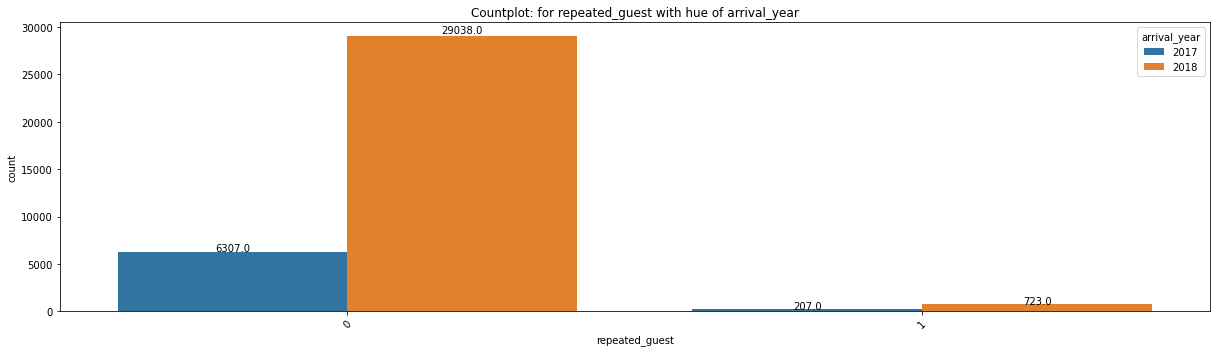

In [90]:
# Countplot for repeated_guests with a hue of arrival_year
output_pretty_countplot(df, 'repeated_guest', hue='arrival_year',\
                        figsize=(17,5))

#### Observations
- In 2017 3.28% of the guest were repeat guests.
- In 2018 2.4% of the guests were repeat guests.

#### Let's investigate avg_price_per_room binned, arrival_year vs booking_status

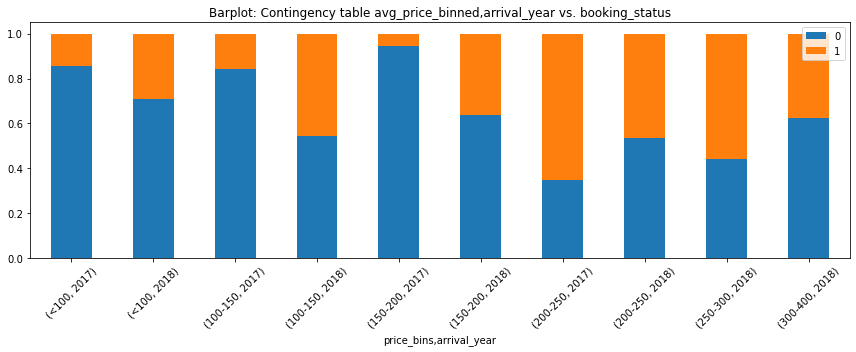

booking_status                  0         1
price_bins arrival_year                    
<100       2017          0.856979  0.143021
           2018          0.708998  0.291002
100-150    2017          0.842637  0.157363
           2018          0.546017  0.453983
150-200    2017          0.945378  0.054622
           2018          0.636912  0.363088
200-250    2017          0.347826  0.652174
           2018          0.537084  0.462916
250-300    2018          0.440000  0.560000
300-400    2018          0.625000  0.375000

In [91]:
price_bin_df = df.copy()
bins = [0, 100, 150, 200, 250, 300, 400, 500]
labels = ['<100', '100-150', '150-200', '200-250', '250-300', '300-400', '400-500']
price_bin_df['price_bins'] = pd.cut(x = df['avg_price_per_room'], labels=labels, bins = bins, include_lowest = True)
price_bin_df
output_pretty_crosstab_plot('Barplot: Contingency table avg_price_binned,arrival_year vs. booking_status', \
                            [price_bin_df['price_bins'],price_bin_df['arrival_year']], price_bin_df['booking_status'])

#### Observations
- There were no bookings in 2017 over 250 per room.
- Of all the price bins in 2017 the bin with the highest cancellation rate was 200-250 price bin with 65.2% of the guests canceling.
- Of all the price bins in 2017 the bin with the lowest cancellation rate was 150-250 price bin with 5.4% of the guests canceling.


- Of all the price bins in 2018 the bin with the highest cancellation rate was 200-250 price bin with 46.2% of the guests canceling.
- Of all the price bins in 2018 the bin with the lowest cancellation rate was <100 price bin with 29.1% of the guests canceling.

#### Let's investigate lead_time binned, arrival_year vs booking_status

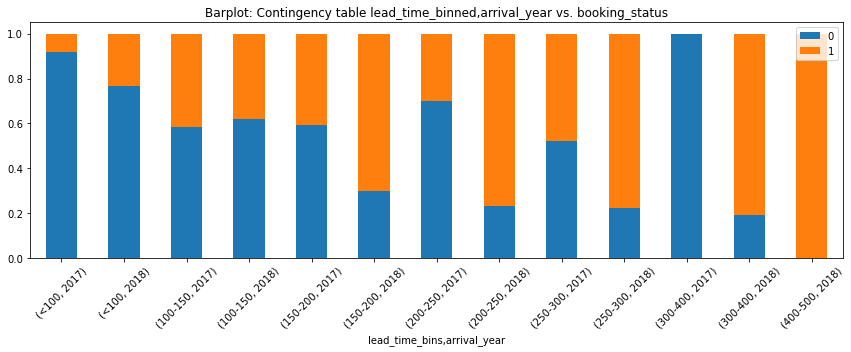

booking_status                      0         1
lead_time_bins arrival_year                    
<100           2017          0.918683  0.081317
               2018          0.766701  0.233299
100-150        2017          0.586053  0.413947
               2018          0.622109  0.377891
150-200        2017          0.591549  0.408451
               2018          0.298435  0.701565
200-250        2017          0.697917  0.302083
               2018          0.233503  0.766497
250-300        2017          0.521739  0.478261
               2018          0.223652  0.776348
300-400        2017          1.000000  0.000000
               2018          0.193644  0.806356
400-500        2018          0.000000  1.000000

In [92]:
lead_time_bin_df = df.copy()
bins = [0, 100, 150, 200, 250, 300, 400, 500]
labels = ['<100', '100-150', '150-200', '200-250', '250-300', '300-400', '400-500']
lead_time_bin_df['lead_time_bins'] = pd.cut(x = df['lead_time'], labels=labels, bins = bins, include_lowest = True)
lead_time_bin_df
output_pretty_crosstab_plot('Barplot: Contingency table lead_time_binned,arrival_year vs. booking_status', \
                            [lead_time_bin_df['lead_time_bins'],lead_time_bin_df['arrival_year']], \
                            lead_time_bin_df['booking_status'])

#### Observations
- Of all the lead_time bins in 2017 the bin with the highest cancellation rate was 250-300 lead_time bin with 47.8% of the guests canceling.
- Of all the lead_time bins in 2017 the bin with the lowest cancellation rate was 300-400 lead_time bin with 0% of the guests canceling.


- Of all the lead_time bins in 2018 the bin with the highest cancellation rate was 400-500 lead_time bin with 100% of the guests canceling.
- Of all the lead_time bins in 2018 the bin with the lowest cancellation rate was <100 lead_time bin with 23.3% of the guests canceling.

#### Let's investigate families, arrival_year vs. total_nights

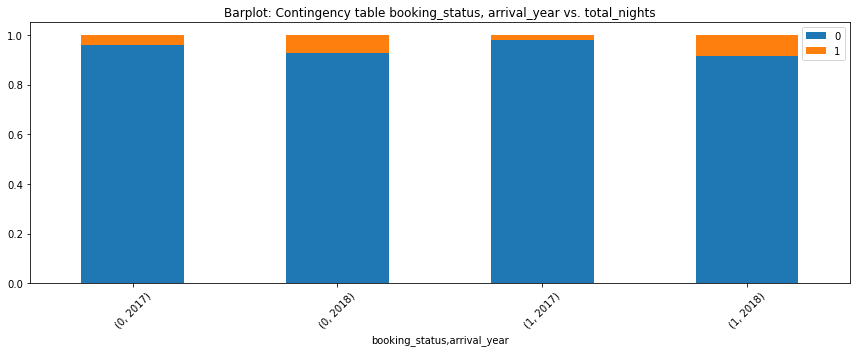

family                              0         1
booking_status arrival_year                    
0              2017          0.957140  0.042860
               2018          0.927695  0.072305
1              2017          0.980229  0.019771
               2018          0.913951  0.086049

In [93]:
# Contingency table families, arrival_year vs. total_nights
families_df = df.copy()
families_df['family'] = np.where((df['no_of_adults'] >= 1) & (df['no_of_children'] >= 1), 1, 0)
output_pretty_crosstab_plot('Barplot: Contingency table booking_status, arrival_year vs. total_nights', \
                            [families_df['booking_status'],families_df['arrival_year']], families_df['family'])

In [94]:
families_df.groupby('arrival_year')['family'].value_counts(normalize=True)

arrival_year  family
2017          0         0.960547
              1         0.039453
2018          0         0.922650
              1         0.077350
Name: family, dtype: float64

#### Observations
- Family bookings that were canceled grew 352.63% YOY from 2017 to 2018.
- Family bookings grew 97.43% YOY from 2017 to 2018.

- In 2017 1.9% of the canceled bookings were from family bookings.
- In 2017 8.6% of the canceled bookings were from family bookings.

- In 2017 3.9% of the bookings were for families.
- In 2018 7.7% of the bookings were for families.

#### Let's investigate booking_status, arrival_year vs. total_nights

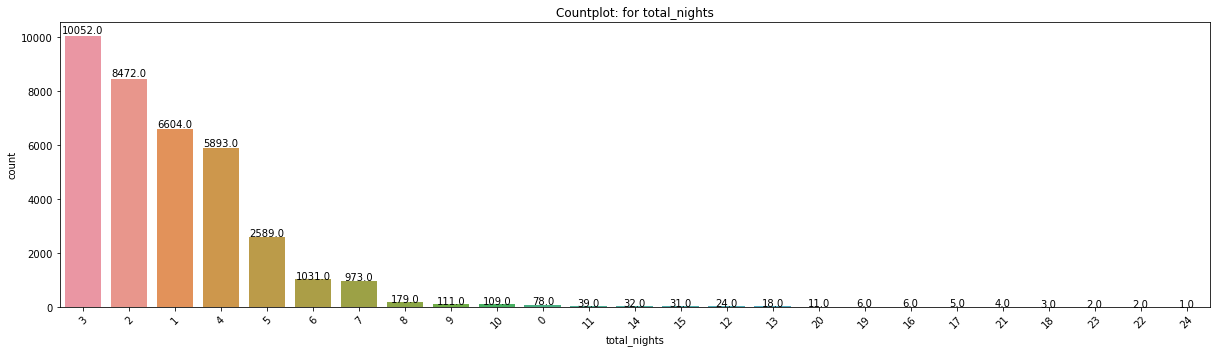

3    0.277105
2    0.233549
1    0.182054
4    0.162453
5    0.071371
Name: total_nights, dtype: float64

In [95]:
nights_df = df.copy()
nights_df['total_nights'] = nights_df['no_of_weekend_nights'] + nights_df['no_of_week_nights']

# Countplot for total_nights
output_pretty_countplot(nights_df, 'total_nights', \
                        order=nights_df['total_nights'].value_counts().index,\
                        figsize=(17,5))
nights_df['total_nights'].value_counts(normalize=True).head()

#### Observations
- 69.2% of the overall bookings are for 1-3 nights.

## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

### Logistic Regression (with statsmodels library)

#### Data Preparation for modeling (Logistic Regression)

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [96]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [97]:
x_train.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
13662    1.0             1               0                     0   
26641    1.0             2               0                     0   
17835    1.0             2               0                     2   
21485    1.0             2               0                     0   
5670     1.0             2               0                     1   

       no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
13662                  1                           0        163          2018   
26641                  3                           0        113          2018   
17835                  3                           0        359          2018   
21485                  3                           0        136          2018   
5670                   2                           0         21          2018   

       arrival_month  arrival_date  repeated_guest  \
13662             10            15               0   
26641              3            31               0   
17835             10            14               0   
21485              6            29               0   
5670               8            15               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
13662                             0                                     0   
26641                             0                                     0   
17835                             0                                     0   
21485                             0                                     0   
5670                              0                                     0   

       avg_price_per_room  no_of_special_requests  \
13662              115.00                       0   
26641               78.15                       1   
17835               78.00                       1   
21485               85.50                       0   
5670               151.00                       0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
13662                              0                              0   
26641                              0                              0   
17835                              0                              0   
21485                              0                              0   
5670                               0                              0   

       type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
13662                               0                               0   
26641                               0                               1   
17835                               0                               0   
21485                               1                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
13662                               0                               0   
26641                               0                               0   
17835                               0                               0   
21485                               0                               0   
5670                                0                               0   

       room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
13662                               0                                  0   
26641                               0                                  0   
17835                           

In [98]:
y_train.head()

13662    1
26641    0
17835    0
21485    1
5670     1
Name: booking_status, dtype: int64

In [99]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


**Observations**
- The dependent variable booking_status is imbalanced in both the training and test set with ~67% not canceling bookings and ~32% canceling bookings.

## EDA

- It is a good idea to explore the data once again after manipulating it.

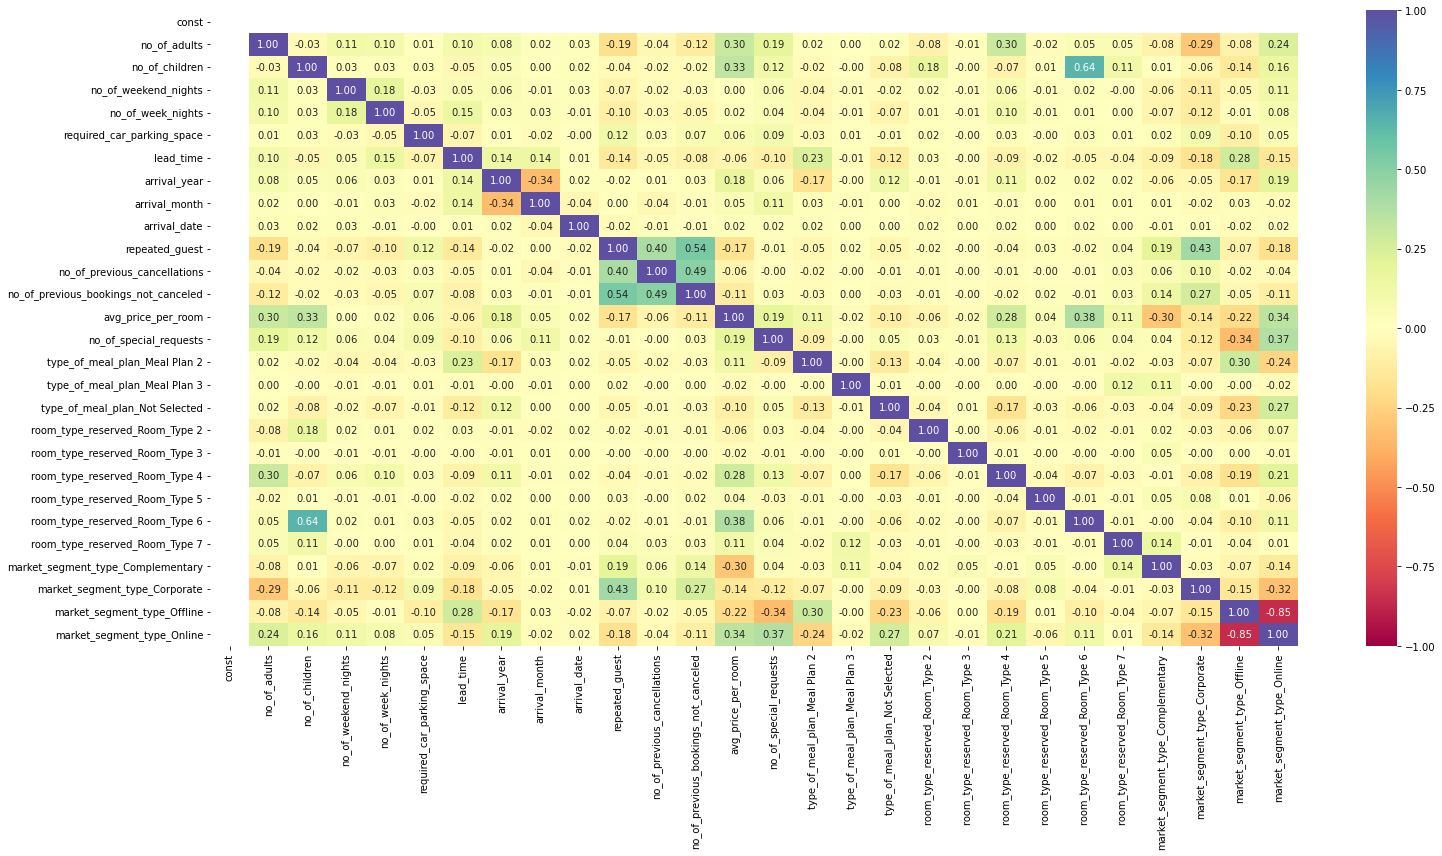

In [100]:
plt.figure(figsize=(22, 12))
sns.heatmap(
    x_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- market_segment_type_Offline and market_segment_Online have a very high negative correlation of -.85.
- room_type_reserved_Room_Type_6 has a high positive correlation with number of children of .64.
- repeated_guest and number_of_previous_bookings_not_canceled have a positive correlation of .54.
- number_of_previous_cancellations and number_of_previous_bookings_not_canceled have a positive correlation of .49.

## Model Building - Logistic Regression

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [101]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Wed, 25 Jan 2023   Pseudo R-squ.:                  0.3292
Time:                        14:38:47   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928    -687.338
no_of_adults                             0.1136      

**Observations**

- 

In [102]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.805963  0.634103   0.739609  0.682804

## Checking Multicollinearity
There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [103]:
### Check the variance inflation factors and output summary
vif_df = checking_vif(x_train)
vif_df.sort_values(by='VIF', ascending=False)

feature           VIF
0                                  const  3.949119e+07
27            market_segment_type_Online  7.117686e+01
26           market_segment_type_Offline  6.411425e+01
25         market_segment_type_Corporate  1.692846e+01
24     market_segment_type_Complementary  4.502286e+00
13                    avg_price_per_room  2.064208e+00
2                         no_of_children  1.978622e+00
22        room_type_reserved_Room_Type 6  1.974902e+00
10                        repeated_guest  1.783612e+00
12  no_of_previous_bookings_not_canceled  1.651996e+00
7                           arrival_year  1.431668e+00
11          no_of_previous_cancellations  1.395688e+00
6                              lead_time  1.395178e+00
20        room_type_reserved_Room_Type 4  1.362614e+00
1                           no_of_adults  1.348486e+00
8                          arrival_month  1.276373e+00
15         type_of_meal_plan_Meal Plan 2  1.273250e+00
17        type_of_meal_plan_Not Selected  1.272519e+00
14                no_of_special_requests  1.247302e+00
23        room_type_reserved_Room_Type 7  1.115594e+00
18        room_type_reserved_Room_Type 2  1.101505e+00
4                      no_of_week_nights  1.095670e+00
3                   no_of_weekend_nights  1.069487e+00
5             required_car_parking_space  1.039977e+00
21        room_type_reserved_Room_Type 5  1.027970e+00
16         type_of_meal_plan_Meal Plan 3  1.025217e+00
9                           arrival_date  1.006735e+00
19        room_type_reserved_Room_Type 3  1.003303e+00

#### Observations
- market_segment_type_Online, market_segment_type_Offline and market_segment_type_Corporate all have high multicollinearity.

In [104]:
treated_vif = treating_multicollinearity(x_train, y_train, ['market_segment_type_Online', 'market_segment_type_Offline',\
                                        'market_segment_type_Corporate'])

treated_vif

col  Accuracy    Recall  Precision        F1
0     market_segment_type_Online  0.805766  0.633863   0.739227  0.682503
1    market_segment_type_Offline  0.806317  0.635059   0.740003  0.683526
2  market_segment_type_Corporate  0.805687  0.633146   0.739422  0.682170

#### Observations
- None of the features removal would be impactful to the F1 score. Lets try removing market_segment_type_Offline.

### Removing Multicollinearity

In [105]:
x_train2 = x_train.drop("market_segment_type_Offline", axis=1)
x_test2 = x_test.drop("market_segment_type_Offline", axis=1)

# Check the variance inflation factors and output summary
vif_df = checking_vif(x_train2)
vif_df.sort_values(by='VIF', ascending=False)

feature           VIF
0                                  const  3.938026e+07
13                    avg_price_per_room  2.063844e+00
2                         no_of_children  1.978261e+00
22        room_type_reserved_Room_Type 6  1.974677e+00
10                        repeated_guest  1.780629e+00
26            market_segment_type_Online  1.774998e+00
12  no_of_previous_bookings_not_canceled  1.651667e+00
25         market_segment_type_Corporate  1.528347e+00
7                           arrival_year  1.428049e+00
11          no_of_previous_cancellations  1.395535e+00
6                              lead_time  1.387574e+00
20        room_type_reserved_Room_Type 4  1.353444e+00
1                           no_of_adults  1.333133e+00
24     market_segment_type_Complementary  1.316091e+00
8                          arrival_month  1.275620e+00
15         type_of_meal_plan_Meal Plan 2  1.272846e+00
17        type_of_meal_plan_Not Selected  1.272457e+00
14                no_of_special_requests  1.246904e+00
23        room_type_reserved_Room_Type 7  1.115558e+00
18        room_type_reserved_Room_Type 2  1.101496e+00
4                      no_of_week_nights  1.094733e+00
3                   no_of_weekend_nights  1.068504e+00
5             required_car_parking_space  1.039692e+00
21        room_type_reserved_Room_Type 5  1.027935e+00
16         type_of_meal_plan_Meal Plan 3  1.025217e+00
9                           arrival_date  1.006705e+00
19        room_type_reserved_Room_Type 3  1.003302e+00

#### Observations
- We not longer have multicollinearity after the removal of market_segment_type_Offline.

### Dealing with high p-value variables
- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [106]:
selected_features = fit_and_refine_model(x_train2, y_train)

After removing independent variables with high p values we are left with the following variables:
 ['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Online']


In [107]:
# Remove independent variables with high p-values
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

#### Observations
- After remove features that are not statistically significant we are left with 22 features including the const.

In [108]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train3.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Wed, 25 Jan 2023   Pseudo R-squ.:                  0.3271
Time:                        14:38:49   Log-Likelihood:                -10829.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -952.7818    120.295     -7.920      0.000   -1188.556    -717.007
no_of_adults                       0.0903      0.037      2.414      0.

In [109]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train3, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.806081  0.634461   0.739718  0.683059

In [110]:
lg.params.sort_values()

const                            -952.781754
repeated_guest                     -2.665785
required_car_parking_space         -1.577742
no_of_special_requests             -1.465579
room_type_reserved_Room_Type 7     -1.397105
room_type_reserved_Room_Type 6     -0.940962
room_type_reserved_Room_Type 5     -0.727089
room_type_reserved_Room_Type 2     -0.353244
room_type_reserved_Room_Type 4     -0.257811
arrival_month                      -0.040812
lead_time                           0.015512
avg_price_per_room                  0.018879
no_of_week_nights                   0.044264
no_of_adults                        0.090281
no_of_weekend_nights                0.111602
no_of_children                      0.151321
type_of_meal_plan_Meal Plan 2       0.161412
no_of_previous_cancellations        0.221367
type_of_meal_plan_Not Selected      0.282260
arrival_year                        0.469886
market_segment_type_Corporate       0.942403
market_segment_type_Online          1.747972
dtype: flo

### Coefficient Interpretations

* Coefficients of lead_time, avg_price_per_room, no_of_week_nights, no_of_adults,no_of_weekend_nights, no_of_children, type_of_meal_plan_Meal Plan 2, no_of_previous_cancellations, type_of_meal_plan_NotSelected, arrival_year, market_segment_type_Corporate, market_segment_type_Online are all positive and increase the chances of a booking status cancellation.


* Coefficients of repeated_guest, required_car_parking_space, no_of_special_requests, room_type_reserved_Room_Type 7, room_type_reserved_Room_Type 6, room_type_reserved_Room_Type 5 room_type_reserved_Room_Type 2, room_type_reserved_Room_Type 4,arrival_month  are negative and an increase in these will lead to a decrease of the chances of a booking status cancellation.


**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [111]:
outut_pretty_odds(lg.params, x_train3.columns).T

Odds  Change_odd%
const                           0.000000  -100.000000
no_of_adults                    1.094481     9.448144
no_of_children                  1.163370    16.337001
no_of_weekend_nights            1.118067    11.806743
no_of_week_nights               1.045258     4.525782
required_car_parking_space      0.206441   -79.355923
lead_time                       1.015633     1.563299
arrival_year                    1.599811    59.981122
arrival_month                   0.960010    -3.998995
repeated_guest                  0.069545   -93.045525
no_of_previous_cancellations    1.247782    24.778169
avg_price_per_room              1.019058     1.905807
no_of_special_requests          0.230944   -76.905585
type_of_meal_plan_Meal Plan 2   1.175169    17.516894
type_of_meal_plan_Not Selected  1.326124    32.612387
room_type_reserved_Room_Type 2  0.702406   -29.759390
room_type_reserved_Room_Type 4  0.772742   -22.725837
room_type_reserved_Room_Type 5  0.483314   -51.668611
room_type_reserved_Room_Type 6  0.390252   -60.974762
room_type_reserved_Room_Type 7  0.247312   -75.268816
market_segment_type_Corporate   2.566140   156.614038
market_segment_type_Online      5.742942   474.294174

**Coefficient interpretations**
* `no_of_adults`: Holding all other features constant a 1 unit change in no_of_adults will increase the odds of a guest canceling a booking by 1.094481	times or a 9.448144% increase in the odds of a guest canceling a booking.
* `no_of_children`: Holding all other features constant a 1 unit change in no_of_children will increase the odds of a guest canceling a booking by 1.163370 times or a 16.337001% increase in the odds of a guest canceling a booking.
* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in no_of_weekend_nights will increase the odds of a guest canceling a booking by 1.118067	times or a 11.806743% increase in the odds of a guest canceling a booking.
* `no_of_weeknights`: Holding all other features constant a 1 unit change in no_of_week_nights will increase the odds of a guest canceling a booking by 1.045258 times or a 4.525782% increase in the odds of a guest canceling a booking.
* `required_car_parking_space`: Holding all other features constant a 1 unit change in required_car_parking_space will decrease the odds of a guest canceling a booking by 0.206441 times or a -79.355923% decrease in the odds of a guest canceling a booking.
* `lead_time`: Holding all other features constant a 1 unit change in lead_time will increase the odds of a guest canceling a booking by 1.015633 times or a 1.563299% increase in the odds of a guest canceling a booking.
* `arrival_year`: Holding all other features constant a 1 unit change in arrival_year will increase the odds of a guest canceling a booking by 1.599811 times or a 59.981122% increase in the odds of a guest canceling a booking.
* `arrival_month`: Holding all other features constant a 1 unit change in arrival_month will decrease the odds of a guest canceling a booking by 0.960010 times or a -3.998995% decrease in the odds of a guest canceling a booking.
* `repeated_guest`: Holding all other features constant a 1 unit change in repeated_guest will decrease the odds of a guest canceling a booking by 0.069545 times or a -93.045525% decrease in the odds of a guest canceling a booking.
* `no_of_previous_cancellations`: Holding all other features constant a 1 unit change in no_of_previous_cancellations will increase the odds of a guest canceling a booking by 1.247782 times or a 24.778169% increase in the odds of a guest canceling a booking.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in avg_price_per_room will increase the odds of a guest canceling a booking by 1.019058 times or a 1.905807% increase in the odds of a guest canceling a booking.
* `no_of_special_requests`: Holding all other features constant a 1 unit change in no_of_special_requests will decrease the odds of a guest canceling a booking by 0.230944 times or a -76.905585% decrease in the odds of a guest canceling a booking.
* `type_of_meal_plan_Meal Plan 2`: Holding all other features constant a 1 unit change in type_of_meal_plan_Meal Plan 2 will increase the odds of a guest canceling a booking by 1.175169 times or a 17.516894% increase in the odds of a guest canceling a booking.
* `type_of_meal_plan_Not Selected`: Holding all other features constant a 1 unit change in type_of_meal_plan_Not Selected will increase the odds of a guest canceling a booking by 1.326124 times or a 32.612387% increase in the odds of a guest canceling a booking.
* `room_type_reserved_Room_Type 2`: Holding all other features constant a 1 unit change in room_type_reserved_Room_Type 2 will decrease the odds of a guest canceling a booking by 0.702406 times or a -29.759390% decrease in the odds of a guest canceling a booking.
* `room_type_reserved_Room_Type 4`: Holding all other features constant a 1 unit change in room_type_reserved_Room_Type 4 will decrease the odds of a guest canceling a booking by 0.772742 times or a -22.725837 decrease in the odds of a guest canceling a booking.
* `room_type_reserved_Room_Type 5`: Holding all other features constant a 1 unit change in room_type_reserved_Room_Type 5 will decrease the odds of a guest canceling a booking by 0.483314 times or a -51.668611 decrease in the odds of a guest canceling a booking.
* `room_type_reserved_Room_Type 6`: Holding all other features constant a 1 unit change in room_type_reserved_Room_Type 6 will decrease the odds of a guest canceling a booking by 0.390252 times or a -60.974762 decrease in the odds of a guest canceling a booking.
* `room_type_reserved_Room_Type 7`: Holding all other features constant a 1 unit change in room_type_reserved_Room_Type 7 will decrease the odds of a guest canceling a booking by 0.247312 times or a -75.268816 decrease in the odds of a guest canceling a booking.
* `market_segment_type_Corporate`: Holding all other features constant a 1 unit change in market_segment_type_Corporate will increase the odds of a guest canceling a booking by 2.566140 times or a 156.614038% increase in the odds of a guest canceling a booking.
* `market_segment_type_Online`: Holding all other features constant a 1 unit change in market_segment_type_Online will increase the odds of a guest canceling a booking by 5.742942 times or a 474.294174% increase in the odds of a guest canceling a booking.

## Model performance evaluation

**Training set performance**

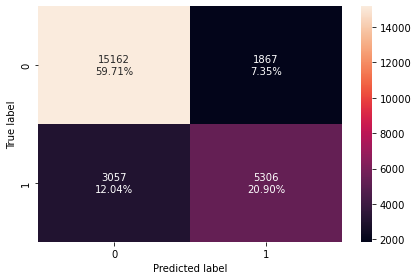

In [112]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, x_train3, y_train)

In [113]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg, x_train3, y_train)

print("Training performance threshold 0.5:")
log_reg_model_train_perf

Training performance threshold 0.5:


Accuracy    Recall  Precision        F1
0  0.806081  0.634461   0.739718  0.683059

**Test set performance**

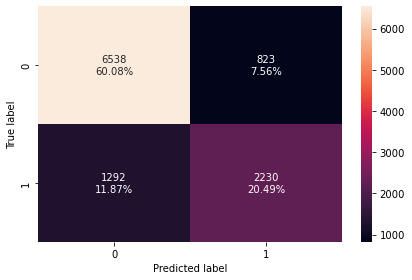

In [114]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, x_test3, y_test)

In [115]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg, x_test3, y_test)

print("Test performance threshold 0.5:")
log_reg_model_test_perf

Test performance threshold 0.5:


Accuracy    Recall  Precision        F1
0   0.80566  0.633163   0.730429  0.678327

#### Observations
- The f1 score between training and test (.683 vs .678) are very close indicating we are not over-fitting however there is room for improvement.

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

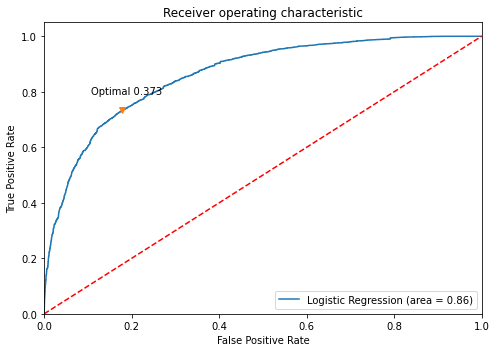

In [116]:
predictions = lg.predict(x_train3)
optimal_threshold_auc_roc = output_pretty_roc(y_train, predictions)

#### Observations
- The optimal auc_roc threshold is ,373

**Checking model performance on training set for threshold .373**

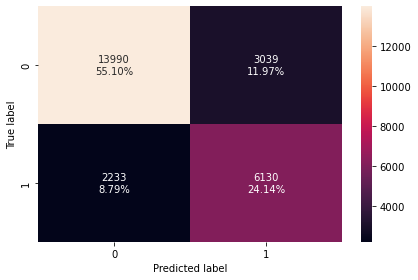

In [117]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, x_train3, y_train, \
                             threshold=optimal_threshold_auc_roc)

In [118]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, x_train3, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance threshold {:.4f}:".format(optimal_threshold_auc_roc))
log_reg_model_train_perf_threshold_auc_roc

Training performance threshold 0.3734:


Accuracy    Recall  Precision        F1
0  0.792376  0.732991   0.668557  0.699293

**Checking model performance on test set for threshold .373**

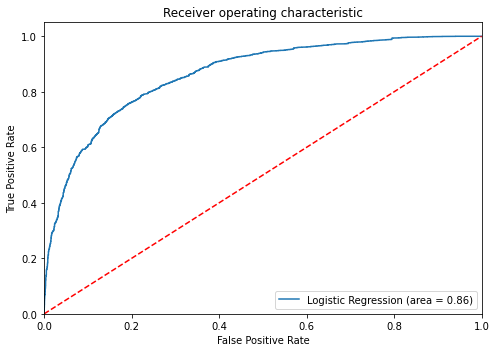

0.0

In [119]:
predictions = lg.predict(x_test3)
output_pretty_roc(y_test, predictions, True)

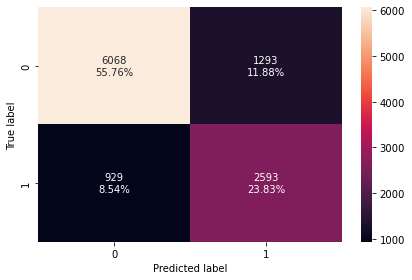

In [120]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, x_test3, y_test, threshold=optimal_threshold_auc_roc)

In [121]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, x_test3, y_test, threshold=optimal_threshold_auc_roc)
print("Test performance threshold {:.4f}:".format(optimal_threshold_auc_roc))
log_reg_model_test_perf_threshold_auc_roc

Test performance threshold 0.3734:


Accuracy    Recall  Precision        F1
0  0.795828  0.736229   0.667267  0.700054

#### Observations
- The f1 score improved with a .373 threshold between training and test (.699 vs .70) and are very close indicating 
we are not over-fitting and the model is generalizable.

### Precision-Recall Curve

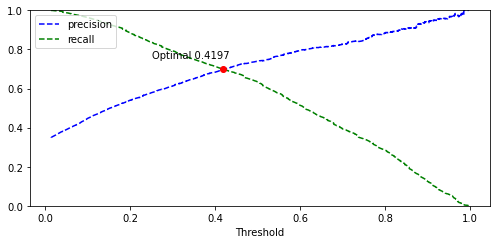

<Figure size 720x504 with 0 Axes>

In [122]:
optimal_threshold_curve = plot_prec_recall_vs_thresholds(lg, x_train3, y_train)

#### Observations
* From the precision-recall plot at the threshold of ~0.4197, we get balanced recall and precision.

**Checking model performance on training set for threshold .4197**

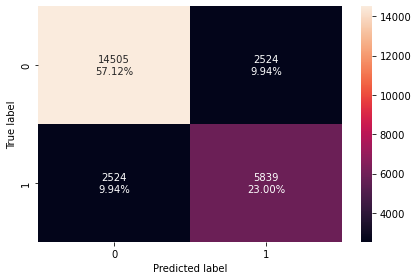

In [123]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, x_train3, y_train, threshold=optimal_threshold_curve)

In [124]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, x_train3, y_train, threshold=optimal_threshold_curve)
print("Training performance for threshold {:.4f}:".format(optimal_threshold_curve))
log_reg_model_train_perf_threshold_curve

Training performance for threshold 0.4197:


Accuracy    Recall  Precision        F1
0  0.801197  0.698194   0.698194  0.698194

**Checking model performance on test set for threshold .4197**

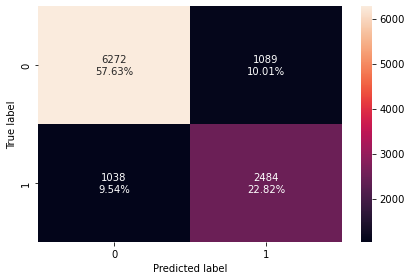

In [125]:
# creating confusion matrix
confusion_matrix_statsmodels(lg, x_test3, y_test, threshold=optimal_threshold_curve)

In [126]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, x_test3, y_test, threshold=optimal_threshold_curve)
print("Test performance threshold {:.4f}:".format(optimal_threshold_curve))
log_reg_model_test_perf_threshold_curve

Test performance threshold 0.4197:


Accuracy    Recall  Precision        F1
0  0.804558  0.705281   0.695214  0.700211

#### Observations
- The f1 score for the threshold of .4917 stayed about the same from the .373 threshold with training and test of .698 vs .70 which are very close indicating we are not over-fitting and the model is generalizable.

### Logit Model Performance Comparison

In [127]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-.4197 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.806081   
Recall                                        0.634461   
Precision                                     0.739718   
F1                                            0.683059   

           Logistic Regression-0.76 Threshold  \
Accuracy                             0.792376   
Recall                               0.732991   
Precision                            0.668557   
F1                                   0.699293   

           Logistic Regression-.4197 Threshold  
Accuracy                              0.801197  
Recall                                0.698194  
Precision                             0.698194  
F1                                    0.698194

In [128]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-.373 Threshold",
    "Logistic Regression-.4197 Threshold",
]

print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.805660   
Recall                                        0.633163   
Precision                                     0.730429   
F1                                            0.678327   

           Logistic Regression-.373 Threshold  \
Accuracy                             0.795828   
Recall                               0.736229   
Precision                            0.667267   
F1                                   0.700054   

           Logistic Regression-.4197 Threshold  
Accuracy                              0.804558  
Recall                                0.705281  
Precision                             0.695214  
F1                                    0.700211

## Final Model Summary

* Based on the f1 score value performance on test and training data the Logistic Regression-.4197 Threshold model is optimal.

* We have been able to build a predictive model that can be used by the hotel to predict booking cancellations with an f1_score of 0.70 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.


* Coefficients of lead_time, avg_price_per_room, no_of_week_nights, no_of_adults,no_of_weekend_nights, no_of_children, type_of_meal_plan_Meal Plan 2, no_of_previous_cancellations, type_of_meal_plan_NotSelected, arrival_year, market_segment_type_Corporate, market_segment_type_Online are all positive and increase the chances of a booking status cancellation.


* Coefficients of repeated_guest, required_car_parking_space, no_of_special_requests, room_type_reserved_Room_Type 7, room_type_reserved_Room_Type 6, room_type_reserved_Room_Type 5 room_type_reserved_Room_Type 2, room_type_reserved_Room_Type 4,arrival_month  are negative and an increase in these will lead to a decrease of the chances of a booking status cancellation.

## Building a Decision Tree model

In [129]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [130]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


#### Observations
- The dependent variable booking_status is imbalanced in both the training and test set with ~67% not canceling bookings and ~32% canceling bookings.

In [131]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

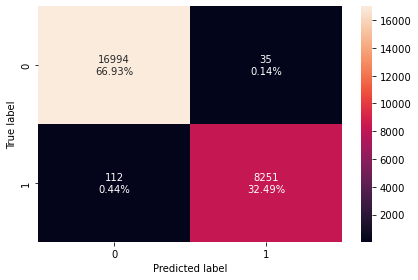

In [132]:
confusion_matrix_sklearn(tree_model, x_train, y_train)

In [133]:
decision_tree_perf_train = model_performance_classification_sklearn(
    tree_model, x_train, y_train)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

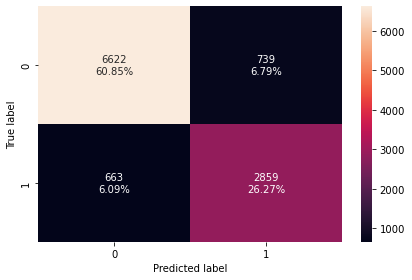

In [134]:
confusion_matrix_sklearn(tree_model, x_test, y_test)

In [135]:
decision_tree_perf_test = model_performance_classification_sklearn(
    tree_model, x_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision       F1
0  0.871175  0.811755   0.794608  0.80309

In [136]:
feature_names = list(x_train.columns)

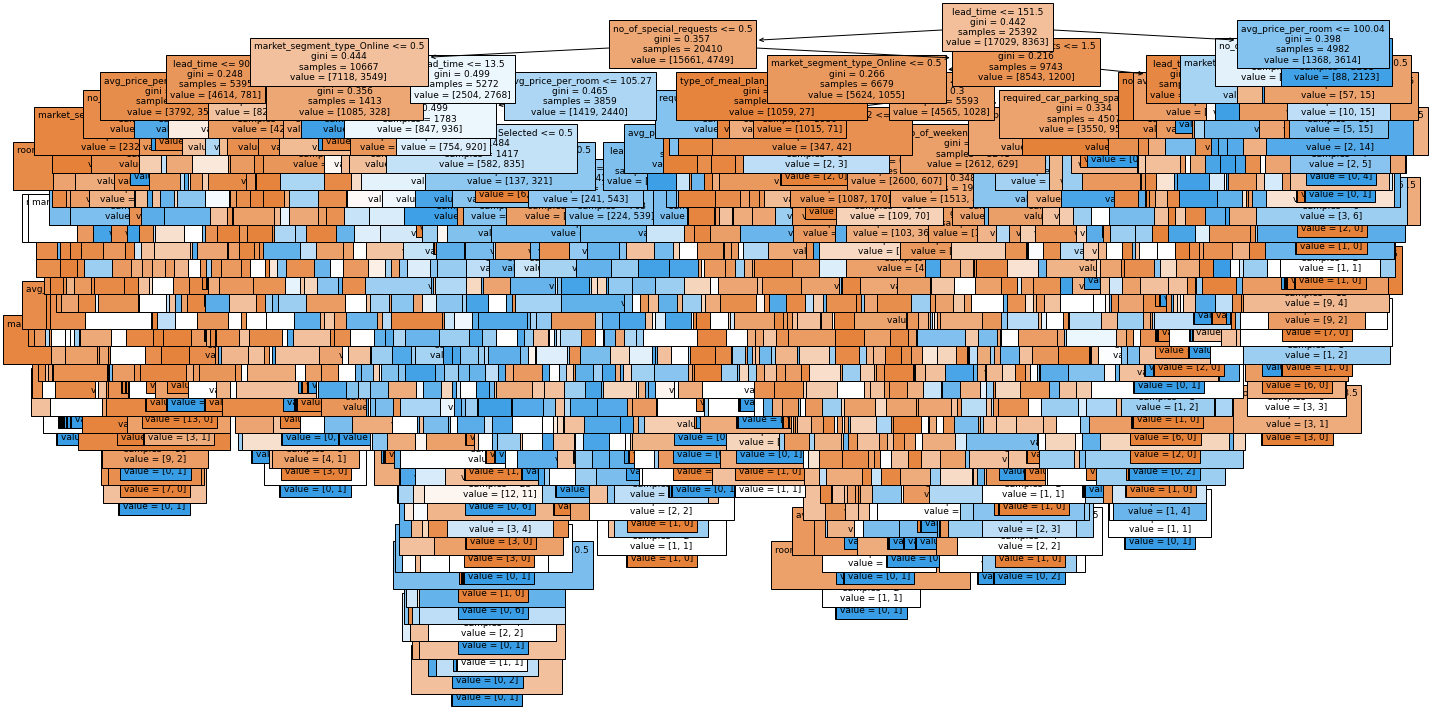

In [137]:
# Plot the decision tree
plot_tree(tree_model, feature_names)

In [138]:
# Text report showing the rules of a decision tree -
print(tree.export_text(tree_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type

#### Observations
- First few splits for the basic tree are:


    lead_time <= 151.50
        no_of_special_requests <= 0.50
            market_segment_type_Online <= 0.50
                lead_time <= 90.50
                    avg_price_per_room <= 201.50

- The tree is not very generalizable given the f1 score of .99 for training and .80 for test dataset.
- We need to prune to see if we can further optimize f1 and make the model more generalizable.

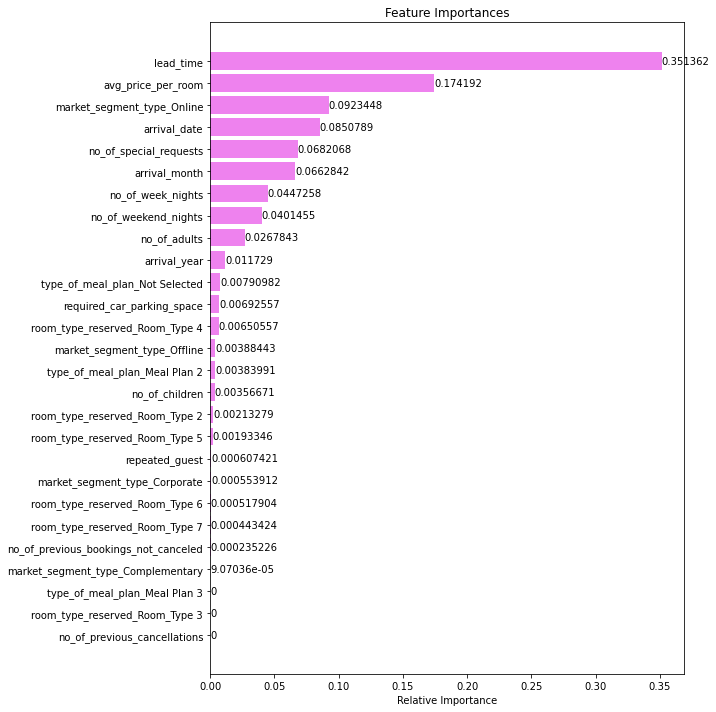

In [139]:
plot_feature_importance(tree_model, feature_names)

#### Observations
- lead_time, avg_price_per_room and market_segment_type_Online are the top three most important features for the base tree.

## Do we need to prune the tree?

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [140]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 12, 2),
    "max_leaf_nodes": [50, 60, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
    'min_impurity_decrease': [.0001, 0.01, 0.1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_leaf_nodes=250, min_impurity_decrease=0.0001,
                       min_samples_split=10, random_state=1)

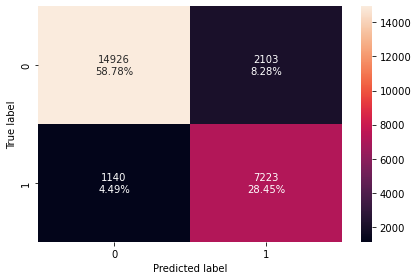

In [141]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [142]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train, y_train)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.872283  0.863685   0.774501  0.816666

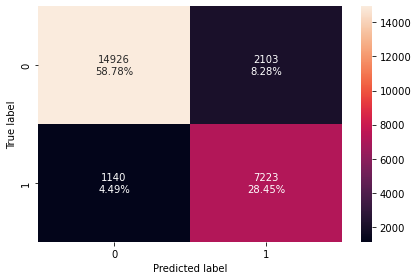

In [143]:
confusion_matrix_sklearn(estimator, x_train, y_train)

In [144]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.854084  0.840999   0.742356  0.788605

* The model is giving a generalized result now since the f1 scores on both the train .81 and test .78 data are close which shows that the model is able to generalize well on unseen data.

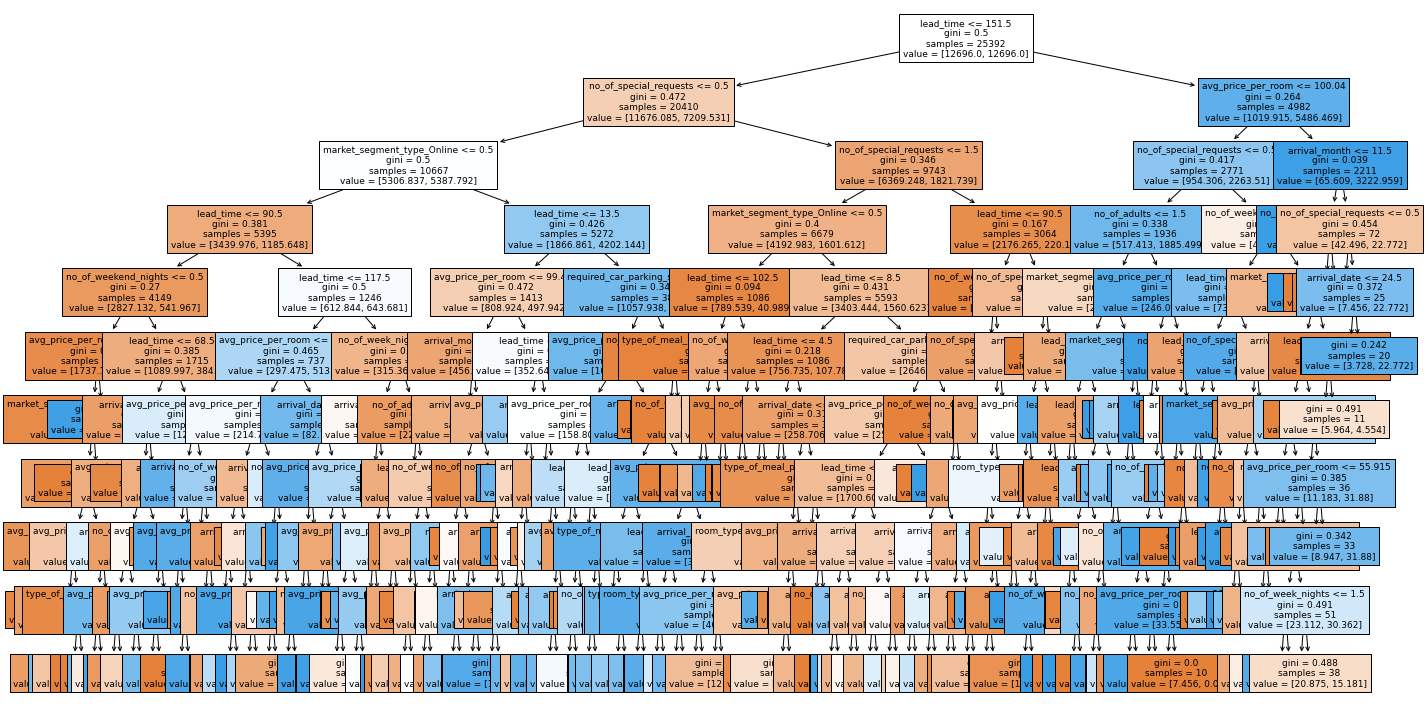

In [145]:
# Plot the decision tree
plot_tree(estimator, feature_names)

In [146]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [206.52, 47.06] class: 0
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.24, 7.59] class: 1
|   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   | 

#### Observations
- First few splits for the prepruned tree are:
    
    
    lead_time <= 151.50
        no_of_special_requests <= 0.50
            market_segment_type_Online <= 0.50
                lead_time <= 90.50
                    no_of_weekend_nights <= 0.50
                    
                    
- This are slightly different splits from the base tree.
- The test f1 score is up to .78 and the model is more generalizable.
- Lets try to postprune and postprune with preprune parms to see if we can improve the f1 score.

In [147]:
importances = estimator.feature_importances_
importances

array([0.02479338, 0.        , 0.02745074, 0.02395617, 0.01122204,
       0.40895828, 0.0201532 , 0.04947206, 0.02175116, 0.00090934,
       0.        , 0.        , 0.11107269, 0.13464003, 0.0007363 ,
       0.        , 0.00269798, 0.00074313, 0.        , 0.        ,
       0.00064286, 0.        , 0.        , 0.        , 0.        ,
       0.01211063, 0.14869001])

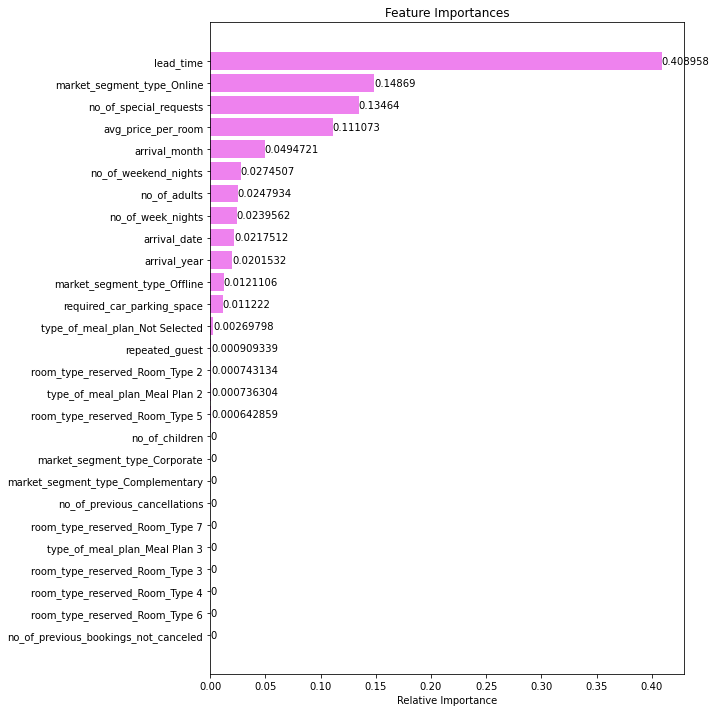

In [148]:
plot_feature_importance(estimator, feature_names)

#### Observations
- lead_time, market_segment_type_Online and no_special_requests are the top three most important features for the pre-pruned tree

**Cost Complexity Pruning using a balanced tree**

In [149]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [150]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1853  8.901596e-03    0.328058
1854  9.802243e-03    0.337860
1855  1.271875e-02    0.350579
1856  3.412090e-02    0.418821
1857  8.117914e-02    0.500000

[1858 rows x 2 columns]

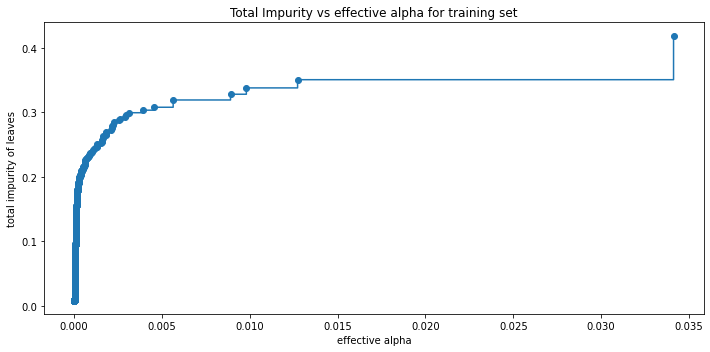

In [151]:
output_impurity_vs_alpha(ccp_alphas, impurities)

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node

In [152]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced")
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


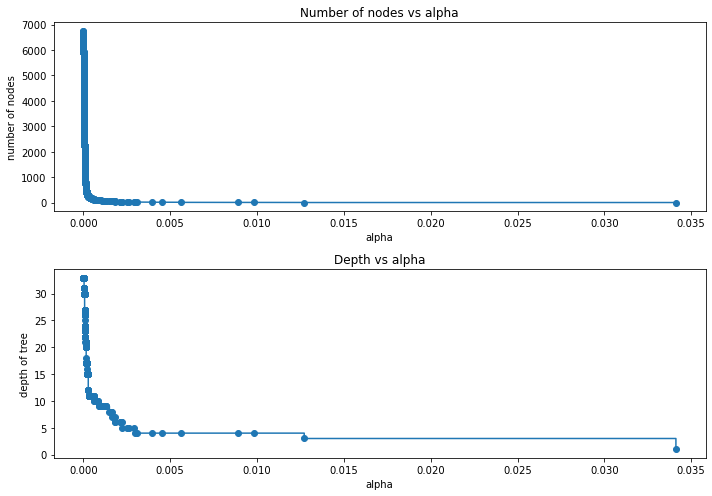

In [153]:
output_tree_info_vs_alpha(clfs, ccp_alphas)

#### F1 Score vs alpha for training and testing sets

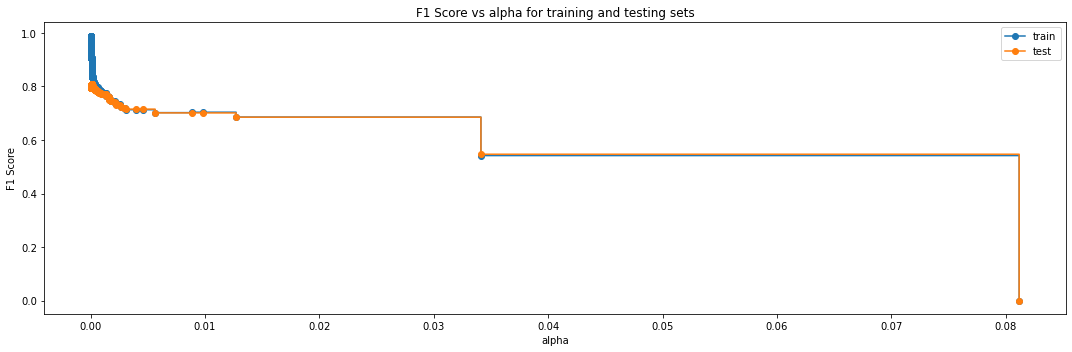

In [154]:
f1_test = output_f1_scores(x_train, x_test, y_train, y_test, clfs)

In [155]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167048,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

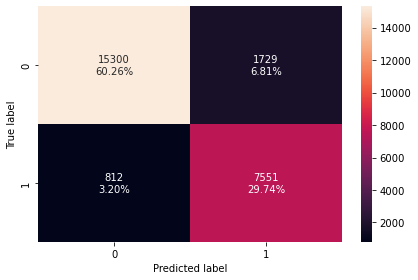

In [156]:
confusion_matrix_sklearn(best_model, x_train, y_train)

In [157]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.899929  0.902906   0.813685  0.855977

#### Checking performance on test set

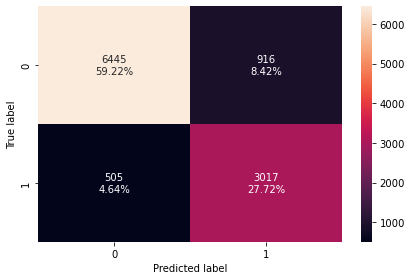

In [158]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [159]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, x_test, y_test)
decision_tree_post_perf_test

Accuracy    Recall  Precision       F1
0  0.869429  0.856616   0.767099  0.80939

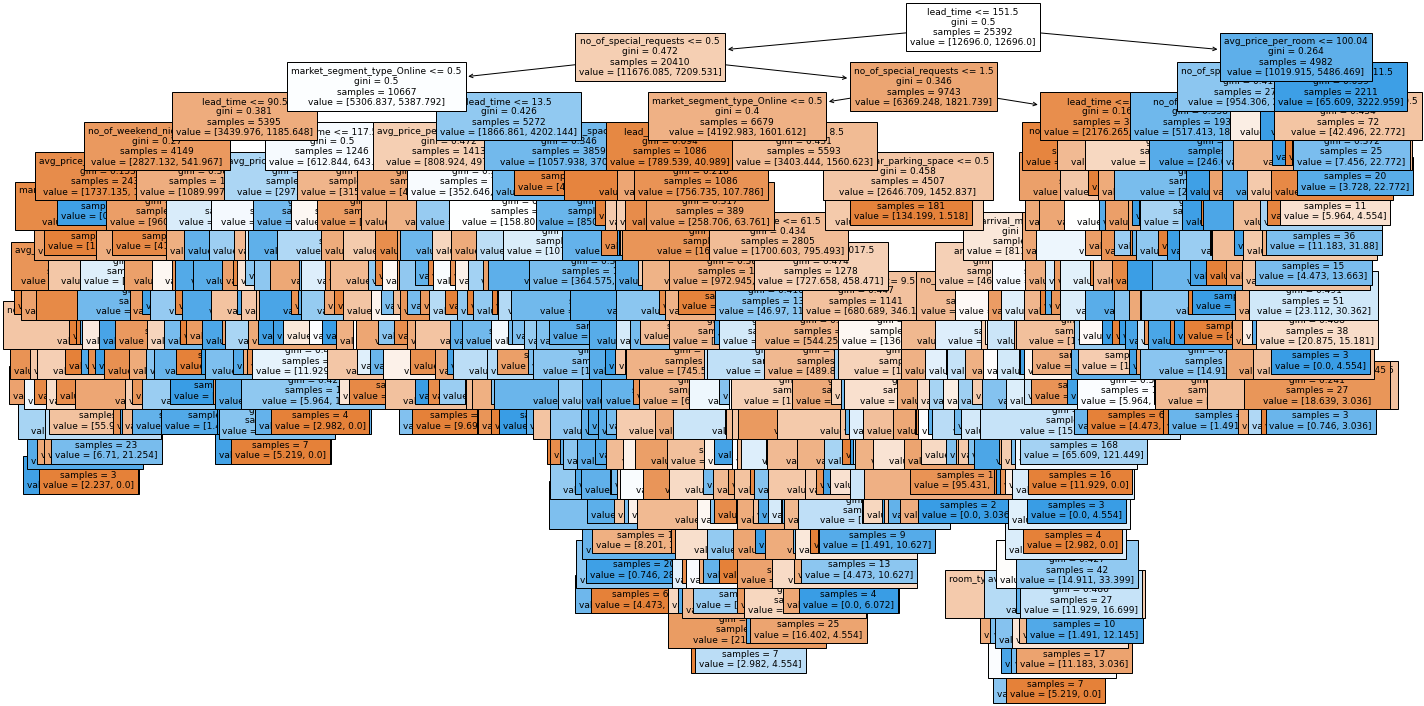

In [160]:
# Plot the decision tree
plot_tree(best_model, feature_names)

In [161]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

#### Observations
- The first few splits in the post-pruned tree are:

    
        lead_time <= 151.50
            no_of_special_requests <= 0.50
                market_segment_type_Online <= 0.50
                    lead_time <= 90.50
                        no_of_weekend_nights <= 0.50
                        
                       
- This matches the first few splits of the prepruned tree.
- The f1 score for test increased to .8 but the the difference between train and test f1 scores is a bit larger.

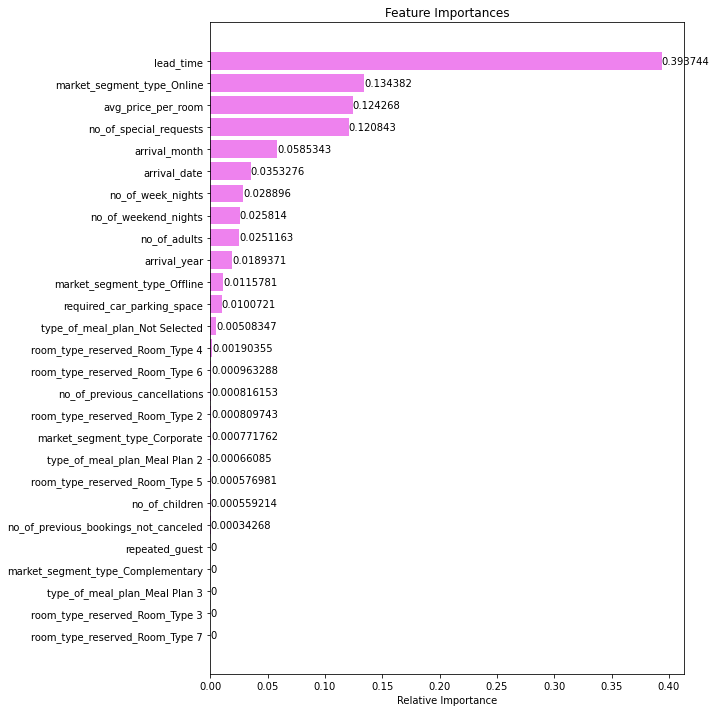

In [162]:
plot_feature_importance(best_model, feature_names)

#### Observations
- lead_time, market_segment_type_Online and avg_price_per_room are the top three most important features.

**Cost Complexity Pruning using a balanced tree and pre-pruning parms**

In [163]:
clf = DecisionTreeClassifier(random_state=1, class_weight='balanced', \
                       max_leaf_nodes=250, min_impurity_decrease=0.0001,
                       min_samples_split=10)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node

In [164]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced",\
								max_leaf_nodes=250, min_impurity_decrease=0.0001,
								min_samples_split=10)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136893


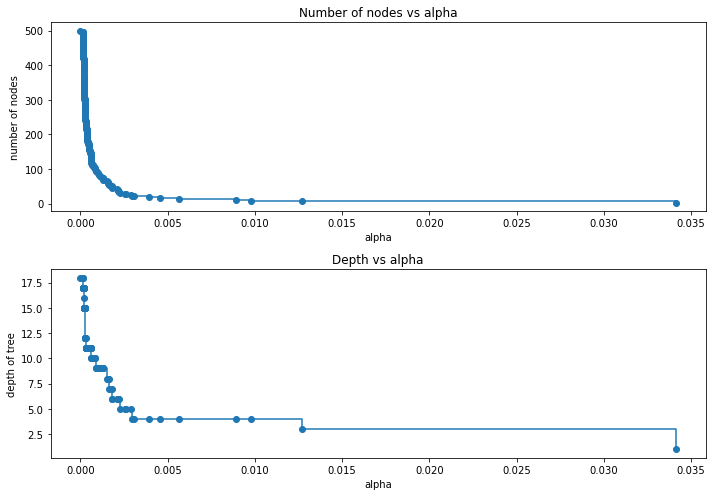

In [165]:
output_tree_info_vs_alpha(clfs, ccp_alphas)

#### F1 Score vs alpha for training and testing sets

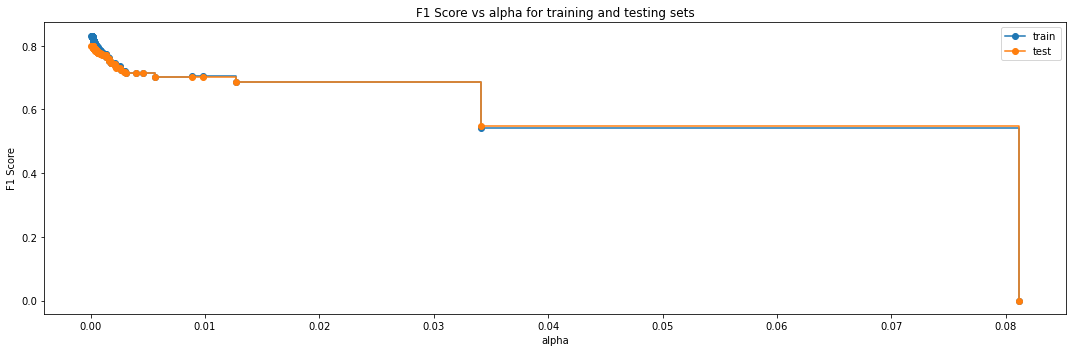

In [166]:
f1_test = output_f1_scores(x_train, x_test, y_train, y_test, clfs)

In [167]:
index_superb_model = np.argmax(f1_test)
superb_model = clfs[index_superb_model]
print(superb_model)

DecisionTreeClassifier(ccp_alpha=0.00014590417912511131,
                       class_weight='balanced', max_leaf_nodes=250,
                       min_impurity_decrease=0.0001, min_samples_split=10,
                       random_state=1)


#### Checking performance on training set

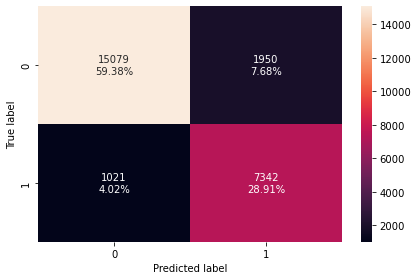

In [168]:
confusion_matrix_sklearn(superb_model, x_train, y_train)

In [169]:
decision_tree_post_perf_with_parms_train = model_performance_classification_sklearn(
    superb_model, x_train, y_train)
decision_tree_post_perf_with_parms_train

Accuracy    Recall  Precision        F1
0  0.882995  0.877915   0.790142  0.831719

#### Checking performance on test set

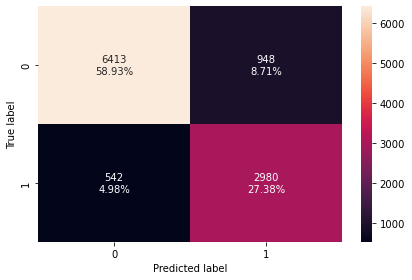

In [170]:
confusion_matrix_sklearn(superb_model, x_test, y_test)

In [171]:
decision_tree_post_perf_with_parms_test = model_performance_classification_sklearn(
    superb_model, x_test, y_test)
decision_tree_post_perf_with_parms_test

Accuracy   Recall  Precision   F1
0  0.863089  0.84611   0.758656  0.8

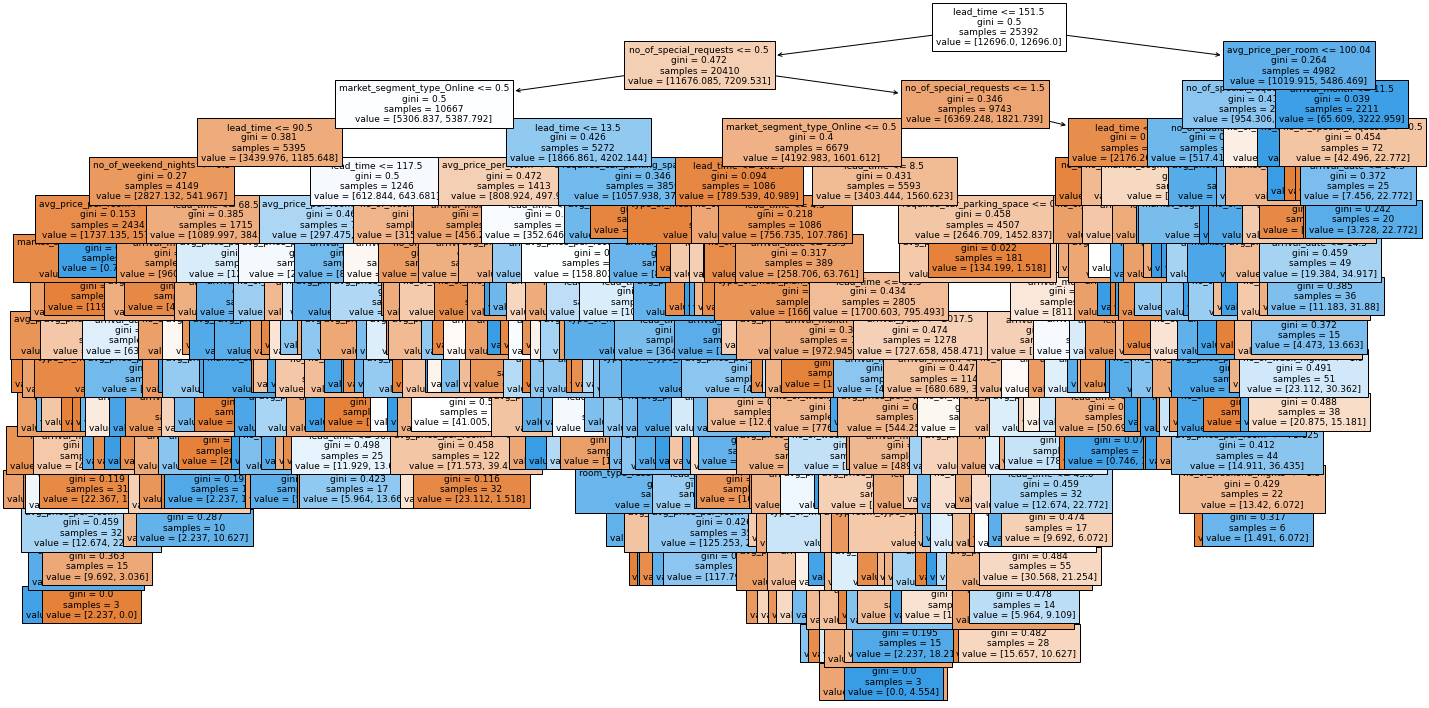

In [172]:
# Plot the decision tree
plot_tree(superb_model, feature_names)

In [173]:
# Text report showing the rules of a decision tree -
print(tree.export_text(superb_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

#### Observations
- The first few splits in the post-pruned tree are:

    
        lead_time <= 151.50
            no_of_special_requests <= 0.50
                market_segment_type_Online <= 0.50
                    lead_time <= 90.50
                        no_of_weekend_nights <= 0.50
                        
                       
- This matches the first few splits of the prepruned tree.
- The f1 score for test is roughly the same as the post prune model but the difference between train and test f1 scores is smaller than it was for the post-prune model.

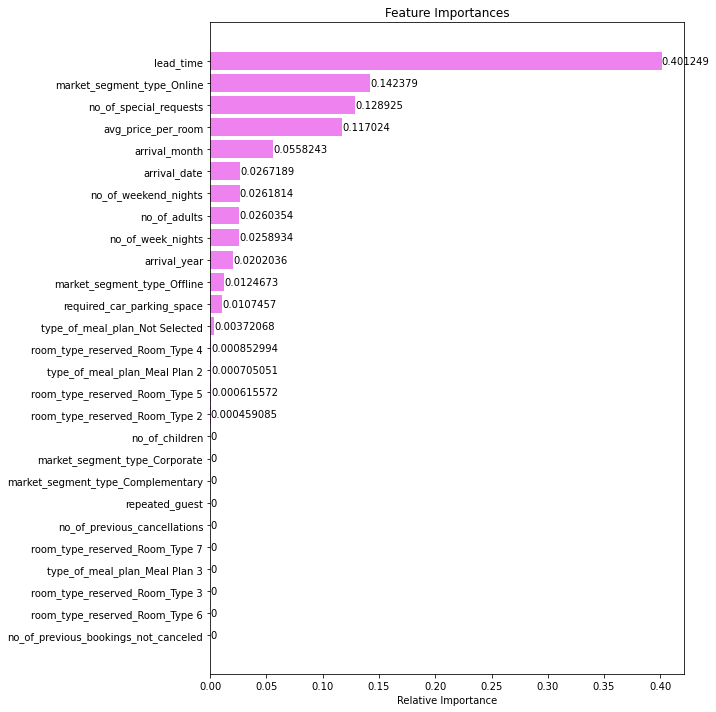

In [174]:
plot_feature_importance(superb_model, feature_names)

#### Observations
- The top three most important features are lead_time, makret_segment_type_Online and no_of_special_requests.


In [175]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
        decision_tree_post_perf_with_parms_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post-Pruning with parms)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.994211                     0.872283   
Recall                  0.986608                     0.863685   
Precision               0.995776                     0.774501   
F1                      0.991171                     0.816666   

           Decision Tree (Post-Pruning)  \
Accuracy                       0.899929   
Recall                         0.902906   
Precision                      0.813685   
F1                             0.855977   

           Decision Tree (Post-Pruning with parms)  
Accuracy                                  0.882995  
Recall                                    0.877915  
Precision                                 0.790142  
F1                                        0.831719

In [176]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
        decision_tree_post_perf_with_parms_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post-Pruning with parms)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.871175                     0.854084   
Recall                  0.811755                     0.840999   
Precision               0.794608                     0.742356   
F1                      0.803090                     0.788605   

           Decision Tree (Post-Pruning)  \
Accuracy                       0.869429   
Recall                         0.856616   
Precision                      0.767099   
F1                             0.809390   

           Decision Tree (Post-Pruning with parms)  
Accuracy                                  0.863089  
Recall                                    0.846110  
Precision                                 0.758656  
F1                                        0.800000

## Model Performance Comparison and Conclusions

- Decision tree models beat the best Logistic Regression-.4197 Threshold model that had an f1 score of .70 for test data.
- Decision Tree Post-Pruning with parms was the best decision tree model with a testing f1 score of .80 and a smaller difference between train and test f1 scores than the post-prune model.

## Actionable Insights and Recommendations
* The Decision Tree Post-Pruning was chosen based on the .80 test f1 score and consistent f1 scores  between the test and training datasets indicating the model is generalizable.
* The top three most important features are lead_time, market_segment_type_Online and no_of_special_requests.


* Using our predictive model you can introduce Non-refundable rooms and cancellation fees for prospective guests that have a higher likelihood of canceling their booking. This will directly address the 149.65% increase in cancellations by dissuading the cancellation and remunerating the hotel for costs.

* In order to encourage more repeat guests a frequent reward system should be put in place (since they have a positive effect on cancellation rate) to reward them for nights stayed in the form of upgrades and reduced room rates. 

* There was a 356.87% YOY growth from 2017 to 2018 with bookings. For guests that cancel bookings the lead_time is 67.9% higher than for those who do not cancel. It is likely room availability was at a premium and the hotel could not meet all the booking and special requests growth which led to longer and longer lead times increasing the possibility of cancellations. A mutual relationship should be created with nearby hotels to send over-bookings.


* The Online market segment is the top segment for booking with 63.99% of the bookings however they also saw a 16.73% increase in avg_price_per_room and YOY cancellation rate increase of 131.17%. Since the price of a room is not inelastic room rate increases should be managed carefully in order to not dissuade prospective guests from booking or encouraging guests to book and then cancel after finding a cheaper price elsewhere.

* Family bookings grew 97.43% YOY from 2017 to 2018. Marketing campaigns should be put in place to target this new segment.
* Aviation was a brand new segment in 2018.

* The least popular room_type_reserved is Room_Type_3 which was selected .01% of the time. You may want to upgrade to type to Room_Type 1 or 4 which make up for 93% of the bookings.

* The least popular is Meal Plan 3 which was selected .01% of the time and in order to save cost you may want to stop offering it as an option.

### Data Insights
* Overall 32.7% of the bookings were canceled. In 2017 alone cancellations were 14.7% but ballooned to 36.7% in 2018 which is an increase of 149.65% YOY.
* The Offline market segment had that largest YOY cancellation rate of 153.39% from 2017 to 2018 followed by Online with 131.17%.


* From 2017 to 2018 cancellations grew by 129.16% for guests with at least one special request which could indicate the hotel is not following up with the guests to ensure the special requests where taken care of prior to their stay or could not accommodate their special requests.

* The number of bookings increased 356.87% YOY from 2017 to 2018. Granted 2017 is is only represents six months so even if we double the 2017 bookings we still see YOY growth of 128.43%.
* Given the huge growth in bookings YOY along with cancellations it is possible the hotel does not have the availability of rooms to support the booking requests with special requests which could also elongate the lead_time of bookings in order to get one that meets the special_requests. 


* Overall 1.7% of the guests who were repeat guests canceled their bookings.
* From 2017 to 2018 repeated_guests declined 22.5%

#### Further analysis that can be done:
* Acquire data on why rooms were canceled with a discrete list of reasons to add further insights to this analysis.
* Gather data on room availability to indicate a measure of when guests were turned away due to the hotel having no vacancy or when a target date was not available.
* Break out Online and Offline market_segment_types because they hide the market segment. In other words Aviation guests could book Online or Offline and not show up as Aviation. Online/Offline should be moved to a feature named reservation mathod in order to reveal additional insights in the data once another analysis is run.
* The data is biased towards 2018 with only six months coming from 2017. Acquire more data if possible from 2017 and prior years and rerun the analysis.
* Capture and track the cost of cancellation and factor that into the analysis in order to further refine to analysis to more stringently meet your business needs.